In [17]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from xgboost import XGBRegressor
from DamageRepair.inference_full import analyze_car
from RepairCost.repair_cost_model_to_import import run_cost_prediction

In [18]:
# csv 로드
df = pd.read_csv("labels_repair_cost_full_test.csv")
df1 = pd.read_csv("labels_repair_cost_full_test_first_only.csv")

In [19]:
# 이미지 기반 repair 추출
def extract_repair_from_images(image_list):
    merged = {}   # {part: set([work, work])}

    for img_path in image_list:
        img_path = "test_images/" + img_path
        if not os.path.exists(img_path):
            print(f"[WARN] 이미지 파일 없음: {img_path}")
            continue

        try:
            result = analyze_car(img_path)
        except Exception as e:
            print(f"[ERROR] analyze_car 실패: {img_path}, 이유: {e}")
            continue

        # result["repair_items"] 파싱
        for item in result.get("repair_items", []):
            part = item.get("part")
            works = item.get("repair_methods", [])

            if part not in merged:
                merged[part] = set()

            merged[part].update(works)

    # part:work,work|part:work 형식으로 변환
    merged_str = "|".join(
        f"{p}:{','.join(sorted(w))}" for p, w in merged.items()
    )

    return merged_str

In [20]:
def predict_cost(df):

    rows = []

    for idx, row in tqdm(df.iterrows(), total=len(df)):

        file_names = row["file_name"].split("|")
        image_paths = [fn.strip() for fn in file_names]

        acc_id = row["accident_id"]
        car_type = row["car_type"]
        total_cost = row["total_cost"]

        repair_pred = extract_repair_from_images(image_paths)

        rows.append({
            "accident_id": acc_id,
            "car_type": car_type,
            "repair_true": row["repair"],
            "repair_pred": repair_pred,
            "total_cost": total_cost
        })


    df_pred = pd.DataFrame(rows)

    return run_cost_prediction(df_pred)

In [21]:
result = predict_cost(df)
# result = predict_cost(df1)

  0%|          | 0/500 [00:00<?, ?it/s]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0203555_as-0098725.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 762.0ms
Speed: 41.5ms preprocess, 762.0ms inference, 26.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0203556_as-0098725.jpg: 640x480 1 Side mirror(L), 316.7ms
Speed: 2.5ms preprocess, 316.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


  0%|          | 1/500 [00:03<25:45,  3.10s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250112_as-0098728.jpg: 640x480 1 Rear lamp(L), 1 Front fender(R), 338.0ms
Speed: 2.8ms preprocess, 338.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


  0%|          | 2/500 [00:04<16:06,  1.94s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0306841_as-0098733.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 336.3ms
Speed: 2.4ms preprocess, 336.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0306842_as-0098733.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 368.4ms
Speed: 3.2ms preprocess, 368.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


  1%|          | 3/500 [00:06<18:27,  2.23s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0125769_as-0098734.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 266.6ms
Speed: 2.2ms preprocess, 266.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0125770_as-0098734.jpg: 640x480 1 Front bumper, 265.7ms
Speed: 2.1ms preprocess, 265.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  1%|          | 4/500 [00:08<16:19,  1.98s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0468337_as-0098735.jpg: 640x480 1 Front bumper, 288.0ms
Speed: 2.5ms preprocess, 288.0ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0468338_as-0098735.jpg: 640x480 1 Front bumper, 297.7ms
Speed: 2.7ms preprocess, 297.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0468339_as-0098735.jpg: 640x480 1 Front bumper, 346.5ms
Speed: 3.5ms preprocess, 346.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0468340_as-0098735.jpg: 640x480 1 Head lights(L), 260.1ms
Speed: 2.4ms preprocess, 260.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1

  1%|          | 5/500 [00:11<20:11,  2.45s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141491_as-0098736.jpg: 640x480 1 Front bumper, 265.3ms
Speed: 2.1ms preprocess, 265.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141492_as-0098736.jpg: 640x480 1 Front bumper, 1 Head lights(L), 259.9ms
Speed: 1.6ms preprocess, 259.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141493_as-0098736.jpg: 640x480 1 Front bumper, 283.3ms
Speed: 2.4ms preprocess, 283.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141494_as-0098736.jpg: 640x480 1 Rear door(R), 269.7ms
Speed: 2.3ms preprocess, 269.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640,

  1%|          | 6/500 [00:15<23:00,  2.80s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0375458_as-0098738.jpg: 640x480 1 Rear lamp(R), 272.7ms
Speed: 2.5ms preprocess, 272.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0375459_as-0098738.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 268.1ms
Speed: 2.2ms preprocess, 268.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0375460_as-0098738.jpg: 640x480 1 Rear bumper, 259.3ms
Speed: 2.0ms preprocess, 259.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0375461_as-0098738.jpg: 640x480 1 Rear bumper, 257.6ms
Speed: 2.1ms preprocess, 257.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

  1%|▏         | 7/500 [00:17<22:50,  2.78s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123278_as-0098739.jpg: 640x480 1 Front bumper, 1 Head lights(L), 262.2ms
Speed: 2.1ms preprocess, 262.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123279_as-0098739.jpg: 640x480 1 Front bumper, 1 Rear lamp(L), 264.6ms
Speed: 3.3ms preprocess, 264.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123280_as-0098739.jpg: 640x480 (no detections), 283.8ms
Speed: 2.3ms preprocess, 283.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123281_as-0098739.jpg: 640x480 1 Head lights(L), 272.1ms
Speed: 1.5ms preprocess, 272.1ms inference, 1.4ms postprocess per image a

  2%|▏         | 8/500 [00:22<27:51,  3.40s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0069744_as-0098743.jpg: 640x480 1 Side mirror(L), 283.9ms
Speed: 2.2ms preprocess, 283.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0069745_as-0098743.jpg: 640x480 1 Side mirror(L), 303.1ms
Speed: 2.1ms preprocess, 303.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0069746_as-0098743.jpg: 640x480 1 Rocker panel(L), 300.0ms
Speed: 2.6ms preprocess, 300.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0069747_as-0098743.jpg: 640x480 1 Side mirror(L), 264.4ms
Speed: 2.2ms preprocess, 264.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

im

  2%|▏         | 9/500 [00:25<26:51,  3.28s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0190654_as-0098747.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 261.4ms
Speed: 2.4ms preprocess, 261.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0190655_as-0098747.jpg: 640x480 1 Rocker panel(L), 259.3ms
Speed: 2.1ms preprocess, 259.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0190656_as-0098747.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 269.3ms
Speed: 1.6ms preprocess, 269.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  2%|▏         | 10/500 [00:28<24:46,  3.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0233464_as-0098751.jpg: 640x480 1 Front bumper, 1 Head lights(R), 280.9ms
Speed: 2.6ms preprocess, 280.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0233465_as-0098751.jpg: 640x480 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 281.9ms
Speed: 2.3ms preprocess, 281.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0233466_as-0098751.jpg: 640x480 1 Rear bumper, 257.3ms
Speed: 2.3ms preprocess, 257.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0233467_as-0098751.jpg: 640x480 1 Rear bumper, 261.1ms
Speed: 2.1ms preprocess, 261.1ms inference, 1.4ms postproc

  2%|▏         | 11/500 [00:32<28:44,  3.53s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0211491_as-0098753.jpg: 640x480 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 264.9ms
Speed: 2.5ms preprocess, 264.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0211492_as-0098753.jpg: 640x480 1 Rocker panel(L), 271.5ms
Speed: 2.2ms preprocess, 271.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0211493_as-0098753.jpg: 640x480 1 Rear lamp(L), 274.6ms
Speed: 2.2ms preprocess, 274.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0211495_as-0098753.jpg: 640x480 1 Side mirror(L), 1 Rocker panel(L), 270.5ms
Speed: 2.1ms preprocess, 270.5ms inference, 1.7ms p

  2%|▏         | 12/500 [00:42<44:03,  5.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0395846_as-0098755.jpg: 640x480 1 Roof, 1 Rear lamp(L), 391.6ms
Speed: 2.6ms preprocess, 391.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0395847_as-0098755.jpg: 640x480 1 Rear lamp(L), 279.3ms
Speed: 2.4ms preprocess, 279.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  3%|▎         | 13/500 [00:44<34:53,  4.30s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0310907_as-0098758.jpg: 640x480 1 Roof, 1 Rear lamp(L), 271.2ms
Speed: 1.9ms preprocess, 271.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0310908_as-0098758.jpg: 640x480 1 Head lights(L), 263.6ms
Speed: 1.9ms preprocess, 263.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0310909_as-0098758.jpg: 640x480 (no detections), 269.1ms
Speed: 1.7ms preprocess, 269.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0310910_as-0098758.jpg: 640x480 1 Side mirror(L), 265.7ms
Speed: 2.2ms preprocess, 265.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

  3%|▎         | 14/500 [00:48<34:42,  4.29s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487553_as-0098764.jpg: 640x480 1 Front bumper, 1 Bonnet, 252.9ms
Speed: 1.4ms preprocess, 252.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487554_as-0098764.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 306.2ms
Speed: 2.8ms preprocess, 306.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487555_as-0098764.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 275.1ms
Speed: 1.5ms preprocess, 275.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


  3%|▎         | 15/500 [00:51<31:10,  3.86s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0196166_as-0098767.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 259.9ms
Speed: 2.2ms preprocess, 259.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0196167_as-0098767.jpg: 640x480 1 Rear lamp(L), 257.8ms
Speed: 2.3ms preprocess, 257.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0196168_as-0098767.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 261.0ms
Speed: 2.3ms preprocess, 261.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0196169_as-0098767.jpg: 640x480 (no detections), 276.3ms
Speed: 2.0ms preprocess, 276.3ms inference, 0.9ms postprocess per image at shape

  3%|▎         | 16/500 [00:54<30:04,  3.73s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254763_as-0098768.jpg: 640x480 1 Rear lamp(R), 2 Rear bumpers, 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 266.4ms
Speed: 2.4ms preprocess, 266.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254764_as-0098768.jpg: 640x480 1 Rear bumper, 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 256.1ms
Speed: 2.1ms preprocess, 256.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254765_as-0098768.jpg: 640x480 1 Head lights(L), 253.8ms
Speed: 1.5ms preprocess, 253.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254766_as-0098768.jpg: 640x480 1 Rea

  3%|▎         | 17/500 [01:05<47:52,  5.95s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469669_as-0098772.jpg: 640x480 1 Front bumper, 1 Rear door(R), 293.4ms
Speed: 2.2ms preprocess, 293.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469670_as-0098772.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 276.2ms
Speed: 1.5ms preprocess, 276.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469671_as-0098772.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 266.8ms
Speed: 1.7ms preprocess, 266.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469672_as-0098772.jpg: 640x480 1 Rocker panel(L), 260.4ms
Speed: 1.5ms preprocess, 260.4ms inference, 1.2ms postpr

  4%|▎         | 18/500 [01:09<41:46,  5.20s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348890_as-0098782.jpg: 640x480 1 Front bumper, 1 Head lights(R), 263.0ms
Speed: 1.8ms preprocess, 263.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348891_as-0098782.jpg: 640x480 1 Front bumper, 1 Head lights(R), 261.3ms
Speed: 2.1ms preprocess, 261.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348892_as-0098782.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 270.3ms
Speed: 2.2ms preprocess, 270.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348893_as-0098782.jpg: 640x480 2 Head lights(L)s, 277.2ms
Speed: 1.7ms preprocess, 277.2ms in

  4%|▍         | 19/500 [01:14<41:08,  5.13s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0410551_as-0098787.jpg: 640x480 1 Rear door(R), 254.6ms
Speed: 2.2ms preprocess, 254.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0410552_as-0098787.jpg: 640x480 1 Rocker panel(L), 268.8ms
Speed: 2.1ms preprocess, 268.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0410553_as-0098787.jpg: 640x480 (no detections), 268.7ms
Speed: 2.0ms preprocess, 268.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0410554_as-0098787.jpg: 640x480 2 Rear lamp(L)s, 1 Rear door(R), 1 Rocker panel(L), 275.5ms
Speed: 2.3ms preprocess, 275.5ms inference, 1.7ms postprocess per imag

  4%|▍         | 20/500 [01:18<37:45,  4.72s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0371973_as-0098788.jpg: 640x480 1 Front bumper, 272.0ms
Speed: 2.1ms preprocess, 272.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  4%|▍         | 21/500 [01:18<27:53,  3.49s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0025829_as-0098791.jpg: 640x480 1 Rear lamp(L), 273.4ms
Speed: 2.3ms preprocess, 273.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0025830_as-0098791.jpg: 640x480 1 Roof, 1 Rear lamp(L), 268.6ms
Speed: 2.1ms preprocess, 268.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0025831_as-0098791.jpg: 640x480 (no detections), 271.1ms
Speed: 1.6ms preprocess, 271.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0025832_as-0098791.jpg: 640x480 1 Rear lamp(L), 282.5ms
Speed: 3.7ms preprocess, 282.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


  4%|▍         | 22/500 [01:21<25:35,  3.21s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0207232_as-0098792.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 267.5ms
Speed: 2.6ms preprocess, 267.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  5%|▍         | 23/500 [01:22<20:51,  2.62s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0420344_as-0098793.jpg: 640x480 (no detections), 265.4ms
Speed: 2.2ms preprocess, 265.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0420345_as-0098793.jpg: 640x480 1 Rear lamp(L), 261.9ms
Speed: 2.1ms preprocess, 261.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


  5%|▍         | 24/500 [01:23<16:47,  2.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0354012_as-0098795.jpg: 640x480 1 Front bumper, 281.3ms
Speed: 2.7ms preprocess, 281.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0354013_as-0098795.jpg: 640x480 1 Rocker panel(L), 270.0ms
Speed: 1.7ms preprocess, 270.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0354014_as-0098795.jpg: 640x480 1 Rocker panel(L), 322.4ms
Speed: 4.3ms preprocess, 322.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


  5%|▌         | 25/500 [01:25<16:23,  2.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149771_as-0098798.jpg: 640x480 (no detections), 279.0ms
Speed: 2.2ms preprocess, 279.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149772_as-0098798.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 268.0ms
Speed: 3.2ms preprocess, 268.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149773_as-0098798.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 272.6ms
Speed: 2.1ms preprocess, 272.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  5%|▌         | 26/500 [01:27<16:45,  2.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0306901_as-0098799.jpg: 640x480 1 Front bumper, 1 Head lights(L), 263.4ms
Speed: 2.1ms preprocess, 263.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0306902_as-0098799.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 269.5ms
Speed: 1.5ms preprocess, 269.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0306903_as-0098799.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 288.9ms
Speed: 2.3ms preprocess, 288.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0306904_as-0098799.jpg: 640x480 (no detections), 260.7ms
Speed: 2.1ms preprocess, 260.7ms inferenc

  5%|▌         | 27/500 [01:33<26:25,  3.35s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0050388_as-0098801.jpg: 640x480 (no detections), 274.7ms
Speed: 1.8ms preprocess, 274.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0050389_as-0098801.jpg: 640x480 (no detections), 287.9ms
Speed: 2.5ms preprocess, 287.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0050390_as-0098801.jpg: 640x480 1 Side mirror(L), 283.8ms
Speed: 2.4ms preprocess, 283.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


  6%|▌         | 28/500 [01:35<21:30,  2.74s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0472899_as-0098802.jpg: 640x480 1 Front bumper, 267.7ms
Speed: 2.5ms preprocess, 267.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0472900_as-0098802.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 265.0ms
Speed: 1.6ms preprocess, 265.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0472901_as-0098802.jpg: 640x480 1 Front bumper, 253.2ms
Speed: 1.5ms preprocess, 253.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


  6%|▌         | 29/500 [01:37<20:49,  2.65s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0160490_as-0098806.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 249.2ms
Speed: 2.2ms preprocess, 249.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0160491_as-0098806.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 254.0ms
Speed: 2.2ms preprocess, 254.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


  6%|▌         | 30/500 [01:39<18:47,  2.40s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046760_as-0098808.jpg: 480x640 1 Rear lamp(L), 282.6ms
Speed: 2.2ms preprocess, 282.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046761_as-0098808.jpg: 640x480 1 Rear lamp(L), 279.7ms
Speed: 2.4ms preprocess, 279.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046762_as-0098808.jpg: 640x480 2 Trunk lids, 1 Front fender(L), 1 Front fender(R), 1 Rear door(L), 271.8ms
Speed: 3.0ms preprocess, 271.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046763_as-0098808.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Front fender(R), 273.0ms
Speed: 2.1ms preprocess, 2

  6%|▌         | 31/500 [01:45<27:19,  3.50s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487292_as-0098809.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 270.3ms
Speed: 3.4ms preprocess, 270.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487293_as-0098809.jpg: 640x480 2 Rear lamp(R)s, 274.2ms
Speed: 2.4ms preprocess, 274.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487294_as-0098809.jpg: 640x480 1 Rocker panel(L), 253.9ms
Speed: 1.5ms preprocess, 253.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487295_as-0098809.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 1 Rocker panel(L), 254.8ms
Speed: 2.2ms preprocess, 254.8ms inference, 1.3ms po

  6%|▋         | 32/500 [01:52<34:48,  4.46s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0216535_as-0098810.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 282.1ms
Speed: 2.2ms preprocess, 282.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0216537_as-0098810.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 259.2ms
Speed: 2.6ms preprocess, 259.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0216538_as-0098810.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 257.9ms
Speed: 2.3ms preprocess, 257.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0216539_as-0098810.jpg: 640x480 1 Rear door(R), 2 Rocker panel(L)s, 252.4ms
Speed: 2.1ms preprocess, 252.4ms 

  7%|▋         | 33/500 [01:57<36:44,  4.72s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0276573_as-0098817.jpg: 640x480 2 Side mirror(L)s, 272.7ms
Speed: 3.0ms preprocess, 272.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0276574_as-0098817.jpg: 640x480 1 Side mirror(L), 260.1ms
Speed: 2.2ms preprocess, 260.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


  7%|▋         | 34/500 [01:59<29:17,  3.77s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320514_as-0098821.jpg: 640x480 1 Rear lamp(L), 258.9ms
Speed: 2.2ms preprocess, 258.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320515_as-0098821.jpg: 640x480 1 Rear lamp(L), 257.1ms
Speed: 2.0ms preprocess, 257.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320516_as-0098821.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 249.3ms
Speed: 2.1ms preprocess, 249.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


  7%|▋         | 35/500 [02:01<25:21,  3.27s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0080813_as-0098829.jpg: 640x480 1 Rear lamp(R), 1 Side mirror(L), 252.0ms
Speed: 2.3ms preprocess, 252.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0080814_as-0098829.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 1 Rocker panel(L), 259.4ms
Speed: 2.0ms preprocess, 259.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0080815_as-0098829.jpg: 640x480 (no detections), 279.0ms
Speed: 2.4ms preprocess, 279.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


  7%|▋         | 36/500 [02:03<23:29,  3.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0219167_as-0098830.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 281.7ms
Speed: 2.8ms preprocess, 281.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0219168_as-0098830.jpg: 640x480 1 Side mirror(L), 259.1ms
Speed: 1.8ms preprocess, 259.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0219169_as-0098830.jpg: 640x480 1 Rear lamp(R), 1 Rocker panel(L), 258.8ms
Speed: 2.1ms preprocess, 258.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0219170_as-0098830.jpg: 640x480 1 Side mirror(L), 1 Rear door(R), 1 Rocker panel(L), 260.4ms
Speed: 2.1ms preprocess

  7%|▋         | 37/500 [02:07<25:44,  3.34s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0331591_as-0098833.jpg: 640x480 1 Roof, 1 Rear lamp(L), 282.1ms
Speed: 2.5ms preprocess, 282.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0331592_as-0098833.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(L), 271.6ms
Speed: 2.3ms preprocess, 271.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0331593_as-0098833.jpg: 640x480 1 Rocker panel(L), 262.3ms
Speed: 2.1ms preprocess, 262.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0331594_as-0098833.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(L), 258.1ms
Speed: 2.2ms preprocess, 258.

  8%|▊         | 38/500 [02:11<27:20,  3.55s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0016664_as-0098835.jpg: 640x480 2 Front bumpers, 292.3ms
Speed: 2.8ms preprocess, 292.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0016665_as-0098835.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 286.6ms
Speed: 2.6ms preprocess, 286.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


  8%|▊         | 39/500 [02:13<23:44,  3.09s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0509247_as-0098836.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 307.7ms
Speed: 3.3ms preprocess, 307.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0509249_as-0098836.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 278.2ms
Speed: 2.2ms preprocess, 278.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 40/500 [02:17<24:08,  3.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064202_as-0098838.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 326.0ms
Speed: 3.3ms preprocess, 326.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064203_as-0098838.jpg: 640x480 1 Head lights(L), 302.6ms
Speed: 2.4ms preprocess, 302.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064204_as-0098838.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 289.5ms
Speed: 2.5ms preprocess, 289.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064205_as-0098838.jpg: 640x480 1 Rear bumper, 284.6ms
Speed: 2.3ms preprocess, 284.6ms inference, 1.3ms postprocess per image at sha

  8%|▊         | 41/500 [02:25<36:00,  4.71s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0338341_as-0098841.jpg: 640x480 1 Front bumper, 2 Head lights(L)s, 1 Rear lamp(R), 294.0ms
Speed: 6.3ms preprocess, 294.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0338342_as-0098841.jpg: 640x480 1 Front bumper, 1 Head lights(L), 437.1ms
Speed: 2.8ms preprocess, 437.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0338343_as-0098841.jpg: 640x480 3 Head lights(L)s, 1 Rear lamp(R), 341.8ms
Speed: 2.7ms preprocess, 341.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 42/500 [02:30<36:03,  4.72s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0316445_as-0098842.jpg: 640x480 (no detections), 270.6ms
Speed: 3.7ms preprocess, 270.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0316446_as-0098842.jpg: 640x480 1 Front fender(L), 325.2ms
Speed: 2.2ms preprocess, 325.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


  9%|▊         | 43/500 [02:31<27:29,  3.61s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250339_as-0098845.jpg: 480x640 1 Rocker panel(L), 285.1ms
Speed: 2.4ms preprocess, 285.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250340_as-0098845.jpg: 480x640 1 Rear lamp(L), 274.8ms
Speed: 2.0ms preprocess, 274.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


  9%|▉         | 44/500 [02:32<22:03,  2.90s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0125282_as-0098848.jpg: 640x480 1 Front bumper, 1 Head lights(L), 278.1ms
Speed: 2.2ms preprocess, 278.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0125283_as-0098848.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 350.0ms
Speed: 2.1ms preprocess, 350.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0125284_as-0098848.jpg: 640x480 1 Rear lamp(L), 336.1ms
Speed: 2.5ms preprocess, 336.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0125285_as-0098848.jpg: 640x480 1 Head lights(L), 283.1ms
Speed: 2.6ms preprocess, 283.1ms inference, 1.9ms postpr

  9%|▉         | 45/500 [02:36<24:09,  3.18s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0544131_as-0098850.jpg: 640x480 1 Rear bumper, 295.2ms
Speed: 2.5ms preprocess, 295.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


  9%|▉         | 46/500 [02:36<18:20,  2.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0318184_as-0098852.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 295.4ms
Speed: 2.6ms preprocess, 295.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0318185_as-0098852.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 293.5ms
Speed: 2.3ms preprocess, 293.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0318186_as-0098852.jpg: 640x480 1 Rear bumper, 282.7ms
Speed: 3.0ms preprocess, 282.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0318187_as-0098852.jpg: 640x480 1 Bonnet, 1 Rear bumper, 279.4ms
Speed: 3.3ms preprocess, 279.4ms inference, 1.4ms pos

  9%|▉         | 47/500 [02:42<26:19,  3.49s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0504949_as-0098854.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 270.5ms
Speed: 2.1ms preprocess, 270.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0504950_as-0098854.jpg: 640x480 1 Rear lamp(R), 277.3ms
Speed: 2.2ms preprocess, 277.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0504951_as-0098854.jpg: 640x480 1 Side mirror(L), 281.1ms
Speed: 2.7ms preprocess, 281.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0504952_as-0098854.jpg: 640x480 (no detections), 310.0ms
Speed: 3.0ms preprocess, 310.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640

 10%|▉         | 48/500 [02:46<25:45,  3.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038676_as-0098855.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 329.4ms
Speed: 5.8ms preprocess, 329.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038677_as-0098855.jpg: 640x480 1 Front bumper, 266.7ms
Speed: 2.2ms preprocess, 266.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038678_as-0098855.jpg: 640x480 1 Front bumper, 277.9ms
Speed: 2.2ms preprocess, 277.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038679_as-0098855.jpg: 640x480 (no detections), 297.4ms
Speed: 2.4ms preprocess, 297.4ms inference, 1.0ms postprocess per image a

 10%|▉         | 49/500 [02:49<24:43,  3.29s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0467691_as-0098859.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 298.3ms
Speed: 3.5ms preprocess, 298.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 10%|█         | 50/500 [02:50<19:37,  2.62s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382081_as-0098862.jpg: 640x480 1 Front bumper, 298.7ms
Speed: 2.8ms preprocess, 298.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382082_as-0098862.jpg: 640x480 1 Front bumper, 292.0ms
Speed: 2.9ms preprocess, 292.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382083_as-0098862.jpg: 640x480 1 Front bumper, 292.1ms
Speed: 2.4ms preprocess, 292.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 10%|█         | 51/500 [02:52<18:19,  2.45s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0389594_as-0098864.jpg: 640x480 1 Front bumper, 1 Head lights(R), 306.4ms
Speed: 2.4ms preprocess, 306.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 10%|█         | 52/500 [02:53<15:06,  2.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0245480_as-0098865.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 270.9ms
Speed: 2.5ms preprocess, 270.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 53/500 [02:54<12:37,  1.70s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0569102_as-0098870.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 255.4ms
Speed: 2.1ms preprocess, 255.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 54/500 [02:55<10:52,  1.46s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421989_as-0098871.jpg: 640x480 (no detections), 274.8ms
Speed: 1.7ms preprocess, 274.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421990_as-0098871.jpg: 640x480 (no detections), 267.6ms
Speed: 2.5ms preprocess, 267.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421991_as-0098871.jpg: 640x480 (no detections), 281.9ms
Speed: 2.1ms preprocess, 281.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 55/500 [02:56<09:40,  1.31s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0049109_as-0098875.jpg: 640x480 1 Rear lamp(L), 282.5ms
Speed: 2.4ms preprocess, 282.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0049110_as-0098875.jpg: 640x480 1 Rear lamp(L), 296.2ms
Speed: 2.9ms preprocess, 296.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0049111_as-0098875.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 286.7ms
Speed: 2.1ms preprocess, 286.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 56/500 [02:58<11:57,  1.62s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0376810_as-0098879.jpg: 640x480 1 Front bumper, 264.3ms
Speed: 2.3ms preprocess, 264.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0376811_as-0098879.jpg: 640x480 1 Front bumper, 257.5ms
Speed: 2.3ms preprocess, 257.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0376812_as-0098879.jpg: 640x480 2 Head lights(L)s, 272.4ms
Speed: 1.7ms preprocess, 272.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0376813_as-0098879.jpg: 640x480 1 Head lights(L), 278.2ms
Speed: 2.2ms preprocess, 278.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 

 11%|█▏        | 57/500 [03:06<26:42,  3.62s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0096537_as-0098887.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 303.4ms
Speed: 2.7ms preprocess, 303.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0096538_as-0098887.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 292.1ms
Speed: 2.4ms preprocess, 292.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0096539_as-0098887.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 262.9ms
Speed: 2.2ms preprocess, 262.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0096540_as-0098887.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rear door(R), 267.1ms
Speed: 2.5m

 12%|█▏        | 58/500 [03:12<31:04,  4.22s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0440860_as-0098888.jpg: 640x480 1 Rear door(R), 327.7ms
Speed: 2.8ms preprocess, 327.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0440861_as-0098888.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 1 Rear door(R), 282.4ms
Speed: 2.4ms preprocess, 282.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0440862_as-0098888.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 272.8ms
Speed: 2.2ms preprocess, 272.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0440863_as-0098888.jpg: 640x480 2 Side mirror(L)s, 278.8ms
Speed: 2.1ms preprocess, 278.8ms inference, 1.1ms post

 12%|█▏        | 59/500 [03:17<32:34,  4.43s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0246317_as-0098892.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 281.0ms
Speed: 2.3ms preprocess, 281.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 12%|█▏        | 60/500 [03:18<24:52,  3.39s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0033410_as-0098895.jpg: 480x640 1 Head lights(L), 273.6ms
Speed: 1.9ms preprocess, 273.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0033411_as-0098895.jpg: 480x640 1 Head lights(L), 268.7ms
Speed: 2.0ms preprocess, 268.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0033412_as-0098895.jpg: 480x640 (no detections), 265.8ms
Speed: 1.4ms preprocess, 265.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


 12%|█▏        | 61/500 [03:19<20:42,  2.83s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0029445_as-0098898.jpg: 640x480 1 Side mirror(L), 1 Rear door(L), 1 Rocker panel(L), 261.7ms
Speed: 2.1ms preprocess, 261.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0029446_as-0098898.jpg: 640x480 1 Side mirror(L), 269.9ms
Speed: 2.3ms preprocess, 269.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0029447_as-0098898.jpg: 640x480 1 Rocker panel(L), 282.3ms
Speed: 2.3ms preprocess, 282.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0029448_as-0098898.jpg: 640x480 1 Rear lamp(L), 273.2ms
Speed: 2.7ms preprocess, 273.2ms inference, 1.1ms postprocess per im

 12%|█▏        | 62/500 [03:24<24:13,  3.32s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273291_as-0098899.jpg: 640x480 1 Roof, 1 Rear lamp(L), 260.4ms
Speed: 2.1ms preprocess, 260.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273292_as-0098899.jpg: 640x480 1 Roof, 1 Rear lamp(L), 263.6ms
Speed: 2.2ms preprocess, 263.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273293_as-0098899.jpg: 640x480 1 Roof, 1 Rear lamp(L), 275.3ms
Speed: 2.1ms preprocess, 275.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273294_as-0098899.jpg: 640x480 1 Front fender(L), 300.4ms
Speed: 2.3ms preprocess, 300.4ms inference, 1.0ms postprocess per image at shape (1

 13%|█▎        | 63/500 [03:27<24:41,  3.39s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275706_as-0098900.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 293.0ms
Speed: 4.9ms preprocess, 293.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275707_as-0098900.jpg: 640x480 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 259.4ms
Speed: 1.9ms preprocess, 259.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275708_as-0098900.jpg: 640x480 1 Side mirror(L), 1 Rocker panel(L), 253.3ms
Speed: 2.0ms preprocess, 253.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 13%|█▎        | 64/500 [03:30<23:59,  3.30s/it]

[WARN] 이미지 파일 없음: test_images/0028011_as-0098901.jpg

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0028012_as-0098901.jpg: 640x480 1 Roof, 1 Rear lamp(L), 256.5ms
Speed: 2.7ms preprocess, 256.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0028013_as-0098901.jpg: 640x480 1 Side mirror(L), 256.1ms
Speed: 1.5ms preprocess, 256.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0028014_as-0098901.jpg: 640x480 1 Rear lamp(L), 1 Side mirror(L), 255.4ms
Speed: 2.4ms preprocess, 255.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0028015_as-0098901.jpg: 640x480 2 Side mirror(L)s, 265.0ms
Speed: 2.5ms preprocess, 2

 13%|█▎        | 65/500 [03:34<24:12,  3.34s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034920_as-0098902.jpg: 640x480 1 Front bumper, 306.5ms
Speed: 2.6ms preprocess, 306.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034921_as-0098902.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 310.6ms
Speed: 2.3ms preprocess, 310.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034922_as-0098902.jpg: 640x480 1 Side mirror(L), 268.6ms
Speed: 2.4ms preprocess, 268.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 13%|█▎        | 66/500 [03:36<22:05,  3.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0418837_as-0098903.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 279.9ms
Speed: 2.2ms preprocess, 279.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0418838_as-0098903.jpg: 640x480 1 Front bumper, 303.1ms
Speed: 2.4ms preprocess, 303.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0418839_as-0098903.jpg: 640x480 1 Front bumper, 289.4ms
Speed: 2.6ms preprocess, 289.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0418840_as-0098903.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 265.1ms
Speed: 1.5ms preprocess, 265.1ms inference, 1.6ms postprocess per image at 

 13%|█▎        | 67/500 [03:41<24:49,  3.44s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0037060_as-0098904.jpg: 640x480 1 Rocker panel(L), 280.5ms
Speed: 2.5ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0037061_as-0098904.jpg: 640x480 (no detections), 261.2ms
Speed: 2.1ms preprocess, 261.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0037062_as-0098904.jpg: 640x480 1 Rocker panel(L), 256.1ms
Speed: 1.8ms preprocess, 256.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0037063_as-0098904.jpg: 640x480 1 Rocker panel(L), 252.6ms
Speed: 2.4ms preprocess, 252.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 14%|█▎        | 68/500 [03:43<21:58,  3.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0226570_as-0098905.jpg: 480x640 1 Front bumper, 255.3ms
Speed: 2.1ms preprocess, 255.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 14%|█▍        | 69/500 [03:43<16:39,  2.32s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0160488_as-0098907.jpg: 640x480 (no detections), 278.0ms
Speed: 2.5ms preprocess, 278.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0160489_as-0098907.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 262.6ms
Speed: 2.2ms preprocess, 262.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 14%|█▍        | 70/500 [03:45<14:25,  2.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489769_as-0098908.jpg: 640x480 1 Front bumper, 1 Head lights(L), 309.6ms
Speed: 2.6ms preprocess, 309.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489772_as-0098908.jpg: 640x480 1 Front bumper, 1 Head lights(L), 269.2ms
Speed: 2.4ms preprocess, 269.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 14%|█▍        | 71/500 [03:47<14:25,  2.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317321_as-0098913.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 274.8ms
Speed: 2.2ms preprocess, 274.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317322_as-0098913.jpg: 640x480 1 Head lights(L), 267.5ms
Speed: 2.3ms preprocess, 267.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317323_as-0098913.jpg: 640x480 1 Front bumper, 1 Rear lamp(L), 1 Side mirror(L), 269.3ms
Speed: 2.3ms preprocess, 269.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317324_as-0098913.jpg: 640x480 1 Head lights(L), 269.9ms
Speed: 2.3ms preprocess, 269.9ms inference, 1.0ms postpr

 14%|█▍        | 72/500 [03:51<20:07,  2.82s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0470991_as-0098915.jpg: 640x480 1 Front bumper, 1 Head lights(R), 282.0ms
Speed: 1.5ms preprocess, 282.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▍        | 73/500 [03:52<16:10,  2.27s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0345418_as-0098918.jpg: 640x480 (no detections), 288.7ms
Speed: 3.0ms preprocess, 288.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0345419_as-0098918.jpg: 640x480 1 Rear lamp(R), 284.8ms
Speed: 2.7ms preprocess, 284.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0345420_as-0098918.jpg: 640x480 2 Front bumpers, 271.2ms
Speed: 2.1ms preprocess, 271.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▍        | 74/500 [03:54<15:19,  2.16s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149097_as-0098920.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 268.7ms
Speed: 2.1ms preprocess, 268.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▌        | 75/500 [03:55<12:41,  1.79s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0472192_as-0098923.jpg: 640x480 1 Side mirror(L), 314.0ms
Speed: 2.3ms preprocess, 314.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0472193_as-0098923.jpg: 640x480 1 Side mirror(L), 269.8ms
Speed: 2.2ms preprocess, 269.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0472194_as-0098923.jpg: 640x480 1 Rear door(L), 279.5ms
Speed: 1.9ms preprocess, 279.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0472195_as-0098923.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 296.5ms
Speed: 2.2ms preprocess, 296.5ms inference, 1.2ms postprocess per image at shape (1, 3,

 15%|█▌        | 76/500 [04:02<23:46,  3.36s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0087481_as-0098926.jpg: 640x480 1 Front bumper, 1 Head lights(L), 285.8ms
Speed: 2.3ms preprocess, 285.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 15%|█▌        | 77/500 [04:03<18:42,  2.65s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0075880_as-0098928.jpg: 640x480 1 Rear lamp(L), 300.7ms
Speed: 2.6ms preprocess, 300.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0075881_as-0098928.jpg: 640x480 1 Rear lamp(L), 270.8ms
Speed: 2.1ms preprocess, 270.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0075882_as-0098928.jpg: 640x480 1 Side mirror(L), 294.3ms
Speed: 2.5ms preprocess, 294.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0075883_as-0098928.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 264.4ms
Speed: 2.4ms preprocess, 264.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 48

 16%|█▌        | 78/500 [04:06<19:10,  2.73s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034842_as-0098931.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 256.9ms
Speed: 1.9ms preprocess, 256.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034843_as-0098931.jpg: 640x480 1 Front bumper, 1 Rear lamp(L), 1 Rocker panel(L), 274.4ms
Speed: 2.2ms preprocess, 274.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034844_as-0098931.jpg: 640x480 1 Rocker panel(L), 277.7ms
Speed: 1.8ms preprocess, 277.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 16%|█▌        | 79/500 [04:09<19:25,  2.77s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0390865_as-0098936.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 270.5ms
Speed: 3.2ms preprocess, 270.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0390866_as-0098936.jpg: 640x480 1 Rear lamp(R), 1 Rocker panel(L), 258.1ms
Speed: 2.1ms preprocess, 258.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0390867_as-0098936.jpg: 640x480 1 Rocker panel(L), 259.3ms
Speed: 2.1ms preprocess, 259.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0390868_as-0098936.jpg: 640x480 (no detections), 274.1ms
Speed: 1.5ms preprocess, 274.1ms inference, 1.0ms postprocess per image

 16%|█▌        | 80/500 [04:18<33:20,  4.76s/it]

[WARN] 이미지 파일 없음: test_images/0064814_as-0098937.jpg

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064815_as-0098937.jpg: 640x480 1 Bonnet, 286.1ms
Speed: 3.1ms preprocess, 286.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064816_as-0098937.jpg: 640x480 1 Trunk lid, 261.0ms
Speed: 2.2ms preprocess, 261.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064817_as-0098937.jpg: 640x480 1 Trunk lid, 1 Rear door(L), 256.9ms
Speed: 2.1ms preprocess, 256.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 16%|█▌        | 81/500 [04:20<27:46,  3.98s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327606_as-0098938.jpg: 640x480 1 Rear lamp(L), 255.0ms
Speed: 2.1ms preprocess, 255.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327607_as-0098938.jpg: 640x480 1 Rear lamp(L), 293.8ms
Speed: 3.4ms preprocess, 293.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327608_as-0098938.jpg: 640x480 1 Rear lamp(L), 288.3ms
Speed: 2.3ms preprocess, 288.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327609_as-0098938.jpg: 640x480 1 Side mirror(L), 295.5ms
Speed: 2.4ms preprocess, 295.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1

 16%|█▋        | 82/500 [04:24<26:32,  3.81s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0255353_as-0098940.jpg: 480x640 1 Front fender(L), 1 Front fender(R), 286.7ms
Speed: 2.1ms preprocess, 286.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0255354_as-0098940.jpg: 480x640 1 Rear lamp(L), 262.2ms
Speed: 2.2ms preprocess, 262.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0255355_as-0098940.jpg: 640x480 1 Roof, 1 Rear lamp(L), 269.5ms
Speed: 2.2ms preprocess, 269.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0255356_as-0098940.jpg: 640x480 1 Rear lamp(L), 268.8ms
Speed: 2.1ms preprocess, 268.8ms inference, 1.1ms postprocess per image at shape

 17%|█▋        | 83/500 [04:28<27:10,  3.91s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073219_as-0098942.jpg: 640x480 1 Front bumper, 272.0ms
Speed: 2.3ms preprocess, 272.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073220_as-0098942.jpg: 640x480 1 Head lights(L), 260.9ms
Speed: 2.1ms preprocess, 260.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073221_as-0098942.jpg: 640x480 1 Head lights(L), 1 Rear bumper, 257.4ms
Speed: 2.2ms preprocess, 257.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 17%|█▋        | 84/500 [04:30<23:27,  3.38s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0495571_as-0098945.jpg: 640x480 1 Rear lamp(L), 252.0ms
Speed: 2.0ms preprocess, 252.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0495572_as-0098945.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(L), 258.4ms
Speed: 2.1ms preprocess, 258.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0495573_as-0098945.jpg: 640x480 1 Roof, 1 Rear lamp(L), 280.5ms
Speed: 2.4ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 17%|█▋        | 85/500 [04:34<23:41,  3.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463007_as-0098947.jpg: 640x480 1 Front bumper, 256.9ms
Speed: 2.1ms preprocess, 256.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463008_as-0098947.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 254.6ms
Speed: 1.9ms preprocess, 254.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463009_as-0098947.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 258.4ms
Speed: 2.3ms preprocess, 258.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463010_as-0098947.jpg: 640x480 1 Front bumper, 1 Head lights(L), 254.7ms
Speed: 2.2ms preprocess, 254.7ms inference, 1.2ms postproc

 17%|█▋        | 86/500 [04:37<23:29,  3.40s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0190150_as-0098948.jpg: 640x480 1 Rear bumper, 273.2ms
Speed: 2.3ms preprocess, 273.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0190151_as-0098948.jpg: 640x480 1 Side mirror(L), 280.6ms
Speed: 2.2ms preprocess, 280.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0190152_as-0098948.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 270.3ms
Speed: 2.4ms preprocess, 270.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0190153_as-0098948.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 265.3ms
Speed: 2.2ms preprocess, 265.3ms inference, 1.2ms postprocess per image

 17%|█▋        | 87/500 [04:41<24:47,  3.60s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275574_as-0098952.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 254.3ms
Speed: 2.4ms preprocess, 254.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275575_as-0098952.jpg: 480x640 1 Rocker panel(L), 283.8ms
Speed: 2.1ms preprocess, 283.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275576_as-0098952.jpg: 480x640 1 Front bumper, 1 Rocker panel(L), 272.5ms
Speed: 2.3ms preprocess, 272.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275577_as-0098952.jpg: 480x640 1 Rear lamp(R), 259.5ms
Speed: 2.5ms preprocess, 259.5ms inference, 1.1ms post

 18%|█▊        | 88/500 [04:45<24:27,  3.56s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124167_as-0098953.jpg: 640x480 1 Front bumper, 263.9ms
Speed: 2.4ms preprocess, 263.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124168_as-0098953.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 256.3ms
Speed: 2.0ms preprocess, 256.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124169_as-0098953.jpg: 640x480 1 Rear door(R), 261.6ms
Speed: 2.3ms preprocess, 261.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124170_as-0098953.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rear door(R), 276.7ms
Speed: 2.9ms preprocess, 276.7ms inference, 1.3ms postprocess 

 18%|█▊        | 89/500 [04:48<24:12,  3.53s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0067089_as-0098954.jpg: 640x480 1 Rear lamp(R), 265.1ms
Speed: 2.0ms preprocess, 265.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0067090_as-0098954.jpg: 640x480 (no detections), 267.2ms
Speed: 2.8ms preprocess, 267.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 90/500 [04:49<18:50,  2.76s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0221634_as-0098957.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 265.7ms
Speed: 1.5ms preprocess, 265.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 91/500 [04:50<15:42,  2.30s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275992_as-0098958.jpg: 640x480 1 Rear lamp(L), 266.2ms
Speed: 2.4ms preprocess, 266.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0275993_as-0098958.jpg: 640x480 2 Rear lamp(L)s, 261.1ms
Speed: 2.4ms preprocess, 261.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 92/500 [04:52<14:06,  2.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489404_as-0098964.jpg: 640x480 1 Front bumper, 1 Head lights(L), 286.8ms
Speed: 2.6ms preprocess, 286.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489405_as-0098964.jpg: 640x480 1 Front bumper, 271.7ms
Speed: 2.7ms preprocess, 271.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489406_as-0098964.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 282.4ms
Speed: 2.8ms preprocess, 282.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489407_as-0098964.jpg: 640x480 (no detections), 248.8ms
Speed: 1.4ms preprocess, 248.8ms inference, 0.8ms postprocess per image at 

 19%|█▊        | 93/500 [04:57<21:19,  3.14s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0374793_as-0098968.jpg: 640x480 1 Front bumper, 1 Head lights(L), 271.8ms
Speed: 2.0ms preprocess, 271.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0374794_as-0098968.jpg: 640x480 1 Front bumper, 291.2ms
Speed: 2.4ms preprocess, 291.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0374795_as-0098968.jpg: 640x480 (no detections), 256.9ms
Speed: 2.0ms preprocess, 256.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0374796_as-0098968.jpg: 640x480 2 Head lights(L)s, 258.0ms
Speed: 2.2ms preprocess, 258.0ms inference, 1.1ms postprocess per image at shape (1, 3, 

 19%|█▉        | 94/500 [05:01<21:53,  3.23s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313721_as-0098970.jpg: 640x480 1 Rear lamp(L), 275.3ms
Speed: 2.3ms preprocess, 275.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313722_as-0098970.jpg: 640x480 (no detections), 269.5ms
Speed: 2.1ms preprocess, 269.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 19%|█▉        | 95/500 [05:02<17:12,  2.55s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0272091_as-0098973.jpg: 640x480 (no detections), 272.4ms
Speed: 2.8ms preprocess, 272.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0272092_as-0098973.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 276.0ms
Speed: 3.1ms preprocess, 276.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0272093_as-0098973.jpg: 640x480 1 Bonnet, 273.3ms
Speed: 2.5ms preprocess, 273.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0272094_as-0098973.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 285.7ms
Speed: 2.2ms preprocess, 285.7ms inference, 1.2ms postprocess per image at shape (1

 19%|█▉        | 96/500 [05:11<31:12,  4.64s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0326395_as-0098983.jpg: 640x480 1 Front bumper, 1 Rear door(R), 271.5ms
Speed: 2.2ms preprocess, 271.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0326396_as-0098983.jpg: 640x480 2 Side mirror(L)s, 1 Rocker panel(L), 262.2ms
Speed: 2.1ms preprocess, 262.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0326397_as-0098983.jpg: 640x480 1 Rocker panel(L), 256.0ms
Speed: 1.5ms preprocess, 256.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0326398_as-0098983.jpg: 640x480 1 Rocker panel(L), 266.3ms
Speed: 2.2ms preprocess, 266.3ms inference, 1.4ms postprocess per 

 19%|█▉        | 97/500 [05:18<35:04,  5.22s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0390750_as-0098988.jpg: 640x480 1 Front bumper, 263.4ms
Speed: 2.3ms preprocess, 263.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 20%|█▉        | 98/500 [05:19<25:43,  3.84s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0191903_as-0098989.jpg: 640x480 1 Head lights(L), 1 Rear door(R), 259.2ms
Speed: 1.9ms preprocess, 259.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0191904_as-0098989.jpg: 640x480 1 Head lights(L), 285.6ms
Speed: 2.8ms preprocess, 285.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 20%|█▉        | 99/500 [05:20<21:06,  3.16s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0228705_as-0098992.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 1 Side mirror(L), 283.8ms
Speed: 2.8ms preprocess, 283.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0228706_as-0098992.jpg: 640x480 (no detections), 276.8ms
Speed: 2.0ms preprocess, 276.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 20%|██        | 100/500 [05:22<18:00,  2.70s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0413957_as-0098994.jpg: 640x480 1 Front bumper, 264.3ms
Speed: 2.3ms preprocess, 264.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0413958_as-0098994.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 256.0ms
Speed: 2.1ms preprocess, 256.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0413959_as-0098994.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 285.9ms
Speed: 2.2ms preprocess, 285.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0413960_as-0098994.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 277.3ms
Speed: 3.2ms preprocess, 277.3ms inference, 1.9ms postproce

 20%|██        | 101/500 [05:26<21:26,  3.22s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0383611_as-0098996.jpg: 640x480 (no detections), 296.9ms
Speed: 2.4ms preprocess, 296.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0383612_as-0098996.jpg: 640x480 1 Rear door(L), 275.1ms
Speed: 2.3ms preprocess, 275.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 20%|██        | 102/500 [05:27<16:55,  2.55s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0045922_as-0098997.jpg: 640x480 1 Front bumper, 1 Rear door(R), 272.8ms
Speed: 2.2ms preprocess, 272.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0045923_as-0098997.jpg: 640x480 1 Front bumper, 1 Rear door(R), 262.6ms
Speed: 2.1ms preprocess, 262.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 21%|██        | 103/500 [05:29<15:33,  2.35s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0220246_as-0099003.jpg: 480x640 1 Front bumper, 1 Head lights(L), 259.5ms
Speed: 2.2ms preprocess, 259.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0220247_as-0099003.jpg: 640x480 1 Rear lamp(L), 260.5ms
Speed: 2.2ms preprocess, 260.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0220248_as-0099003.jpg: 640x480 1 Side mirror(L), 279.6ms
Speed: 3.1ms preprocess, 279.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0220249_as-0099003.jpg: 640x480 1 Rear lamp(L), 281.3ms
Speed: 2.5ms preprocess, 281.3ms inference, 2.4ms postprocess per image at shape (1, 3, 64

 21%|██        | 104/500 [05:32<16:34,  2.51s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0381745_as-0099004.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 278.9ms
Speed: 2.4ms preprocess, 278.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0381746_as-0099004.jpg: 640x480 1 Front bumper, 1 Head lights(L), 277.3ms
Speed: 2.3ms preprocess, 277.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0381747_as-0099004.jpg: 640x480 (no detections), 276.3ms
Speed: 2.3ms preprocess, 276.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0381748_as-0099004.jpg: 640x480 (no detections), 299.4ms
Speed: 2.3ms preprocess, 299.4ms inference, 1.1ms postpr

 21%|██        | 105/500 [05:35<17:19,  2.63s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0337893_as-0099006.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 310.4ms
Speed: 2.7ms preprocess, 310.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 21%|██        | 106/500 [05:36<14:07,  2.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0593678_as-0099010.jpg: 480x640 1 Rear lamp(L), 1 Front fender(L), 1 Side mirror(L), 312.7ms
Speed: 3.3ms preprocess, 312.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 21%|██▏       | 107/500 [05:37<12:30,  1.91s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0243836_as-0099011.jpg: 480x640 1 Front bumper, 296.0ms
Speed: 3.0ms preprocess, 296.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0243837_as-0099011.jpg: 480x640 1 Front bumper, 340.0ms
Speed: 2.6ms preprocess, 340.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0243838_as-0099011.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 306.0ms
Speed: 2.2ms preprocess, 306.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 22%|██▏       | 108/500 [05:40<13:25,  2.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251837_as-0099013.jpg: 640x480 1 Roof, 1 Rear lamp(L), 297.3ms
Speed: 2.2ms preprocess, 297.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251838_as-0099013.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 298.5ms
Speed: 2.5ms preprocess, 298.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 22%|██▏       | 109/500 [05:42<14:00,  2.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252730_as-0099014.jpg: 640x480 1 Front bumper, 318.1ms
Speed: 2.8ms preprocess, 318.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252731_as-0099014.jpg: 640x480 (no detections), 305.3ms
Speed: 3.4ms preprocess, 305.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252732_as-0099014.jpg: 640x480 1 Head lights(L), 277.3ms
Speed: 2.5ms preprocess, 277.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252733_as-0099014.jpg: 640x480 1 Side mirror(L), 270.2ms
Speed: 1.6ms preprocess, 270.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 

 22%|██▏       | 110/500 [05:47<18:37,  2.87s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0601237_as-0099015.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 281.7ms
Speed: 2.2ms preprocess, 281.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 22%|██▏       | 111/500 [05:48<14:56,  2.30s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073757_as-0099016.jpg: 640x480 1 Front bumper, 1 Head lights(R), 284.6ms
Speed: 3.6ms preprocess, 284.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073758_as-0099016.jpg: 640x480 1 Front fender(R), 255.3ms
Speed: 2.1ms preprocess, 255.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073759_as-0099016.jpg: 640x480 1 Rear bumper, 270.3ms
Speed: 2.2ms preprocess, 270.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073760_as-0099016.jpg: 640x480 (no detections), 265.7ms
Speed: 2.3ms preprocess, 265.7ms inference, 0.9ms postprocess per image at shape (1, 3, 6

 22%|██▏       | 112/500 [05:53<22:00,  3.40s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0113922_as-0099017.jpg: 640x480 1 Front bumper, 1 Head lights(L), 266.3ms
Speed: 2.1ms preprocess, 266.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0113923_as-0099017.jpg: 640x480 1 Front bumper, 1 Head lights(L), 274.5ms
Speed: 2.3ms preprocess, 274.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0113924_as-0099017.jpg: 640x480 1 Front bumper, 252.3ms
Speed: 2.2ms preprocess, 252.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0113925_as-0099017.jpg: 640x480 1 Rocker panel(L), 264.6ms
Speed: 2.2ms preprocess, 264.6ms inference, 1.4ms postprocess per image

 23%|██▎       | 113/500 [05:57<21:59,  3.41s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0090621_as-0099018.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 290.2ms
Speed: 2.6ms preprocess, 290.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0090622_as-0099018.jpg: 640x480 1 Front bumper, 275.5ms
Speed: 2.3ms preprocess, 275.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0090623_as-0099018.jpg: 640x480 1 Rear lamp(R), 264.9ms
Speed: 2.3ms preprocess, 264.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 23%|██▎       | 114/500 [05:59<19:44,  3.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0351203_as-0099019.jpg: 480x640 1 Front bumper, 1 Head lights(R), 268.2ms
Speed: 2.0ms preprocess, 268.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0351204_as-0099019.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 257.4ms
Speed: 2.2ms preprocess, 257.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0351205_as-0099019.jpg: 480x640 1 Head lights(L), 280.5ms
Speed: 2.8ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 23%|██▎       | 115/500 [06:02<19:11,  2.99s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0446259_as-0099022.jpg: 640x480 (no detections), 281.4ms
Speed: 2.7ms preprocess, 281.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0446260_as-0099022.jpg: 640x480 (no detections), 271.7ms
Speed: 2.6ms preprocess, 271.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 23%|██▎       | 116/500 [06:03<14:37,  2.28s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0602303_as-0099024.jpg: 640x480 1 Side mirror(L), 270.7ms
Speed: 2.3ms preprocess, 270.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 23%|██▎       | 117/500 [06:03<11:26,  1.79s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149283_as-0099027.jpg: 640x480 1 Front fender(R), 2 Rear door(L)s, 273.6ms
Speed: 2.3ms preprocess, 273.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149284_as-0099027.jpg: 640x480 1 Side mirror(L), 253.6ms
Speed: 2.2ms preprocess, 253.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0149285_as-0099027.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 254.2ms
Speed: 2.0ms preprocess, 254.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▎       | 118/500 [06:06<13:12,  2.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0397815_as-0099033.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 259.9ms
Speed: 2.1ms preprocess, 259.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0397816_as-0099033.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 255.7ms
Speed: 2.3ms preprocess, 255.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0397817_as-0099033.jpg: 640x480 (no detections), 286.5ms
Speed: 3.0ms preprocess, 286.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 119/500 [06:08<13:23,  2.11s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0329452_as-0099037.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 1 Rocker panel(L), 294.4ms
Speed: 2.3ms preprocess, 294.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0329453_as-0099037.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rocker panel(L), 268.4ms
Speed: 1.7ms preprocess, 268.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0329454_as-0099037.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 256.0ms
Speed: 1.8ms preprocess, 256.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 120/500 [06:12<16:31,  2.61s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0134439_as-0099038.jpg: 640x480 1 Front bumper, 261.1ms
Speed: 2.0ms preprocess, 261.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0134440_as-0099038.jpg: 640x480 1 Front bumper, 275.8ms
Speed: 3.2ms preprocess, 275.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0134441_as-0099038.jpg: 640x480 (no detections), 283.7ms
Speed: 2.5ms preprocess, 283.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0134442_as-0099038.jpg: 640x480 1 Front bumper, 270.9ms
Speed: 2.3ms preprocess, 270.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 121/500 [06:14<15:47,  2.50s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0365736_as-0099041.jpg: 640x480 1 Roof, 1 Rear lamp(L), 270.0ms
Speed: 3.4ms preprocess, 270.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 122/500 [06:15<12:47,  2.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0056226_as-0099050.jpg: 640x480 1 Side mirror(L), 260.7ms
Speed: 2.1ms preprocess, 260.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0056227_as-0099050.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(L), 259.6ms
Speed: 2.1ms preprocess, 259.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▍       | 123/500 [06:17<12:22,  1.97s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0497232_as-0099052.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 280.7ms
Speed: 2.4ms preprocess, 280.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0497233_as-0099052.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 273.9ms
Speed: 2.1ms preprocess, 273.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▍       | 124/500 [06:19<12:19,  1.97s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0198365_as-0099057.jpg: 640x480 1 Bonnet, 1 Side mirror(L), 1 Rocker panel(R), 272.0ms
Speed: 2.0ms preprocess, 272.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0198366_as-0099057.jpg: 640x480 1 Bonnet, 1 Rear bumper, 1 Rocker panel(R), 267.5ms
Speed: 2.0ms preprocess, 267.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0198367_as-0099057.jpg: 640x480 (no detections), 255.3ms
Speed: 1.5ms preprocess, 255.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▌       | 125/500 [06:22<13:47,  2.21s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0399403_as-0099059.jpg: 640x480 1 Rear lamp(R), 260.3ms
Speed: 2.1ms preprocess, 260.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0399404_as-0099059.jpg: 640x480 2 Front bumpers, 290.4ms
Speed: 2.7ms preprocess, 290.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 25%|██▌       | 126/500 [06:23<12:42,  2.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0128711_as-0099060.jpg: 640x480 1 Front bumper, 1 Head lights(L), 302.1ms
Speed: 2.5ms preprocess, 302.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0128712_as-0099060.jpg: 640x480 1 Front bumper, 1 Head lights(L), 283.0ms
Speed: 2.7ms preprocess, 283.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0128713_as-0099060.jpg: 640x480 (no detections), 251.2ms
Speed: 2.1ms preprocess, 251.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0128714_as-0099060.jpg: 640x480 (no detections), 259.6ms
Speed: 2.1ms preprocess, 259.6ms inference, 1.0ms postprocess per image 

 25%|██▌       | 127/500 [06:26<13:42,  2.20s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0435857_as-0099062.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 259.2ms
Speed: 2.2ms preprocess, 259.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0435858_as-0099062.jpg: 640x480 1 Rear lamp(L), 260.1ms
Speed: 2.1ms preprocess, 260.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▌       | 128/500 [06:27<12:24,  2.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0550680_as-0099066.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 1 Front fender(L), 253.3ms
Speed: 2.3ms preprocess, 253.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▌       | 129/500 [06:29<12:10,  1.97s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124958_as-0099067.jpg: 640x480 1 Front bumper, 283.4ms
Speed: 2.6ms preprocess, 283.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124959_as-0099067.jpg: 640x480 (no detections), 276.3ms
Speed: 2.4ms preprocess, 276.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124960_as-0099067.jpg: 640x480 1 Rear lamp(L), 261.8ms
Speed: 2.3ms preprocess, 261.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0124961_as-0099067.jpg: 640x480 1 Front bumper, 251.7ms
Speed: 2.2ms preprocess, 251.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▌       | 130/500 [06:32<12:30,  2.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0571962_as-0099070.jpg: 640x480 1 Front bumper, 267.2ms
Speed: 1.9ms preprocess, 267.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 26%|██▌       | 131/500 [06:32<09:52,  1.61s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0387276_as-0099072.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 270.8ms
Speed: 2.2ms preprocess, 270.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0387277_as-0099072.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear door(L), 281.1ms
Speed: 2.4ms preprocess, 281.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0387278_as-0099072.jpg: 640x480 3 Trunk lids, 275.2ms
Speed: 2.1ms preprocess, 275.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0387279_as-0099072.jpg: 640x480 (no detections), 272.6ms
Speed: 2.1ms preprocess, 272.6ms inference, 1.0ms pos

 26%|██▋       | 132/500 [06:38<17:15,  2.81s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0528493_as-0099076.jpg: 640x480 1 Rear lamp(L), 291.3ms
Speed: 2.0ms preprocess, 291.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0528494_as-0099076.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 1 Front fender(R), 1 Rear door(R), 288.9ms
Speed: 2.2ms preprocess, 288.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0528497_as-0099076.jpg: 640x480 1 Rocker panel(L), 267.1ms
Speed: 2.4ms preprocess, 267.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 27%|██▋       | 133/500 [06:41<17:27,  2.86s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0036491_as-0099078.jpg: 640x480 1 Front bumper, 290.8ms
Speed: 2.2ms preprocess, 290.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0036492_as-0099078.jpg: 640x480 1 Head lights(L), 1 Side mirror(L), 258.4ms
Speed: 2.5ms preprocess, 258.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0036493_as-0099078.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 265.5ms
Speed: 2.2ms preprocess, 265.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0036494_as-0099078.jpg: 640x480 1 Rear door(R), 277.6ms
Speed: 2.8ms preprocess, 277.6ms inference, 1.4ms postprocess per image

 27%|██▋       | 134/500 [06:44<18:00,  2.95s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0235451_as-0099084.jpg: 480x640 1 Head lights(L), 269.3ms
Speed: 2.0ms preprocess, 269.3ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0235452_as-0099084.jpg: 480x640 1 Rear lamp(R), 1 Rear bumper, 1 Side mirror(L), 269.6ms
Speed: 3.2ms preprocess, 269.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 27%|██▋       | 135/500 [06:46<15:58,  2.63s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0176654_as-0099086.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 259.9ms
Speed: 2.0ms preprocess, 259.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0176655_as-0099086.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 258.1ms
Speed: 2.1ms preprocess, 258.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0176656_as-0099086.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 275.5ms
Speed: 3.0ms preprocess, 275.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0176657_as-0099086.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 282.2ms
Speed: 2.7ms preprocess, 282.2ms inferen

 27%|██▋       | 136/500 [06:51<19:46,  3.26s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0315429_as-0099092.jpg: 640x480 (no detections), 253.2ms
Speed: 2.1ms preprocess, 253.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0315430_as-0099092.jpg: 640x480 1 Side mirror(L), 254.0ms
Speed: 1.5ms preprocess, 254.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0315431_as-0099092.jpg: 640x480 (no detections), 270.5ms
Speed: 2.9ms preprocess, 270.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 27%|██▋       | 137/500 [06:52<15:58,  2.64s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0227230_as-0099098.jpg: 480x640 1 Rear lamp(L), 265.4ms
Speed: 2.2ms preprocess, 265.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0227231_as-0099098.jpg: 480x640 1 Rear lamp(L), 266.0ms
Speed: 2.0ms preprocess, 266.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0227232_as-0099098.jpg: 480x640 1 Rear lamp(L), 272.5ms
Speed: 1.6ms preprocess, 272.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0227233_as-0099098.jpg: 480x640 1 Rear lamp(L), 275.0ms
Speed: 2.0ms preprocess, 275.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c

 28%|██▊       | 138/500 [06:55<17:29,  2.90s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414330_as-0099100.jpg: 640x480 1 Front bumper, 260.4ms
Speed: 2.3ms preprocess, 260.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414331_as-0099100.jpg: 640x480 (no detections), 271.9ms
Speed: 2.5ms preprocess, 271.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414332_as-0099100.jpg: 640x480 1 Head lights(L), 260.0ms
Speed: 2.1ms preprocess, 260.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414333_as-0099100.jpg: 640x480 1 Head lights(L), 252.1ms
Speed: 2.1ms preprocess, 252.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 

 28%|██▊       | 139/500 [06:59<19:28,  3.24s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0605369_as-0099102.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 274.1ms
Speed: 2.3ms preprocess, 274.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 28%|██▊       | 140/500 [07:00<15:20,  2.56s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0330756_as-0099103.jpg: 640x480 1 Side mirror(L), 266.8ms
Speed: 1.6ms preprocess, 266.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 28%|██▊       | 141/500 [07:01<11:49,  1.98s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503089_as-0099105.jpg: 480x640 1 Front bumper, 265.5ms
Speed: 2.2ms preprocess, 265.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503090_as-0099105.jpg: 480x640 1 Front bumper, 262.7ms
Speed: 2.0ms preprocess, 262.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503091_as-0099105.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 276.9ms
Speed: 2.8ms preprocess, 276.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503092_as-0099105.jpg: 480x640 1 Front bumper, 1 Head lights(L), 281.1ms
Speed: 1.5ms preprocess, 281.1ms inference, 1.5ms postprocess per image at s

 28%|██▊       | 142/500 [07:06<17:44,  2.97s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0350328_as-0099113.jpg: 640x480 1 Rear bumper, 252.4ms
Speed: 2.3ms preprocess, 252.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 29%|██▊       | 143/500 [07:07<13:26,  2.26s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0433170_as-0099116.jpg: 480x640 1 Front bumper, 1 Head lights(L), 253.5ms
Speed: 2.2ms preprocess, 253.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0433171_as-0099116.jpg: 480x640 1 Front bumper, 1 Head lights(R), 1 Rear lamp(R), 257.3ms
Speed: 2.1ms preprocess, 257.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0433172_as-0099116.jpg: 480x640 1 Front bumper, 1 Head lights(R), 1 Rear lamp(R), 298.4ms
Speed: 2.5ms preprocess, 298.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0433173_as-0099116.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Head lights(

 29%|██▉       | 144/500 [07:13<20:25,  3.44s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327715_as-0099120.jpg: 640x480 1 Rear lamp(R), 258.4ms
Speed: 2.2ms preprocess, 258.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 29%|██▉       | 145/500 [07:14<15:19,  2.59s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0373109_as-0099121.jpg: 480x640 1 Rear lamp(L), 266.9ms
Speed: 2.2ms preprocess, 266.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0373110_as-0099121.jpg: 480x640 1 Rear lamp(L), 273.2ms
Speed: 2.1ms preprocess, 273.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0373111_as-0099121.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 263.9ms
Speed: 2.1ms preprocess, 263.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 29%|██▉       | 146/500 [07:16<14:37,  2.48s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0233885_as-0099124.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 296.5ms
Speed: 2.7ms preprocess, 296.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


 29%|██▉       | 147/500 [07:17<11:57,  2.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0161654_as-0099125.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 258.0ms
Speed: 2.3ms preprocess, 258.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0161655_as-0099125.jpg: 480x640 1 Front bumper, 1 Head lights(R), 260.9ms
Speed: 1.7ms preprocess, 260.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0161656_as-0099125.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 252.8ms
Speed: 2.1ms preprocess, 252.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0161657_as-0099125.jpg: 480x640 1 Head lights(L), 1 Head lights(R), 273.6ms


 30%|██▉       | 148/500 [07:21<16:01,  2.73s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0222315_as-0099128.jpg: 640x480 1 Side mirror(L), 1 Rocker panel(L), 270.9ms
Speed: 2.3ms preprocess, 270.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0222316_as-0099128.jpg: 640x480 1 Rocker panel(L), 262.6ms
Speed: 2.0ms preprocess, 262.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0222317_as-0099128.jpg: 640x480 1 Side mirror(L), 348.6ms
Speed: 2.1ms preprocess, 348.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0222318_as-0099128.jpg: 640x480 1 Side mirror(L), 1 Rocker panel(L), 272.8ms
Speed: 2.3ms preprocess, 272.8ms inference, 1.5ms postprocess p

 30%|██▉       | 149/500 [07:24<16:54,  2.89s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0564659_as-0099133.jpg: 640x480 1 Rocker panel(L), 299.5ms
Speed: 3.1ms preprocess, 299.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


 30%|███       | 150/500 [07:25<13:00,  2.23s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251414_as-0099137.jpg: 480x640 2 Rear lamp(L)s, 290.5ms
Speed: 2.5ms preprocess, 290.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251415_as-0099137.jpg: 480x640 1 Rear lamp(L), 259.7ms
Speed: 2.5ms preprocess, 259.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251416_as-0099137.jpg: 480x640 1 Rear lamp(L), 266.5ms
Speed: 1.5ms preprocess, 266.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 30%|███       | 151/500 [07:27<12:54,  2.22s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116171_as-0099140.jpg: 640x480 1 Side mirror(L), 259.4ms
Speed: 2.5ms preprocess, 259.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116172_as-0099140.jpg: 640x480 (no detections), 257.1ms
Speed: 2.3ms preprocess, 257.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116173_as-0099140.jpg: 640x480 1 Rear lamp(L), 273.2ms
Speed: 1.6ms preprocess, 273.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 30%|███       | 152/500 [07:29<11:39,  2.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0104604_as-0099141.jpg: 640x480 1 Front bumper, 287.9ms
Speed: 2.4ms preprocess, 287.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0104605_as-0099141.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 290.7ms
Speed: 2.4ms preprocess, 290.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0104606_as-0099141.jpg: 640x480 (no detections), 260.8ms
Speed: 2.0ms preprocess, 260.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0104607_as-0099141.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 261.6ms
Speed: 2.0ms preprocess, 261.6ms inference, 1.4ms postprocess per image at

 31%|███       | 153/500 [07:32<13:09,  2.27s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0330559_as-0099144.jpg: 640x480 1 Roof, 1 Rear lamp(L), 257.3ms
Speed: 2.3ms preprocess, 257.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0330560_as-0099144.jpg: 640x480 1 Roof, 1 Rear lamp(L), 257.4ms
Speed: 2.0ms preprocess, 257.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0330561_as-0099144.jpg: 640x480 1 Trunk lid, 275.5ms
Speed: 2.1ms preprocess, 275.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0330562_as-0099144.jpg: 640x480 1 Trunk lid, 276.4ms
Speed: 2.6ms preprocess, 276.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 31%|███       | 154/500 [07:35<14:31,  2.52s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0315293_as-0099151.jpg: 640x480 1 Rear lamp(L), 283.8ms
Speed: 2.3ms preprocess, 283.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0315294_as-0099151.jpg: 640x480 1 Roof, 1 Front fender(L), 262.2ms
Speed: 2.2ms preprocess, 262.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0315295_as-0099151.jpg: 640x480 1 Roof, 258.9ms
Speed: 2.1ms preprocess, 258.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0315296_as-0099151.jpg: 640x480 1 Roof, 1 Rear lamp(L), 268.2ms
Speed: 2.3ms preprocess, 268.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 31%|███       | 155/500 [07:38<15:32,  2.70s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0628082_as-0099154.jpg: 640x480 1 Front bumper, 255.0ms
Speed: 2.5ms preprocess, 255.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 31%|███       | 156/500 [07:38<11:53,  2.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0486735_as-0099155.jpg: 640x480 1 Front bumper, 1 Head lights(L), 255.1ms
Speed: 2.1ms preprocess, 255.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0486736_as-0099155.jpg: 640x480 1 Head lights(L), 247.1ms
Speed: 2.3ms preprocess, 247.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0486737_as-0099155.jpg: 640x480 1 Head lights(L), 269.2ms
Speed: 2.3ms preprocess, 269.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0486738_as-0099155.jpg: 640x480 1 Head lights(L), 1 Rear door(R), 293.4ms
Speed: 2.2ms preprocess, 293.4ms inference, 1.3ms postprocess per imag

 31%|███▏      | 157/500 [07:43<15:16,  2.67s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064508_as-0099156.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 1 Side mirror(L), 254.7ms
Speed: 1.6ms preprocess, 254.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0064509_as-0099156.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 1 Rear door(R), 274.1ms
Speed: 2.4ms preprocess, 274.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 158/500 [07:45<14:49,  2.60s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0358124_as-0099158.jpg: 640x480 1 Front fender(L), 1 Front fender(R), 252.5ms
Speed: 2.2ms preprocess, 252.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0358125_as-0099158.jpg: 640x480 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 259.7ms
Speed: 1.5ms preprocess, 259.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0358126_as-0099158.jpg: 640x480 (no detections), 282.2ms
Speed: 3.4ms preprocess, 282.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0358127_as-0099158.jpg: 640x480 1 Bonnet, 1 Side mirror(L), 296.6ms
Speed: 2.3ms preprocess, 296.6ms in

 32%|███▏      | 159/500 [07:51<21:26,  3.77s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0427918_as-0099166.jpg: 640x480 2 Head lights(L)s, 258.4ms
Speed: 2.2ms preprocess, 258.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0427919_as-0099166.jpg: 640x480 (no detections), 259.8ms
Speed: 2.1ms preprocess, 259.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0427920_as-0099166.jpg: 640x480 1 Front bumper, 253.6ms
Speed: 2.1ms preprocess, 253.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0427921_as-0099166.jpg: 640x480 (no detections), 284.1ms
Speed: 2.3ms preprocess, 284.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 160/500 [07:54<18:36,  3.28s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0110003_as-0099169.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 275.8ms
Speed: 2.6ms preprocess, 275.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0110004_as-0099169.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 275.2ms
Speed: 1.8ms preprocess, 275.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 161/500 [07:56<16:15,  2.88s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0212177_as-0099177.jpg: 640x480 1 Rear lamp(L), 255.0ms
Speed: 2.2ms preprocess, 255.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0212178_as-0099177.jpg: 640x480 1 Rear lamp(L), 250.7ms
Speed: 1.8ms preprocess, 250.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0212179_as-0099177.jpg: 640x480 1 Rear lamp(L), 250.7ms
Speed: 1.7ms preprocess, 250.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0212180_as-0099177.jpg: 640x480 (no detections), 247.8ms
Speed: 2.1ms preprocess, 247.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 32%|███▏      | 162/500 [07:58<14:51,  2.64s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009223_as-0099186.jpg: 480x640 1 Rear lamp(L), 271.4ms
Speed: 1.7ms preprocess, 271.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009224_as-0099186.jpg: 480x640 1 Rear door(L), 1 Rocker panel(L), 248.2ms
Speed: 2.1ms preprocess, 248.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009225_as-0099186.jpg: 480x640 1 Side mirror(L), 251.2ms
Speed: 1.4ms preprocess, 251.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009226_as-0099186.jpg: 480x640 1 Side mirror(L), 244.3ms
Speed: 2.2ms preprocess, 244.3ms inference, 1.1ms postprocess per image at shape (1, 3,

 33%|███▎      | 163/500 [08:02<18:28,  3.29s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0053770_as-0099188.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 292.1ms
Speed: 2.7ms preprocess, 292.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0053771_as-0099188.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 286.8ms
Speed: 1.5ms preprocess, 286.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0053772_as-0099188.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 319.0ms
Speed: 2.6ms preprocess, 319.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 33%|███▎      | 164/500 [08:05<17:59,  3.21s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0253272_as-0099190.jpg: 480x640 1 Rear lamp(L), 275.8ms
Speed: 2.2ms preprocess, 275.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0253273_as-0099190.jpg: 480x640 1 Front bumper, 262.5ms
Speed: 2.1ms preprocess, 262.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0253274_as-0099190.jpg: 480x640 1 Front bumper, 1 Bonnet, 268.6ms
Speed: 1.3ms preprocess, 268.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 33%|███▎      | 165/500 [08:08<16:08,  2.89s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0454790_as-0099191.jpg: 640x480 (no detections), 278.7ms
Speed: 2.3ms preprocess, 278.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0454791_as-0099191.jpg: 640x480 1 Rear lamp(R), 1 Side mirror(L), 270.7ms
Speed: 2.7ms preprocess, 270.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 33%|███▎      | 166/500 [08:09<13:24,  2.41s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0042965_as-0099198.jpg: 640x480 (no detections), 281.4ms
Speed: 2.2ms preprocess, 281.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0042966_as-0099198.jpg: 640x480 1 Rear bumper, 286.0ms
Speed: 1.8ms preprocess, 286.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 33%|███▎      | 167/500 [08:10<10:55,  1.97s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0247243_as-0099199.jpg: 640x480 1 Front bumper, 1 Head lights(L), 256.6ms
Speed: 2.3ms preprocess, 256.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0247244_as-0099199.jpg: 640x480 1 Rear bumper, 259.6ms
Speed: 2.2ms preprocess, 259.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 34%|███▎      | 168/500 [08:11<10:08,  1.83s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0198403_as-0099201.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 258.1ms
Speed: 1.7ms preprocess, 258.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0198404_as-0099201.jpg: 480x640 1 Rear lamp(R), 265.2ms
Speed: 1.6ms preprocess, 265.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 34%|███▍      | 169/500 [08:13<09:39,  1.75s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0331421_as-0099202.jpg: 640x480 1 Rear lamp(L), 269.8ms
Speed: 2.3ms preprocess, 269.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 34%|███▍      | 170/500 [08:14<07:46,  1.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0091186_as-0099209.jpg: 480x640 1 Rocker panel(L), 274.2ms
Speed: 2.9ms preprocess, 274.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0091187_as-0099209.jpg: 480x640 1 Rear lamp(L), 1 Rocker panel(L), 289.9ms
Speed: 2.2ms preprocess, 289.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0091188_as-0099209.jpg: 480x640 1 Rear lamp(L), 1 Rocker panel(L), 314.2ms
Speed: 2.2ms preprocess, 314.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 34%|███▍      | 171/500 [08:16<09:56,  1.81s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0454235_as-0099210.jpg: 480x640 1 Front bumper, 395.9ms
Speed: 2.5ms preprocess, 395.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0454236_as-0099210.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rocker panel(L), 287.1ms
Speed: 2.3ms preprocess, 287.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0454237_as-0099210.jpg: 480x640 1 Front bumper, 1 Rear door(R), 289.8ms
Speed: 2.3ms preprocess, 289.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0454238_as-0099210.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rocker panel(L), 277.1ms
Speed: 2.1ms preproc

 34%|███▍      | 172/500 [08:23<17:47,  3.26s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0107868_as-0099216.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 311.6ms
Speed: 2.7ms preprocess, 311.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0107869_as-0099216.jpg: 480x640 1 Head lights(L), 313.3ms
Speed: 2.0ms preprocess, 313.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▍      | 173/500 [08:25<15:16,  2.80s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0215303_as-0099222.jpg: 480x640 1 Front bumper, 1 Head lights(L), 261.7ms
Speed: 1.5ms preprocess, 261.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0215304_as-0099222.jpg: 480x640 1 Front bumper, 1 Head lights(L), 266.8ms
Speed: 2.2ms preprocess, 266.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0215305_as-0099222.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 258.0ms
Speed: 2.2ms preprocess, 258.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▍      | 174/500 [08:28<15:48,  2.91s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0165512_as-0099224.jpg: 480x640 1 Rear lamp(L), 283.0ms
Speed: 2.6ms preprocess, 283.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▌      | 175/500 [08:28<12:05,  2.23s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0403909_as-0099227.jpg: 640x480 1 Trunk lid, 1 Rear door(L), 278.2ms
Speed: 2.4ms preprocess, 278.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0403910_as-0099227.jpg: 640x480 1 Side mirror(L), 277.6ms
Speed: 2.2ms preprocess, 277.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0403911_as-0099227.jpg: 640x480 1 Rear lamp(L), 261.5ms
Speed: 2.8ms preprocess, 261.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0403912_as-0099227.jpg: 640x480 2 Trunk lids, 257.5ms
Speed: 2.1ms preprocess, 257.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

 35%|███▌      | 176/500 [08:34<18:08,  3.36s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0380885_as-0099229.jpg: 640x480 1 Side mirror(L), 263.0ms
Speed: 2.9ms preprocess, 263.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0380886_as-0099229.jpg: 640x480 2 Side mirror(L)s, 276.8ms
Speed: 1.5ms preprocess, 276.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0380887_as-0099229.jpg: 480x640 2 Rear lamp(L)s, 276.2ms
Speed: 2.1ms preprocess, 276.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0380888_as-0099229.jpg: 480x640 1 Roof, 287.2ms
Speed: 2.2ms preprocess, 287.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 35%|███▌      | 177/500 [08:38<17:48,  3.31s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0120895_as-0099232.jpg: 480x640 1 Front bumper, 303.5ms
Speed: 2.1ms preprocess, 303.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0120896_as-0099232.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 295.9ms
Speed: 1.7ms preprocess, 295.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0120897_as-0099232.jpg: 480x640 1 Head lights(L), 259.4ms
Speed: 1.9ms preprocess, 259.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 36%|███▌      | 178/500 [08:40<16:07,  3.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0047785_as-0099238.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 266.8ms
Speed: 2.6ms preprocess, 266.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0047786_as-0099238.jpg: 640x480 1 Rocker panel(L), 251.4ms
Speed: 1.7ms preprocess, 251.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0047787_as-0099238.jpg: 640x480 1 Front bumper, 1 Rear door(R), 252.5ms
Speed: 2.2ms preprocess, 252.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0047788_as-0099238.jpg: 640x480 1 Front bumper, 274.6ms
Speed: 1.9ms preprocess, 274.6ms inference, 1.8ms postpro

 36%|███▌      | 179/500 [08:43<16:39,  3.11s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0338818_as-0099243.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 281.5ms
Speed: 1.5ms preprocess, 281.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0338819_as-0099243.jpg: 640x480 (no detections), 281.5ms
Speed: 2.3ms preprocess, 281.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▌      | 180/500 [08:45<13:41,  2.57s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414325_as-0099244.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 277.6ms
Speed: 1.5ms preprocess, 277.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414327_as-0099244.jpg: 640x480 (no detections), 254.2ms
Speed: 2.1ms preprocess, 254.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414328_as-0099244.jpg: 640x480 1 Trunk lid, 253.3ms
Speed: 2.1ms preprocess, 253.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0414329_as-0099244.jpg: 640x480 1 Trunk lid, 256.1ms
Speed: 2.1ms preprocess, 256.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▌      | 181/500 [08:47<13:25,  2.53s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0282761_as-0099251.jpg: 640x480 1 Front bumper, 1 Head lights(R), 270.5ms
Speed: 2.2ms preprocess, 270.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0282762_as-0099251.jpg: 640x480 (no detections), 274.7ms
Speed: 2.3ms preprocess, 274.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0282763_as-0099251.jpg: 640x480 (no detections), 273.1ms
Speed: 2.2ms preprocess, 273.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▋      | 182/500 [08:49<11:53,  2.24s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0213467_as-0099256.jpg: 640x480 1 Roof, 1 Rear lamp(L), 274.0ms
Speed: 1.6ms preprocess, 274.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0213468_as-0099256.jpg: 640x480 (no detections), 266.9ms
Speed: 3.3ms preprocess, 266.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0213469_as-0099256.jpg: 640x480 (no detections), 254.2ms
Speed: 2.2ms preprocess, 254.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0213470_as-0099256.jpg: 640x480 (no detections), 269.6ms
Speed: 2.2ms preprocess, 269.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)



 37%|███▋      | 183/500 [08:51<12:15,  2.32s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0321546_as-0099257.jpg: 640x480 1 Front bumper, 1 Rear bumper, 254.0ms
Speed: 2.2ms preprocess, 254.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0321547_as-0099257.jpg: 640x480 (no detections), 264.8ms
Speed: 2.7ms preprocess, 264.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 184/500 [08:52<10:30,  2.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0230455_as-0099262.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 276.7ms
Speed: 2.3ms preprocess, 276.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0230456_as-0099262.jpg: 640x480 1 Rear lamp(R), 1 Side mirror(L), 1 Rocker panel(L), 268.2ms
Speed: 1.9ms preprocess, 268.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0230457_as-0099262.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 266.4ms
Speed: 2.2ms preprocess, 266.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0230458_as-0099262.jpg: 640x480 1 Rear lamp(L), 1 Rear bumper, 252.7ms
Speed: 2.2ms preproc

 37%|███▋      | 185/500 [08:57<13:51,  2.64s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0428077_as-0099264.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 255.5ms
Speed: 2.2ms preprocess, 255.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0428078_as-0099264.jpg: 640x480 1 Front bumper, 1 Head lights(R), 281.0ms
Speed: 2.2ms preprocess, 281.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 186/500 [08:59<13:09,  2.52s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295000_as-0099266.jpg: 640x480 1 Rear lamp(L), 280.9ms
Speed: 2.2ms preprocess, 280.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295001_as-0099266.jpg: 640x480 1 Rear lamp(L), 273.1ms
Speed: 2.5ms preprocess, 273.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 187/500 [09:00<11:11,  2.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473129_as-0099273.jpg: 640x480 1 Rocker panel(L), 262.1ms
Speed: 2.1ms preprocess, 262.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 188/500 [09:01<08:46,  1.69s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023223_as-0099274.jpg: 640x480 1 Front bumper, 274.8ms
Speed: 1.5ms preprocess, 274.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023224_as-0099274.jpg: 640x480 (no detections), 260.7ms
Speed: 2.0ms preprocess, 260.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 189/500 [09:02<07:32,  1.45s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0040241_as-0099276.jpg: 640x480 1 Rear lamp(L), 258.0ms
Speed: 1.7ms preprocess, 258.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0040242_as-0099276.jpg: 640x480 1 Rear lamp(L), 267.3ms
Speed: 2.6ms preprocess, 267.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0040243_as-0099276.jpg: 640x480 1 Rear lamp(L), 276.7ms
Speed: 2.6ms preprocess, 276.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 190/500 [09:03<08:12,  1.59s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0271453_as-0099282.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 284.9ms
Speed: 3.8ms preprocess, 284.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 38%|███▊      | 191/500 [09:05<07:41,  1.49s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0484767_as-0099285.jpg: 480x640 1 Rear lamp(L), 255.5ms
Speed: 1.9ms preprocess, 255.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0484768_as-0099285.jpg: 480x640 1 Rear lamp(L), 272.7ms
Speed: 1.9ms preprocess, 272.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0484769_as-0099285.jpg: 480x640 1 Trunk lid, 1 Rocker panel(L), 256.5ms
Speed: 2.0ms preprocess, 256.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0484770_as-0099285.jpg: 480x640 1 Trunk lid, 251.7ms
Speed: 2.0ms preprocess, 251.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

 38%|███▊      | 192/500 [09:09<11:53,  2.32s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0088376_as-0099288.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 284.1ms
Speed: 2.6ms preprocess, 284.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0088377_as-0099288.jpg: 640x480 (no detections), 264.0ms
Speed: 2.2ms preprocess, 264.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0088378_as-0099288.jpg: 640x480 1 Rear lamp(R), 254.6ms
Speed: 1.5ms preprocess, 254.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 39%|███▊      | 193/500 [09:11<11:42,  2.29s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0328742_as-0099292.jpg: 480x640 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 261.7ms
Speed: 2.1ms preprocess, 261.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 39%|███▉      | 194/500 [09:12<10:03,  1.97s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0004703_as-0099293.jpg: 480x640 1 Rear lamp(R), 1 Side mirror(L), 1 Rocker panel(L), 269.5ms
Speed: 2.7ms preprocess, 269.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0004704_as-0099293.jpg: 480x640 1 Rear lamp(R), 1 Side mirror(L), 278.5ms
Speed: 2.6ms preprocess, 278.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 39%|███▉      | 195/500 [09:15<10:26,  2.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0117327_as-0099302.jpg: 480x640 1 Front bumper, 1 Head lights(L), 282.4ms
Speed: 2.5ms preprocess, 282.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0117329_as-0099302.jpg: 480x640 1 Head lights(L), 258.8ms
Speed: 1.6ms preprocess, 258.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0117330_as-0099302.jpg: 480x640 (no detections), 258.1ms
Speed: 2.2ms preprocess, 258.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0117331_as-0099302.jpg: 480x640 1 Rocker panel(L), 258.8ms
Speed: 2.0ms preprocess, 258.8ms inference, 1.3ms postprocess per image at shape (1, 3

 39%|███▉      | 196/500 [09:17<10:59,  2.17s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0160408_as-0099304.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 257.3ms
Speed: 2.5ms preprocess, 257.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


 39%|███▉      | 197/500 [09:18<09:29,  1.88s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0559126_as-0099306.jpg: 480x640 1 Head lights(L), 1 Head lights(R), 1 Rear door(R), 280.2ms
Speed: 3.3ms preprocess, 280.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 40%|███▉      | 198/500 [09:20<08:37,  1.71s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0143627_as-0099308.jpg: 480x640 1 Rear lamp(L), 283.8ms
Speed: 2.2ms preprocess, 283.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0143628_as-0099308.jpg: 480x640 1 Rear lamp(L), 265.9ms
Speed: 2.1ms preprocess, 265.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0143629_as-0099308.jpg: 480x640 1 Rear lamp(L), 1 Side mirror(L), 257.8ms
Speed: 2.1ms preprocess, 257.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 40%|███▉      | 199/500 [09:22<09:21,  1.87s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0631123_as-0099320.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 277.9ms
Speed: 2.5ms preprocess, 277.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 40%|████      | 200/500 [09:23<08:01,  1.60s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009342_as-0099321.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 308.5ms
Speed: 3.1ms preprocess, 308.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009343_as-0099321.jpg: 640x480 (no detections), 322.9ms
Speed: 2.3ms preprocess, 322.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009344_as-0099321.jpg: 640x480 (no detections), 319.8ms
Speed: 3.2ms preprocess, 319.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0009345_as-0099321.jpg: 480x640 1 Rear lamp(L), 284.1ms
Speed: 2.2ms preprocess, 284.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 64

 40%|████      | 201/500 [09:29<14:53,  2.99s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062740_as-0099322.jpg: 640x480 1 Front bumper, 1 Head lights(L), 285.2ms
Speed: 2.8ms preprocess, 285.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062741_as-0099322.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 1 Rear door(R), 253.7ms
Speed: 2.1ms preprocess, 253.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062742_as-0099322.jpg: 640x480 1 Head lights(L), 252.0ms
Speed: 2.2ms preprocess, 252.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062743_as-0099322.jpg: 640x480 1 Head lights(L), 271.2ms
Speed: 2.1ms preproc

 40%|████      | 202/500 [09:33<16:53,  3.40s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0109809_as-0099324.jpg: 640x480 1 Front fender(R), 1 Side mirror(L), 1 Rear door(L), 269.9ms
Speed: 2.4ms preprocess, 269.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0109810_as-0099324.jpg: 640x480 (no detections), 258.9ms
Speed: 2.2ms preprocess, 258.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0109811_as-0099324.jpg: 640x480 (no detections), 253.8ms
Speed: 2.2ms preprocess, 253.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 41%|████      | 203/500 [09:35<14:33,  2.94s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062032_as-0099328.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 261.0ms
Speed: 2.3ms preprocess, 261.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062033_as-0099328.jpg: 640x480 1 Rocker panel(L), 266.8ms
Speed: 1.9ms preprocess, 266.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062034_as-0099328.jpg: 640x480 1 Rocker panel(L), 264.0ms
Speed: 2.1ms preprocess, 264.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 41%|████      | 204/500 [09:37<13:21,  2.71s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0400934_as-0099331.jpg: 640x480 1 Rear lamp(L), 284.4ms
Speed: 1.8ms preprocess, 284.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0400935_as-0099331.jpg: 640x480 1 Rear bumper, 1 Side mirror(L), 270.4ms
Speed: 3.3ms preprocess, 270.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0400936_as-0099331.jpg: 640x480 1 Side mirror(L), 290.4ms
Speed: 2.8ms preprocess, 290.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0400937_as-0099331.jpg: 640x480 1 Side mirror(L), 264.5ms
Speed: 2.2ms preprocess, 264.5ms inference, 1.5ms postprocess per image at shape (1, 3, 6

 41%|████      | 205/500 [09:43<16:50,  3.43s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391338_as-0099333.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 1 Side mirror(L), 295.9ms
Speed: 2.1ms preprocess, 295.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391339_as-0099333.jpg: 640x480 1 Rear lamp(R), 3 Side mirror(L)s, 267.9ms
Speed: 2.3ms preprocess, 267.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391340_as-0099333.jpg: 640x480 1 Rear door(R), 254.0ms
Speed: 2.1ms preprocess, 254.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391341_as-0099333.jpg: 640x480 (no detections), 308.0ms
Speed: 2.1ms preprocess, 308.0ms inference, 1.0ms pos

 41%|████      | 206/500 [09:47<17:48,  3.64s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0310036_as-0099335.jpg: 480x640 1 Rear lamp(R), 1 Front fender(L), 269.0ms
Speed: 2.0ms preprocess, 269.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0310037_as-0099335.jpg: 480x640 1 Front fender(L), 1 Side mirror(L), 269.3ms
Speed: 1.9ms preprocess, 269.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0310038_as-0099335.jpg: 480x640 1 Rear lamp(L), 1 Rear bumper, 1 Side mirror(L), 1 Rocker panel(L), 283.3ms
Speed: 2.3ms preprocess, 283.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 41%|████▏     | 207/500 [09:50<17:34,  3.60s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0405998_as-0099336.jpg: 640x480 1 Rear lamp(L), 256.0ms
Speed: 2.9ms preprocess, 256.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0405999_as-0099336.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 264.0ms
Speed: 2.1ms preprocess, 264.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0406000_as-0099336.jpg: 640x480 2 Rear door(R)s, 1 Rocker panel(L), 280.6ms
Speed: 4.0ms preprocess, 280.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 42%|████▏     | 208/500 [09:53<16:28,  3.38s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0359015_as-0099338.jpg: 640x480 1 Front bumper, 1 Side mirror(L), 287.7ms
Speed: 2.7ms preprocess, 287.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0359016_as-0099338.jpg: 640x480 1 Rear bumper, 257.8ms
Speed: 2.2ms preprocess, 257.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 42%|████▏     | 209/500 [09:55<13:44,  2.83s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320134_as-0099340.jpg: 640x480 1 Roof, 1 Rear lamp(L), 254.7ms
Speed: 2.0ms preprocess, 254.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320135_as-0099340.jpg: 640x480 (no detections), 249.3ms
Speed: 2.1ms preprocess, 249.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320136_as-0099340.jpg: 640x480 (no detections), 260.4ms
Speed: 2.1ms preprocess, 260.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320137_as-0099340.jpg: 640x480 (no detections), 251.7ms
Speed: 2.2ms preprocess, 251.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)



 42%|████▏     | 210/500 [09:57<13:04,  2.71s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0373854_as-0099342.jpg: 480x640 1 Roof, 1 Rear lamp(L), 276.7ms
Speed: 2.5ms preprocess, 276.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0373855_as-0099342.jpg: 480x640 1 Roof, 1 Rear lamp(L), 272.6ms
Speed: 2.6ms preprocess, 272.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0373856_as-0099342.jpg: 480x640 1 Rear lamp(L), 295.1ms
Speed: 2.5ms preprocess, 295.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0373857_as-0099342.jpg: 480x640 1 Roof, 1 Rear lamp(L), 261.1ms
Speed: 2.1ms preprocess, 261.1ms inference, 1.1ms postprocess per image at shape (1, 3

 42%|████▏     | 211/500 [10:01<14:11,  2.95s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0501390_as-0099346.jpg: 640x480 1 Side mirror(L), 1 Rocker panel(L), 260.3ms
Speed: 2.5ms preprocess, 260.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0501391_as-0099346.jpg: 640x480 1 Side mirror(L), 254.5ms
Speed: 2.1ms preprocess, 254.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0501392_as-0099346.jpg: 640x480 1 Side mirror(L), 266.4ms
Speed: 2.3ms preprocess, 266.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 42%|████▏     | 212/500 [10:03<12:57,  2.70s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0067054_as-0099349.jpg: 480x640 1 Roof, 1 Rear lamp(L), 275.2ms
Speed: 2.4ms preprocess, 275.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0067055_as-0099349.jpg: 480x640 1 Rear lamp(L), 294.4ms
Speed: 2.5ms preprocess, 294.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0067056_as-0099349.jpg: 480x640 1 Rear lamp(L), 273.6ms
Speed: 1.5ms preprocess, 273.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


 43%|████▎     | 213/500 [10:05<12:18,  2.57s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237302_as-0099351.jpg: 640x480 (no detections), 262.7ms
Speed: 2.2ms preprocess, 262.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237303_as-0099351.jpg: 640x480 1 Rear lamp(L), 254.1ms
Speed: 1.9ms preprocess, 254.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237304_as-0099351.jpg: 480x640 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 263.4ms
Speed: 2.1ms preprocess, 263.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237305_as-0099351.jpg: 480x640 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 271.5ms
Speed: 2.1ms pre

 43%|████▎     | 214/500 [10:11<17:31,  3.68s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0346806_as-0099355.jpg: 640x480 1 Front bumper, 259.7ms
Speed: 2.1ms preprocess, 259.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0346807_as-0099355.jpg: 640x480 1 Front bumper, 264.1ms
Speed: 2.3ms preprocess, 264.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0346808_as-0099355.jpg: 480x640 1 Front bumper, 289.3ms
Speed: 2.6ms preprocess, 289.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0346809_as-0099355.jpg: 640x480 1 Rocker panel(L), 277.4ms
Speed: 1.7ms preprocess, 277.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/

 43%|████▎     | 215/500 [30:10<28:41:09, 362.35s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0084885_as-0099357.jpg: 480x640 (no detections), 740.0ms
Speed: 17.5ms preprocess, 740.0ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0084886_as-0099357.jpg: 480x640 1 Head lights(L), 745.3ms
Speed: 5.8ms preprocess, 745.3ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)


 43%|████▎     | 216/500 [30:13<20:04:51, 254.55s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0175231_as-0099362.jpg: 480x640 1 Rear lamp(L), 26836530.4ms
Speed: 4.6ms preprocess, 26836530.4ms inference, 13.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0175232_as-0099362.jpg: 480x640 1 Rear lamp(L), 417.2ms
Speed: 3.1ms preprocess, 417.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


 43%|████▎     | 217/500 [7:57:32<646:57:00, 8229.76s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038332_as-0099366.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 475.8ms
Speed: 4.3ms preprocess, 475.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038333_as-0099366.jpg: 640x480 1 Rear door(R), 356.1ms
Speed: 2.8ms preprocess, 356.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038334_as-0099366.jpg: 640x480 1 Rear door(R), 353.2ms
Speed: 2.9ms preprocess, 353.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038335_as-0099366.jpg: 640x480 1 Side mirror(L), 1 Rear door(R), 1 Rocker panel(L), 369.4ms
Speed: 2.5ms preprocess, 369.4ms inference, 1.7ms postp

 44%|████▎     | 218/500 [7:57:37<451:22:31, 5762.24s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0617373_as-0099367.jpg: 640x480 1 Front bumper, 1 Head lights(L), 316.3ms
Speed: 2.2ms preprocess, 316.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0617374_as-0099367.jpg: 640x480 1 Front bumper, 1 Head lights(R), 1 Rear lamp(R), 1 Front fender(L), 348.6ms
Speed: 2.5ms preprocess, 348.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0617377_as-0099367.jpg: 640x480 1 Rear door(R), 718.3ms
Speed: 14.5ms preprocess, 718.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0617379_as-0099367.jpg: 640x480 2 Front bumpers, 2629.5ms
Speed: 21.1ms preprocess, 2629.5ms i

 44%|████▍     | 219/500 [15:13:49<927:42:39, 11885.26s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0622693_as-0099368.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Rear bumper, 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 784.8ms
Speed: 3.6ms preprocess, 784.8ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0622694_as-0099368.jpg: 480x640 1 Rear bumper, 1 Front fender(R), 1 Side mirror(L), 1 Rear door(L), 352.0ms
Speed: 1.9ms preprocess, 352.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0622695_as-0099368.jpg: 480x640 1 Rear lamp(R), 2 Front fender(R)s, 1 Rear door(L), 333.9ms
Speed: 2.0ms preprocess, 333.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 44%|████▍     | 220/500 [15:13:59<647:18:46, 8322.59s/it] 


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0165100_as-0099373.jpg: 640x480 1 Head lights(L), 1 Rear door(R), 3711.0ms
Speed: 6.7ms preprocess, 3711.0ms inference, 22.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0165101_as-0099373.jpg: 640x480 1 Rocker panel(L), 1072.5ms
Speed: 4.0ms preprocess, 1072.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0165102_as-0099373.jpg: 640x480 1 Rocker panel(L), 585.1ms
Speed: 3.6ms preprocess, 585.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0165103_as-0099373.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 456.2ms
Speed: 3.8ms preprocess, 456.2ms inference, 2.2

 44%|████▍     | 221/500 [15:14:11<451:46:28, 5829.35s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505043_as-0099375.jpg: 640x480 1 Rear lamp(L), 493.9ms
Speed: 6.5ms preprocess, 493.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505044_as-0099375.jpg: 640x480 1 Rocker panel(L), 448.3ms
Speed: 3.4ms preprocess, 448.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505045_as-0099375.jpg: 640x480 1 Trunk lid, 1 Rear door(L), 369.1ms
Speed: 3.4ms preprocess, 369.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505046_as-0099375.jpg: 640x480 (no detections), 367.1ms
Speed: 2.8ms preprocess, 367.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 

 44%|████▍     | 222/500 [15:14:17<315:15:13, 4082.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0592525_as-0099378.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 383.9ms
Speed: 3.0ms preprocess, 383.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 45%|████▍     | 223/500 [15:14:18<219:54:52, 2858.10s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0480771_as-0099379.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 503.5ms
Speed: 2.7ms preprocess, 503.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0480772_as-0099379.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 434.5ms
Speed: 4.0ms preprocess, 434.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


 45%|████▍     | 224/500 [15:14:22<153:28:10, 2001.78s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0175950_as-0099380.jpg: 480x640 1 Front fender(L), 534.4ms
Speed: 3.2ms preprocess, 534.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0175951_as-0099380.jpg: 480x640 (no detections), 451.2ms
Speed: 3.5ms preprocess, 451.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


 45%|████▌     | 225/500 [15:14:24<107:04:40, 1401.75s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0408903_as-0099383.jpg: 480x640 1 Head lights(L), 1 Rear lamp(R), 1 Rear door(R), 413.4ms
Speed: 4.3ms preprocess, 413.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


 45%|████▌     | 226/500 [15:14:25<74:43:24, 981.77s/it]  


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0392406_as-0099388.jpg: 640x480 1 Rear bumper, 1 Rocker panel(L), 546.6ms
Speed: 5.0ms preprocess, 546.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0392408_as-0099388.jpg: 480x640 1 Side mirror(L), 1 Rocker panel(L), 414.6ms
Speed: 4.0ms preprocess, 414.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


 45%|████▌     | 227/500 [15:14:29<52:11:34, 688.26s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038360_as-0099389.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 906.2ms
Speed: 4.2ms preprocess, 906.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038361_as-0099389.jpg: 480x640 1 Front bumper, 1 Rear door(R), 1893.7ms
Speed: 5.9ms preprocess, 1893.7ms inference, 4.4ms postprocess per image at shape (1, 3, 480, 640)


 46%|████▌     | 228/500 [15:14:34<36:31:37, 483.45s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0092157_as-0099390.jpg: 480x640 1 Front fender(L), 823.3ms
Speed: 7.3ms preprocess, 823.3ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0092158_as-0099390.jpg: 480x640 3 Side mirror(L)s, 1365.3ms
Speed: 40.9ms preprocess, 1365.3ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0092159_as-0099390.jpg: 480x640 1 Rear lamp(L), 905.8ms
Speed: 23.4ms preprocess, 905.8ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)


 46%|████▌     | 229/500 [15:14:41<25:38:14, 340.57s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0156456_as-0099391.jpg: 480x640 1 Front bumper, 902.1ms
Speed: 6.2ms preprocess, 902.1ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0156457_as-0099391.jpg: 480x640 1 Front bumper, 484.7ms
Speed: 4.9ms preprocess, 484.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


 46%|████▌     | 230/500 [15:14:44<17:56:14, 239.16s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0031928_as-0099392.jpg: 640x480 1 Front bumper, 470.1ms
Speed: 4.7ms preprocess, 470.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0031929_as-0099392.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 437.6ms
Speed: 6.0ms preprocess, 437.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


 46%|████▌     | 231/500 [15:14:46<12:33:50, 168.14s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317188_as-0099397.jpg: 640x480 1 Rear lamp(L), 433.0ms
Speed: 4.9ms preprocess, 433.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317189_as-0099397.jpg: 640x480 (no detections), 401.2ms
Speed: 3.5ms preprocess, 401.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317190_as-0099397.jpg: 480x640 1 Roof, 1 Rear lamp(L), 428.8ms
Speed: 6.9ms preprocess, 428.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0317191_as-0099397.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 401.6ms
Speed: 3.1ms preprocess, 401.6ms inference, 2.1ms postprocess per image at shape (1, 3, 

 46%|████▋     | 232/500 [15:14:50<8:51:05, 118.90s/it] 


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0337925_as-0099399.jpg: 480x640 1 Rocker panel(L), 357.7ms
Speed: 3.0ms preprocess, 357.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0337926_as-0099399.jpg: 480x640 1 Rear lamp(L), 1 Rocker panel(L), 382.4ms
Speed: 3.3ms preprocess, 382.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0337927_as-0099399.jpg: 480x640 1 Rear lamp(L), 383.9ms
Speed: 2.7ms preprocess, 383.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


 47%|████▋     | 233/500 [15:14:53<6:14:13, 84.09s/it] 


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0151684_as-0099400.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Rear door(R), 365.7ms
Speed: 3.2ms preprocess, 365.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0151685_as-0099400.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Rocker panel(L), 347.8ms
Speed: 2.5ms preprocess, 347.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


 47%|████▋     | 234/500 [15:14:57<4:25:24, 59.87s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0063546_as-0099401.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 343.9ms
Speed: 3.6ms preprocess, 343.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0063547_as-0099401.jpg: 640x480 1 Front bumper, 367.6ms
Speed: 2.4ms preprocess, 367.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0063548_as-0099401.jpg: 640x480 1 Front bumper, 387.0ms
Speed: 2.7ms preprocess, 387.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0063549_as-0099401.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 394.3ms
Speed: 3.0ms preprocess, 394.3ms inference, 1.6ms postpro

 47%|████▋     | 235/500 [15:15:04<3:15:02, 44.16s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0353963_as-0099405.jpg: 480x640 1 Front fender(R), 1 Rear door(L), 1 Rocker panel(L), 428.4ms
Speed: 2.8ms preprocess, 428.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


 47%|████▋     | 236/500 [15:15:06<2:18:14, 31.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0195450_as-0099407.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 357.8ms
Speed: 2.6ms preprocess, 357.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0195451_as-0099407.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 368.6ms
Speed: 2.9ms preprocess, 368.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0195452_as-0099407.jpg: 640x480 1 Head lights(L), 337.1ms
Speed: 2.8ms preprocess, 337.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0195453_as-0099407.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 393.4ms
Speed: 2.8ms preprocess, 393.4ms inferen

 47%|████▋     | 237/500 [15:15:11<1:42:49, 23.46s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0389002_as-0099409.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 382.8ms
Speed: 4.5ms preprocess, 382.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0389003_as-0099409.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 1 Rear door(R), 481.0ms
Speed: 36.7ms preprocess, 481.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0389005_as-0099409.jpg: 640x480 1 Front bumper, 427.8ms
Speed: 3.0ms preprocess, 427.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0389006_as-0099409.jpg: 640x480 2 Front bumpers, 348.0ms
Speed: 3.3ms preprocess, 348.0ms inference

 48%|████▊     | 238/500 [15:15:19<1:22:07, 18.81s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0492091_as-0099411.jpg: 640x480 1 Front bumper, 350.6ms
Speed: 2.7ms preprocess, 350.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0492092_as-0099411.jpg: 640x480 1 Front bumper, 366.0ms
Speed: 3.0ms preprocess, 366.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0492093_as-0099411.jpg: 640x480 (no detections), 347.6ms
Speed: 3.1ms preprocess, 347.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0492094_as-0099411.jpg: 640x480 (no detections), 356.3ms
Speed: 2.7ms preprocess, 356.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1

 48%|████▊     | 239/500 [15:15:22<1:02:01, 14.26s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309063_as-0099414.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 388.8ms
Speed: 4.8ms preprocess, 388.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309064_as-0099414.jpg: 480x640 1 Rear lamp(L), 1 Rear door(L), 401.1ms
Speed: 3.8ms preprocess, 401.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309065_as-0099414.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 452.2ms
Speed: 2.9ms preprocess, 452.2ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


 48%|████▊     | 240/500 [15:15:26<48:26, 11.18s/it]  


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006633_as-0099425.jpg: 640x480 1 Front bumper, 1 Head lights(L), 419.1ms
Speed: 3.4ms preprocess, 419.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006634_as-0099425.jpg: 640x480 1 Front bumper, 1 Head lights(L), 359.7ms
Speed: 2.8ms preprocess, 359.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006635_as-0099425.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 368.0ms
Speed: 3.0ms preprocess, 368.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006636_as-0099425.jpg: 640x480 1 Head lights(L), 352.4ms
Speed: 2.6ms preprocess, 352.4ms inference, 2.0ms postpr

 48%|████▊     | 241/500 [15:15:34<43:18, 10.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0206009_as-0099427.jpg: 480x640 1 Rocker panel(L), 437.9ms
Speed: 2.8ms preprocess, 437.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0206010_as-0099427.jpg: 480x640 1 Rocker panel(L), 344.3ms
Speed: 3.2ms preprocess, 344.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


 48%|████▊     | 242/500 [15:15:35<32:24,  7.54s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0282347_as-0099429.jpg: 640x480 1 Roof, 1 Rear lamp(L), 380.6ms
Speed: 3.0ms preprocess, 380.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0282348_as-0099429.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 341.6ms
Speed: 2.9ms preprocess, 341.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 49%|████▊     | 243/500 [15:15:38<25:43,  6.01s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0263315_as-0099430.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 385.5ms
Speed: 2.7ms preprocess, 385.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 49%|████▉     | 244/500 [15:15:39<19:38,  4.60s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0177445_as-0099433.jpg: 640x480 1 Roof, 1 Rear lamp(L), 344.4ms
Speed: 3.2ms preprocess, 344.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0177446_as-0099433.jpg: 640x480 1 Trunk lid, 477.6ms
Speed: 3.4ms preprocess, 477.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0177447_as-0099433.jpg: 640x480 1 Roof, 2 Trunk lids, 1 Rear lamp(L), 1 Rear door(L), 470.0ms
Speed: 3.3ms preprocess, 470.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0177448_as-0099433.jpg: 640x480 1 Rear bumper, 1 Rocker panel(L), 499.9ms
Speed: 2.7ms preprocess, 499.9ms inference, 3.1ms

 49%|████▉     | 245/500 [15:15:46<22:31,  5.30s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0537427_as-0099434.jpg: 480x640 1 Front bumper, 704.2ms
Speed: 4.5ms preprocess, 704.2ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


 49%|████▉     | 246/500 [15:15:47<17:23,  4.11s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503353_as-0099435.jpg: 480x640 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 549.1ms
Speed: 3.8ms preprocess, 549.1ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503354_as-0099435.jpg: 480x640 1 Trunk lid, 449.6ms
Speed: 3.8ms preprocess, 449.6ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503355_as-0099435.jpg: 480x640 1 Side mirror(L), 1 Rocker panel(L), 624.1ms
Speed: 4.5ms preprocess, 624.1ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0503356_as-0099435.jpg: 480x640 1 Side mirror(L), 1 Rocker panel(L), 337.4ms
Speed: 2.6ms preprocess, 337.4ms inference, 1.8ms 

 49%|████▉     | 247/500 [15:15:53<19:38,  4.66s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0189628_as-0099438.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 363.5ms
Speed: 3.7ms preprocess, 363.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 50%|████▉     | 248/500 [15:15:55<15:48,  3.76s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0091716_as-0099439.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 377.5ms
Speed: 3.0ms preprocess, 377.5ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 480)


 50%|████▉     | 249/500 [15:15:56<12:44,  3.05s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0434970_as-0099440.jpg: 480x640 1 Rear lamp(L), 509.8ms
Speed: 3.3ms preprocess, 509.8ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0434971_as-0099440.jpg: 480x640 1 Rear lamp(L), 384.7ms
Speed: 3.3ms preprocess, 384.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0434972_as-0099440.jpg: 480x640 1 Rear lamp(L), 397.7ms
Speed: 3.2ms preprocess, 397.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


 50%|█████     | 250/500 [15:15:59<12:20,  2.96s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0167930_as-0099442.jpg: 640x480 1 Rear lamp(R), 362.8ms
Speed: 2.6ms preprocess, 362.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0167931_as-0099442.jpg: 640x480 1 Rear lamp(R), 365.3ms
Speed: 3.2ms preprocess, 365.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0167932_as-0099442.jpg: 640x480 1 Rear door(R), 361.3ms
Speed: 3.1ms preprocess, 361.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 50%|█████     | 251/500 [15:16:02<11:41,  2.82s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0347945_as-0099443.jpg: 480x640 1 Rear lamp(L), 346.7ms
Speed: 2.6ms preprocess, 346.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0347946_as-0099443.jpg: 480x640 1 Rear lamp(L), 309.9ms
Speed: 3.8ms preprocess, 309.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 50%|█████     | 252/500 [15:16:03<10:00,  2.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0333478_as-0099446.jpg: 640x480 1 Front bumper, 1 Rear door(R), 306.5ms
Speed: 2.8ms preprocess, 306.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0333479_as-0099446.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 309.3ms
Speed: 2.6ms preprocess, 309.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 51%|█████     | 253/500 [15:16:05<09:37,  2.34s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0140681_as-0099455.jpg: 640x480 1 Front fender(L), 1 Front fender(R), 1 Rocker panel(L), 350.1ms
Speed: 2.5ms preprocess, 350.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 51%|█████     | 254/500 [15:16:07<08:35,  2.10s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0030187_as-0099457.jpg: 640x480 (no detections), 350.6ms
Speed: 3.1ms preprocess, 350.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0030188_as-0099457.jpg: 640x480 (no detections), 333.1ms
Speed: 2.2ms preprocess, 333.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0030189_as-0099457.jpg: 640x480 (no detections), 320.7ms
Speed: 2.8ms preprocess, 320.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0030190_as-0099457.jpg: 640x480 (no detections), 321.1ms
Speed: 2.4ms preprocess, 321.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 51%|█████     | 255/500 [15:16:08<07:49,  1.92s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0465134_as-0099459.jpg: 640x480 1 Rear lamp(L), 312.8ms
Speed: 2.5ms preprocess, 312.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0465135_as-0099459.jpg: 640x480 1 Rear lamp(L), 308.0ms
Speed: 2.8ms preprocess, 308.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0465136_as-0099459.jpg: 640x480 1 Rear lamp(L), 303.5ms
Speed: 2.5ms preprocess, 303.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0465137_as-0099459.jpg: 640x480 1 Rear lamp(L), 363.2ms
Speed: 2.6ms preprocess, 363.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c

 51%|█████     | 256/500 [15:16:14<12:27,  3.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0300244_as-0099460.jpg: 640x480 1 Front bumper, 309.5ms
Speed: 2.4ms preprocess, 309.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0300245_as-0099460.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 318.0ms
Speed: 2.8ms preprocess, 318.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0300246_as-0099460.jpg: 640x480 1 Front bumper, 300.8ms
Speed: 2.6ms preprocess, 300.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0300247_as-0099460.jpg: 640x480 1 Front bumper, 1 Head lights(L), 299.7ms
Speed: 2.3ms preprocess, 299.7ms inference, 1.7ms postproc

 51%|█████▏    | 257/500 [15:16:18<13:27,  3.32s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0014384_as-0099461.jpg: 640x480 1 Front bumper, 321.7ms
Speed: 2.7ms preprocess, 321.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0014385_as-0099461.jpg: 640x480 (no detections), 309.0ms
Speed: 2.5ms preprocess, 309.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 258/500 [15:16:19<10:40,  2.65s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0475624_as-0099462.jpg: 640x480 1 Head lights(L), 328.4ms
Speed: 3.0ms preprocess, 328.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0475625_as-0099462.jpg: 640x480 1 Rear lamp(R), 326.2ms
Speed: 3.4ms preprocess, 326.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 259/500 [15:16:21<09:13,  2.30s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0330595_as-0099463.jpg: 640x480 1 Front bumper, 332.3ms
Speed: 4.5ms preprocess, 332.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 260/500 [15:16:21<07:21,  1.84s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0567050_as-0099469.jpg: 640x480 1 Front bumper, 324.1ms
Speed: 4.9ms preprocess, 324.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 52%|█████▏    | 261/500 [15:16:22<06:00,  1.51s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123113_as-0099481.jpg: 480x640 1 Rear lamp(L), 1 Rear door(L), 344.8ms
Speed: 2.3ms preprocess, 344.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123114_as-0099481.jpg: 480x640 1 Side mirror(L), 1 Rocker panel(L), 342.4ms
Speed: 2.1ms preprocess, 342.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 52%|█████▏    | 262/500 [15:16:24<06:52,  1.73s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0051832_as-0099482.jpg: 480x640 1 Rear lamp(L), 1 Rear door(L), 356.6ms
Speed: 5.7ms preprocess, 356.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0051833_as-0099482.jpg: 480x640 1 Rear lamp(L), 1 Rocker panel(L), 355.2ms
Speed: 2.4ms preprocess, 355.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0051834_as-0099482.jpg: 480x640 1 Side mirror(L), 332.8ms
Speed: 2.4ms preprocess, 332.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0051835_as-0099482.jpg: 480x640 1 Rear lamp(L), 1 Rear door(L), 322.5ms
Speed: 3.0ms preprocess, 322.5ms inference, 1.7ms postpro

 53%|█████▎    | 263/500 [15:16:30<11:57,  3.03s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0314417_as-0099483.jpg: 480x640 1 Front bumper, 319.1ms
Speed: 2.3ms preprocess, 319.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0314418_as-0099483.jpg: 480x640 1 Front bumper, 317.7ms
Speed: 2.5ms preprocess, 317.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0314419_as-0099483.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rocker panel(L), 334.3ms
Speed: 3.6ms preprocess, 334.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0314420_as-0099483.jpg: 480x640 1 Side mirror(L), 329.8ms
Speed: 4.0ms preprocess, 329.8ms inference, 1.7ms postprocess per image

 53%|█████▎    | 264/500 [15:16:39<18:00,  4.58s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0495373_as-0099484.jpg: 480x640 1 Rear lamp(L), 438.2ms
Speed: 3.8ms preprocess, 438.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0495374_as-0099484.jpg: 480x640 (no detections), 344.7ms
Speed: 2.9ms preprocess, 344.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


 53%|█████▎    | 265/500 [15:16:40<14:05,  3.60s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0185473_as-0099485.jpg: 480x640 1 Front bumper, 342.3ms
Speed: 2.5ms preprocess, 342.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0185474_as-0099485.jpg: 480x640 1 Front bumper, 340.3ms
Speed: 1.8ms preprocess, 340.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0185475_as-0099485.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Rocker panel(L), 339.6ms
Speed: 2.6ms preprocess, 339.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0185476_as-0099485.jpg: 480x640 1 Rear lamp(R), 319.5ms
Speed: 2.8ms preprocess, 319.5ms inference, 1.6ms postprocess per image at 

 53%|█████▎    | 266/500 [15:16:48<19:05,  4.89s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0005367_as-0099491.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 341.0ms
Speed: 3.0ms preprocess, 341.0ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0005368_as-0099491.jpg: 480x640 1 Front bumper, 352.5ms
Speed: 3.0ms preprocess, 352.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0005369_as-0099491.jpg: 480x640 1 Head lights(L), 323.1ms
Speed: 3.1ms preprocess, 323.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0005370_as-0099491.jpg: 480x640 1 Head lights(L), 344.9ms
Speed: 2.6ms preprocess, 344.9ms inference, 1.8ms postprocess per image at shape (1, 3, 48

 53%|█████▎    | 267/500 [15:16:57<24:15,  6.24s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0150495_as-0099493.jpg: 480x640 1 Front bumper, 1 Head lights(L), 380.2ms
Speed: 2.9ms preprocess, 380.2ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0150496_as-0099493.jpg: 480x640 1 Front bumper, 333.5ms
Speed: 2.8ms preprocess, 333.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0150497_as-0099493.jpg: 480x640 1 Front bumper, 1 Rear lamp(L), 316.7ms
Speed: 2.3ms preprocess, 316.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0150498_as-0099493.jpg: 480x640 1 Front bumper, 1 Rear lamp(L), 349.2ms
Speed: 2.8ms preprocess, 349.2ms inference, 1.7ms postproces

 54%|█████▎    | 268/500 [15:17:03<24:07,  6.24s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0045819_as-0099499.jpg: 480x640 1 Rear lamp(L), 337.7ms
Speed: 2.6ms preprocess, 337.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0045820_as-0099499.jpg: 480x640 1 Rear lamp(L), 418.1ms
Speed: 2.5ms preprocess, 418.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


 54%|█████▍    | 269/500 [15:17:05<18:40,  4.85s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0083127_as-0099506.jpg: 480x640 1 Front bumper, 407.4ms
Speed: 6.7ms preprocess, 407.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0083128_as-0099506.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 351.0ms
Speed: 2.8ms preprocess, 351.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0083129_as-0099506.jpg: 480x640 1 Head lights(L), 427.4ms
Speed: 3.2ms preprocess, 427.4ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0083130_as-0099506.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 405.2ms
Speed: 2.7ms preprocess, 405.2ms inference, 1.6ms postproc

 54%|█████▍    | 270/500 [15:17:10<19:10,  5.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0612748_as-0099508.jpg: 480x640 1 Rear lamp(L), 423.8ms
Speed: 2.6ms preprocess, 423.8ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)


 54%|█████▍    | 271/500 [15:17:11<14:27,  3.79s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0057176_as-0099512.jpg: 480x640 1 Roof, 1 Rear lamp(L), 391.1ms
Speed: 2.9ms preprocess, 391.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0057177_as-0099512.jpg: 480x640 1 Side mirror(L), 443.6ms
Speed: 4.0ms preprocess, 443.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


 54%|█████▍    | 272/500 [15:17:13<12:32,  3.30s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0357294_as-0099513.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 361.9ms
Speed: 2.7ms preprocess, 361.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0357295_as-0099513.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 333.9ms
Speed: 2.8ms preprocess, 333.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0357296_as-0099513.jpg: 640x480 1 Rear bumper, 1 Rocker panel(L), 378.3ms
Speed: 3.2ms preprocess, 378.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0357297_as-0099513.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 462.6ms
Speed:

 55%|█████▍    | 273/500 [15:17:22<18:27,  4.88s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487893_as-0099514.jpg: 640x480 (no detections), 436.3ms
Speed: 3.3ms preprocess, 436.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0487894_as-0099514.jpg: 640x480 (no detections), 392.0ms
Speed: 2.7ms preprocess, 392.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▍    | 274/500 [15:17:23<13:53,  3.69s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237352_as-0099517.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 377.8ms
Speed: 3.5ms preprocess, 377.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237353_as-0099517.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 1 Front fender(L), 376.4ms
Speed: 3.3ms preprocess, 376.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237354_as-0099517.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 1 Rear door(L), 412.8ms
Speed: 3.1ms preprocess, 412.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▌    | 275/500 [15:17:29<16:21,  4.36s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038755_as-0099519.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 305.1ms
Speed: 2.8ms preprocess, 305.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038756_as-0099519.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 308.7ms
Speed: 2.5ms preprocess, 308.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038757_as-0099519.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 2 Rear door(L)s, 326.9ms
Speed: 3.1ms preprocess, 326.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0038758_as-0099519.jpg: 640x480 1 Front bumper, 1 Trun

 55%|█████▌    | 276/500 [15:17:40<23:54,  6.40s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0210673_as-0099520.jpg: 640x480 1 Front bumper, 348.3ms
Speed: 4.4ms preprocess, 348.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0210674_as-0099520.jpg: 640x480 1 Side mirror(L), 355.4ms
Speed: 3.4ms preprocess, 355.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▌    | 277/500 [15:17:42<18:28,  4.97s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0412859_as-0099521.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 337.3ms
Speed: 2.8ms preprocess, 337.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0412860_as-0099521.jpg: 640x480 3 Trunk lids, 350.6ms
Speed: 2.9ms preprocess, 350.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▌    | 278/500 [15:17:45<16:37,  4.49s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0053606_as-0099523.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 347.8ms
Speed: 3.3ms preprocess, 347.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0053607_as-0099523.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 325.4ms
Speed: 2.6ms preprocess, 325.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0053608_as-0099523.jpg: 640x480 1 Front bumper, 344.5ms
Speed: 3.1ms preprocess, 344.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0053609_as-0099523.jpg: 640x480 2 Front bumpers, 1 Head lights(L), 341.6ms
Speed: 2.7ms preprocess, 341.6ms inference, 1.9ms postproce

 56%|█████▌    | 279/500 [15:17:50<16:42,  4.54s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0497859_as-0099525.jpg: 640x480 1 Rear lamp(L), 1 Rear bumper, 346.6ms
Speed: 2.7ms preprocess, 346.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▌    | 280/500 [15:17:51<12:56,  3.53s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158976_as-0099527.jpg: 640x480 1 Front bumper, 1 Head lights(R), 340.5ms
Speed: 3.3ms preprocess, 340.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158977_as-0099527.jpg: 640x480 1 Front bumper, 1 Head lights(R), 340.1ms
Speed: 2.6ms preprocess, 340.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158978_as-0099527.jpg: 640x480 (no detections), 339.5ms
Speed: 3.2ms preprocess, 339.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158979_as-0099527.jpg: 640x480 (no detections), 334.9ms
Speed: 2.5ms preprocess, 334.9ms inference, 1.0ms postprocess per image 

 56%|█████▌    | 281/500 [15:17:54<12:27,  3.41s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0507590_as-0099538.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 331.0ms
Speed: 3.9ms preprocess, 331.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▋    | 282/500 [15:17:55<09:55,  2.73s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0470480_as-0099539.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rear door(R), 316.4ms
Speed: 2.7ms preprocess, 316.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0470481_as-0099539.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 345.7ms
Speed: 2.8ms preprocess, 345.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0470482_as-0099539.jpg: 640x480 1 Head lights(L), 365.6ms
Speed: 3.3ms preprocess, 365.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0470483_as-0099539.jpg: 640x480 (no detections), 340.3ms
Speed: 3.6ms preprocess, 340.3ms inference, 1.0ms postpr

 57%|█████▋    | 283/500 [15:18:00<11:53,  3.29s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0500273_as-0099542.jpg: 640x480 1 Rocker panel(R), 321.0ms
Speed: 2.1ms preprocess, 321.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0500274_as-0099542.jpg: 640x480 (no detections), 309.4ms
Speed: 2.7ms preprocess, 309.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0500275_as-0099542.jpg: 640x480 1 Head lights(L), 309.7ms
Speed: 2.5ms preprocess, 309.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0500276_as-0099542.jpg: 640x480 (no detections), 299.9ms
Speed: 2.6ms preprocess, 299.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

imag

 57%|█████▋    | 284/500 [15:18:03<11:47,  3.27s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0341358_as-0099546.jpg: 640x480 1 Roof, 321.8ms
Speed: 2.3ms preprocess, 321.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0341359_as-0099546.jpg: 640x480 1 Roof, 327.7ms
Speed: 2.7ms preprocess, 327.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 57%|█████▋    | 285/500 [15:18:04<09:48,  2.74s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073101_as-0099548.jpg: 480x640 1 Rear door(R), 333.0ms
Speed: 3.7ms preprocess, 333.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073102_as-0099548.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 337.2ms
Speed: 4.6ms preprocess, 337.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0073103_as-0099548.jpg: 480x640 1 Rear bumper, 331.6ms
Speed: 3.3ms preprocess, 331.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


 57%|█████▋    | 286/500 [15:18:07<09:42,  2.72s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0181860_as-0099550.jpg: 640x480 1 Rear door(R), 320.3ms
Speed: 2.2ms preprocess, 320.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0181861_as-0099550.jpg: 640x480 1 Rear lamp(L), 321.2ms
Speed: 2.7ms preprocess, 321.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 57%|█████▋    | 287/500 [15:18:09<08:19,  2.35s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0042788_as-0099553.jpg: 640x480 1 Rocker panel(L), 318.6ms
Speed: 2.4ms preprocess, 318.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 58%|█████▊    | 288/500 [15:18:09<06:35,  1.87s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046559_as-0099555.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 331.0ms
Speed: 2.6ms preprocess, 331.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046560_as-0099555.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 359.9ms
Speed: 1.8ms preprocess, 359.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046561_as-0099555.jpg: 640x480 1 Side mirror(L), 317.6ms
Speed: 2.6ms preprocess, 317.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 58%|█████▊    | 289/500 [15:18:12<07:49,  2.22s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382036_as-0099561.jpg: 640x480 (no detections), 412.6ms
Speed: 3.3ms preprocess, 412.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382037_as-0099561.jpg: 640x480 (no detections), 378.5ms
Speed: 4.8ms preprocess, 378.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382038_as-0099561.jpg: 640x480 1 Rocker panel(L), 346.3ms
Speed: 3.4ms preprocess, 346.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382039_as-0099561.jpg: 640x480 1 Rear door(L), 329.6ms
Speed: 2.6ms preprocess, 329.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 

 58%|█████▊    | 290/500 [15:18:16<08:44,  2.50s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251989_as-0099563.jpg: 640x480 1 Rear lamp(L), 317.1ms
Speed: 2.1ms preprocess, 317.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251990_as-0099563.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 314.7ms
Speed: 2.6ms preprocess, 314.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251991_as-0099563.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 335.0ms
Speed: 2.7ms preprocess, 335.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251992_as-0099563.jpg: 640x480 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 331.2ms
Speed: 2

 58%|█████▊    | 291/500 [15:18:22<12:50,  3.69s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0184792_as-0099568.jpg: 640x480 2 Side mirror(L)s, 325.5ms
Speed: 2.8ms preprocess, 325.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 58%|█████▊    | 292/500 [15:18:23<10:06,  2.91s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260577_as-0099569.jpg: 640x480 1 Side mirror(L), 333.5ms
Speed: 2.8ms preprocess, 333.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260578_as-0099569.jpg: 640x480 1 Rear lamp(R), 1 Rocker panel(L), 348.0ms
Speed: 2.9ms preprocess, 348.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 59%|█████▊    | 293/500 [15:18:25<09:01,  2.62s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0395768_as-0099570.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 348.7ms
Speed: 3.4ms preprocess, 348.7ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0395769_as-0099570.jpg: 480x640 1 Rear lamp(R), 1 Rocker panel(L), 334.6ms
Speed: 2.7ms preprocess, 334.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 59%|█████▉    | 294/500 [15:18:27<08:44,  2.55s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0269023_as-0099571.jpg: 640x480 1 Rear lamp(L), 1 Front fender(R), 341.2ms
Speed: 3.3ms preprocess, 341.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0269024_as-0099571.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 309.7ms
Speed: 2.5ms preprocess, 309.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0269025_as-0099571.jpg: 640x480 1 Front bumper, 323.7ms
Speed: 2.6ms preprocess, 323.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0269026_as-0099571.jpg: 640x480 1 Rear lamp(R), 317.9ms
Speed: 2.7ms preprocess, 317.9ms inference, 1.4ms postpro

 59%|█████▉    | 295/500 [15:18:34<12:20,  3.61s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0086002_as-0099572.jpg: 640x480 1 Rear bumper, 360.0ms
Speed: 2.6ms preprocess, 360.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0086003_as-0099572.jpg: 480x640 1 Head lights(R), 1 Rear bumper, 304.7ms
Speed: 2.6ms preprocess, 304.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0086004_as-0099572.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 302.9ms
Speed: 2.6ms preprocess, 302.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0086005_as-0099572.jpg: 480x640 1 Rear lamp(R), 1 Rear bumper, 298.4ms
Speed: 2.7ms preprocess, 298.4ms inference, 

 59%|█████▉    | 296/500 [15:18:38<13:07,  3.86s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254456_as-0099576.jpg: 640x480 1 Front bumper, 318.6ms
Speed: 2.7ms preprocess, 318.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254457_as-0099576.jpg: 640x480 1 Front bumper, 1 Rear door(R), 1 Rocker panel(L), 336.1ms
Speed: 1.9ms preprocess, 336.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254458_as-0099576.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(L), 347.4ms
Speed: 3.8ms preprocess, 347.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)


 59%|█████▉    | 297/500 [15:18:42<13:08,  3.88s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0380214_as-0099577.jpg: 640x480 2 Rear lamp(L)s, 363.3ms
Speed: 2.9ms preprocess, 363.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 60%|█████▉    | 298/500 [15:18:43<10:22,  3.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469087_as-0099578.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 373.4ms
Speed: 3.2ms preprocess, 373.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469088_as-0099578.jpg: 640x480 (no detections), 366.6ms
Speed: 3.1ms preprocess, 366.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469089_as-0099578.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rocker panel(L), 396.1ms
Speed: 2.9ms preprocess, 396.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 60%|█████▉    | 299/500 [15:18:46<10:26,  3.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0018749_as-0099579.jpg: 640x480 1 Front bumper, 356.9ms
Speed: 3.0ms preprocess, 356.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


 60%|██████    | 300/500 [15:18:47<08:04,  2.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0240056_as-0099586.jpg: 640x480 1 Rear bumper, 343.6ms
Speed: 3.1ms preprocess, 343.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0240057_as-0099586.jpg: 640x480 1 Rocker panel(L), 390.2ms
Speed: 2.8ms preprocess, 390.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0240058_as-0099586.jpg: 640x480 1 Side mirror(L), 334.4ms
Speed: 2.6ms preprocess, 334.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0240059_as-0099586.jpg: 640x480 (no detections), 338.2ms
Speed: 1.9ms preprocess, 338.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 60%|██████    | 301/500 [15:18:50<08:20,  2.52s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0361333_as-0099590.jpg: 480x640 1 Rear lamp(L), 342.5ms
Speed: 3.0ms preprocess, 342.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0361334_as-0099590.jpg: 480x640 1 Rear lamp(L), 327.5ms
Speed: 2.9ms preprocess, 327.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 60%|██████    | 302/500 [15:18:51<07:21,  2.23s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0212346_as-0099591.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rocker panel(L), 345.8ms
Speed: 2.9ms preprocess, 345.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0212347_as-0099591.jpg: 480x640 1 Front fender(L), 1 Front fender(R), 342.4ms
Speed: 2.6ms preprocess, 342.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 61%|██████    | 303/500 [15:18:54<07:46,  2.37s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0399621_as-0099594.jpg: 640x480 1 Front bumper, 1 Head lights(R), 349.4ms
Speed: 2.8ms preprocess, 349.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0399622_as-0099594.jpg: 640x480 1 Front bumper, 1 Head lights(R), 384.9ms
Speed: 3.7ms preprocess, 384.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0399623_as-0099594.jpg: 640x480 1 Front bumper, 1 Bonnet, 1 Rear lamp(R), 349.4ms
Speed: 2.6ms preprocess, 349.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0399624_as-0099594.jpg: 640x480 2 Rear lamp(R)s, 372.5ms
Speed: 3.2ms preprocess, 372.5ms inference, 2.6

 61%|██████    | 304/500 [15:19:01<12:29,  3.83s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444387_as-0099598.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(R), 479.6ms
Speed: 3.0ms preprocess, 479.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444388_as-0099598.jpg: 640x480 1 Rear lamp(L), 342.4ms
Speed: 3.8ms preprocess, 342.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████    | 305/500 [15:19:04<10:51,  3.34s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0121969_as-0099603.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 1 Rocker panel(L), 359.7ms
Speed: 2.8ms preprocess, 359.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0121970_as-0099603.jpg: 640x480 1 Front bumper, 368.6ms
Speed: 3.3ms preprocess, 368.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████    | 306/500 [15:19:06<09:55,  3.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0527823_as-0099606.jpg: 640x480 1 Rear lamp(L), 350.7ms
Speed: 2.8ms preprocess, 350.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████▏   | 307/500 [15:19:07<07:41,  2.39s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0088555_as-0099611.jpg: 640x480 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 335.1ms
Speed: 3.3ms preprocess, 335.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0088556_as-0099611.jpg: 640x480 1 Side mirror(L), 350.6ms
Speed: 3.1ms preprocess, 350.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0088557_as-0099611.jpg: 640x480 2 Side mirror(L)s, 379.7ms
Speed: 2.7ms preprocess, 379.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0088558_as-0099611.jpg: 640x480 1 Front fender(R), 1 Rear door(L), 416.5ms
Speed: 3.0ms preprocess, 416.5ms inference, 2.

 62%|██████▏   | 308/500 [15:19:12<10:05,  3.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473143_as-0099612.jpg: 640x480 1 Rear lamp(R), 335.2ms
Speed: 3.0ms preprocess, 335.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473144_as-0099612.jpg: 640x480 (no detections), 426.1ms
Speed: 3.5ms preprocess, 426.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 309/500 [15:19:13<08:15,  2.59s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0385308_as-0099613.jpg: 640x480 1 Rear lamp(R), 325.5ms
Speed: 2.9ms preprocess, 325.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0385309_as-0099613.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 305.0ms
Speed: 2.6ms preprocess, 305.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 310/500 [15:19:15<07:27,  2.36s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0319171_as-0099614.jpg: 640x480 1 Rear lamp(L), 308.2ms
Speed: 3.0ms preprocess, 308.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 311/500 [15:19:16<05:52,  1.86s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309953_as-0099616.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 303.2ms
Speed: 2.7ms preprocess, 303.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309954_as-0099616.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 316.4ms
Speed: 2.4ms preprocess, 316.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 62%|██████▏   | 312/500 [15:19:18<06:27,  2.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0426794_as-0099618.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(L), 314.3ms
Speed: 2.5ms preprocess, 314.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0426795_as-0099618.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rocker panel(L), 337.1ms
Speed: 4.5ms preprocess, 337.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0426796_as-0099618.jpg: 640x480 (no detections), 334.9ms
Speed: 3.9ms preprocess, 334.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 63%|██████▎   | 313/500 [15:19:21<07:39,  2.46s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448597_as-0099619.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 330.9ms
Speed: 2.9ms preprocess, 330.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448598_as-0099619.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Rear door(R), 312.7ms
Speed: 2.7ms preprocess, 312.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448599_as-0099619.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 328.3ms
Speed: 2.5ms preprocess, 328.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448600_as-0099619.jpg: 480x640 1 Front bumper, 1 Rocker panel(L), 407.2ms
Speed: 2.8ms preprocess, 40

 63%|██████▎   | 314/500 [15:19:27<10:17,  3.32s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273471_as-0099622.jpg: 640x480 1 Front fender(L), 2 Front fender(R)s, 364.7ms
Speed: 3.1ms preprocess, 364.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273472_as-0099622.jpg: 640x480 1 Front fender(L), 1 Front fender(R), 1 Rear door(L), 361.3ms
Speed: 3.1ms preprocess, 361.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273473_as-0099622.jpg: 640x480 2 Side mirror(L)s, 340.8ms
Speed: 4.1ms preprocess, 340.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0273474_as-0099622.jpg: 640x480 1 Side mirror(L), 1 Rear door(L), 1 Rocker panel(L), 339.8ms
Speed: 3.

 63%|██████▎   | 315/500 [15:19:41<19:52,  6.44s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006409_as-0099623.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 1 Rocker panel(L), 528.8ms
Speed: 3.3ms preprocess, 528.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006410_as-0099623.jpg: 640x480 1 Rocker panel(L), 558.4ms
Speed: 3.4ms preprocess, 558.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006411_as-0099623.jpg: 640x480 1 Head lights(L), 489.2ms
Speed: 3.3ms preprocess, 489.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0006412_as-0099623.jpg: 640x480 1 Rocker panel(L), 465.2ms
Speed: 2.4ms preprocess, 465.2ms inference, 2.0ms postprocess per i

 63%|██████▎   | 316/500 [15:19:47<20:11,  6.58s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0358703_as-0099626.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 367.9ms
Speed: 2.9ms preprocess, 367.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0358704_as-0099626.jpg: 480x640 1 Trunk lid, 1 Rocker panel(L), 374.4ms
Speed: 2.7ms preprocess, 374.4ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


 63%|██████▎   | 317/500 [15:19:50<16:16,  5.34s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0320014_as-0099635.jpg: 640x480 2 Side mirror(L)s, 383.7ms
Speed: 2.9ms preprocess, 383.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▎   | 318/500 [15:19:51<12:33,  4.14s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0438478_as-0099637.jpg: 640x480 1 Rear bumper, 479.1ms
Speed: 4.0ms preprocess, 479.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0438479_as-0099637.jpg: 640x480 1 Rear lamp(R), 1 Side mirror(L), 401.0ms
Speed: 3.5ms preprocess, 401.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0438480_as-0099637.jpg: 640x480 (no detections), 366.1ms
Speed: 3.5ms preprocess, 366.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0438481_as-0099637.jpg: 640x480 1 Rocker panel(L), 430.3ms
Speed: 3.6ms preprocess, 430.3ms inference, 6.9ms postprocess per image at shape (1, 3, 6

 64%|██████▍   | 319/500 [15:19:56<12:54,  4.28s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348206_as-0099644.jpg: 640x480 1 Front fender(R), 1 Rear door(L), 1 Rocker panel(L), 415.6ms
Speed: 3.5ms preprocess, 415.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348207_as-0099644.jpg: 640x480 1 Rocker panel(L), 374.6ms
Speed: 3.8ms preprocess, 374.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348208_as-0099644.jpg: 640x480 1 Side mirror(L), 1 Rocker panel(L), 540.5ms
Speed: 6.8ms preprocess, 540.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0348209_as-0099644.jpg: 640x480 1 Rocker panel(L), 363.6ms
Speed: 3.2ms preprocess, 363.6ms inference, 2

 64%|██████▍   | 320/500 [15:20:01<13:31,  4.51s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327424_as-0099647.jpg: 640x480 1 Rear lamp(L), 428.3ms
Speed: 5.1ms preprocess, 428.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327425_as-0099647.jpg: 640x480 1 Rear door(L), 340.0ms
Speed: 3.0ms preprocess, 340.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0327426_as-0099647.jpg: 640x480 1 Rear lamp(L), 360.5ms
Speed: 2.7ms preprocess, 360.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▍   | 321/500 [15:20:03<11:35,  3.89s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0572686_as-0099653.jpg: 640x480 1 Front fender(R), 1 Side mirror(L), 1 Rear door(L), 1 Rocker panel(L), 324.4ms
Speed: 3.6ms preprocess, 324.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 64%|██████▍   | 322/500 [15:20:05<09:44,  3.29s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116620_as-0099662.jpg: 640x480 1 Front bumper, 353.6ms
Speed: 2.7ms preprocess, 353.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116621_as-0099662.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 352.3ms
Speed: 2.8ms preprocess, 352.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116622_as-0099662.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 338.1ms
Speed: 2.8ms preprocess, 338.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116623_as-0099662.jpg: 640x480 1 Rear bumper, 361.9ms
Speed: 2.8ms preprocess, 361.9ms inference, 1.7ms postprocess

 65%|██████▍   | 323/500 [15:20:10<10:59,  3.72s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0164618_as-0099668.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 320.0ms
Speed: 2.9ms preprocess, 320.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0164619_as-0099668.jpg: 640x480 1 Front bumper, 1 Head lights(L), 388.8ms
Speed: 5.3ms preprocess, 388.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0164620_as-0099668.jpg: 640x480 (no detections), 425.0ms
Speed: 3.8ms preprocess, 425.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0164621_as-0099668.jpg: 640x480 1 Head lights(L), 424.1ms
Speed: 3.4ms preprocess, 424.1ms inference, 1.7ms postprocess per imag

 65%|██████▍   | 324/500 [15:20:15<12:13,  4.17s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0122639_as-0099676.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 306.8ms
Speed: 2.4ms preprocess, 306.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0122640_as-0099676.jpg: 640x480 (no detections), 331.6ms
Speed: 3.0ms preprocess, 331.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0122641_as-0099676.jpg: 640x480 1 Head lights(L), 394.8ms
Speed: 3.4ms preprocess, 394.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0122642_as-0099676.jpg: 640x480 1 Head lights(L), 348.8ms
Speed: 2.8ms preprocess, 348.8ms inference, 1.9ms postprocess per ima

 65%|██████▌   | 325/500 [15:20:19<11:52,  4.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0099195_as-0099681.jpg: 640x480 1 Front bumper, 374.5ms
Speed: 3.0ms preprocess, 374.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0099196_as-0099681.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 377.5ms
Speed: 3.2ms preprocess, 377.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0099197_as-0099681.jpg: 640x480 1 Head lights(L), 349.4ms
Speed: 3.2ms preprocess, 349.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 65%|██████▌   | 326/500 [15:20:22<11:05,  3.83s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489319_as-0099682.jpg: 480x640 1 Rear lamp(L), 1 Rocker panel(L), 339.6ms
Speed: 2.9ms preprocess, 339.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0489320_as-0099682.jpg: 480x640 1 Rocker panel(L), 350.5ms
Speed: 2.7ms preprocess, 350.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


 65%|██████▌   | 327/500 [15:20:24<09:22,  3.25s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260867_as-0099686.jpg: 480x640 1 Side mirror(L), 327.5ms
Speed: 3.0ms preprocess, 327.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260868_as-0099686.jpg: 480x640 1 Rear bumper, 380.2ms
Speed: 3.0ms preprocess, 380.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260869_as-0099686.jpg: 480x640 1 Rear bumper, 328.7ms
Speed: 2.3ms preprocess, 328.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


 66%|██████▌   | 328/500 [15:20:26<08:31,  2.97s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0264065_as-0099689.jpg: 640x480 1 Front bumper, 1 Head lights(L), 334.4ms
Speed: 2.3ms preprocess, 334.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0264066_as-0099689.jpg: 640x480 1 Front bumper, 303.6ms
Speed: 3.0ms preprocess, 303.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0264067_as-0099689.jpg: 640x480 2 Front bumpers, 1 Head lights(L), 1 Rear lamp(R), 326.0ms
Speed: 2.6ms preprocess, 326.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0264068_as-0099689.jpg: 640x480 1 Front bumper, 312.2ms
Speed: 2.9ms preprocess, 312.2ms inference, 1.4ms postpro

 66%|██████▌   | 329/500 [15:20:32<10:41,  3.75s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421200_as-0099690.jpg: 640x480 (no detections), 339.3ms
Speed: 2.7ms preprocess, 339.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421201_as-0099690.jpg: 640x480 1 Front bumper, 304.3ms
Speed: 2.6ms preprocess, 304.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421202_as-0099690.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 320.4ms
Speed: 2.4ms preprocess, 320.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 66%|██████▌   | 330/500 [15:20:34<09:18,  3.29s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0361318_as-0099692.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 369.1ms
Speed: 4.5ms preprocess, 369.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0361319_as-0099692.jpg: 640x480 1 Rocker panel(L), 339.6ms
Speed: 3.0ms preprocess, 339.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0361320_as-0099692.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 343.0ms
Speed: 2.7ms preprocess, 343.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0361321_as-0099692.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 316.0ms
Speed: 2.5ms preprocess, 316.0ms inference, 2.0ms postproce

 66%|██████▌   | 331/500 [15:20:40<10:58,  3.90s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0621444_as-0099696.jpg: 640x480 1 Front bumper, 325.0ms
Speed: 2.6ms preprocess, 325.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 66%|██████▋   | 332/500 [15:20:40<08:15,  2.95s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0084982_as-0099698.jpg: 640x480 1 Front bumper, 1 Head lights(L), 351.9ms
Speed: 3.2ms preprocess, 351.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0084983_as-0099698.jpg: 640x480 1 Front bumper, 1 Head lights(L), 376.3ms
Speed: 3.3ms preprocess, 376.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 333/500 [15:20:43<07:44,  2.78s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158373_as-0099701.jpg: 640x480 1 Rear lamp(L), 354.4ms
Speed: 2.8ms preprocess, 354.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158374_as-0099701.jpg: 640x480 1 Side mirror(L), 343.3ms
Speed: 2.9ms preprocess, 343.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158375_as-0099701.jpg: 640x480 1 Side mirror(L), 369.6ms
Speed: 2.9ms preprocess, 369.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158376_as-0099701.jpg: 640x480 1 Side mirror(L), 319.5ms
Speed: 2.2ms preprocess, 319.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image

 67%|██████▋   | 334/500 [15:20:47<09:06,  3.29s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309893_as-0099703.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 1 Rear door(R), 386.7ms
Speed: 2.8ms preprocess, 386.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309894_as-0099703.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 357.4ms
Speed: 3.0ms preprocess, 357.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0309895_as-0099703.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rear door(R), 335.5ms
Speed: 3.0ms preprocess, 335.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 335/500 [15:20:53<10:44,  3.91s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0093697_as-0099707.jpg: 640x480 1 Rear door(L), 481.5ms
Speed: 5.3ms preprocess, 481.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0093698_as-0099707.jpg: 640x480 (no detections), 370.0ms
Speed: 2.8ms preprocess, 370.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 336/500 [15:20:54<08:38,  3.16s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0589986_as-0099708.jpg: 640x480 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 355.5ms
Speed: 3.2ms preprocess, 355.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0589987_as-0099708.jpg: 640x480 1 Rear lamp(L), 1 Front fender(L), 1 Front fender(R), 383.2ms
Speed: 2.6ms preprocess, 383.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0589990_as-0099708.jpg: 640x480 1 Front fender(R), 2 Rear door(L)s, 337.3ms
Speed: 2.9ms preprocess, 337.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 337/500 [15:20:59<10:05,  3.71s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251758_as-0099709.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 369.1ms
Speed: 2.8ms preprocess, 369.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251759_as-0099709.jpg: 640x480 1 Roof, 1 Rear lamp(L), 328.1ms
Speed: 3.0ms preprocess, 328.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251760_as-0099709.jpg: 640x480 1 Rear lamp(L), 326.9ms
Speed: 2.6ms preprocess, 326.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0251761_as-0099709.jpg: 640x480 (no detections), 361.8ms
Speed: 2.8ms preprocess, 361.8ms inference, 1.4ms postprocess per image at shape (1, 

 68%|██████▊   | 338/500 [15:21:05<12:07,  4.49s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0068183_as-0099711.jpg: 640x480 1 Rocker panel(L), 308.6ms
Speed: 2.6ms preprocess, 308.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0068184_as-0099711.jpg: 640x480 1 Roof, 1 Rear lamp(L), 311.3ms
Speed: 1.8ms preprocess, 311.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0068185_as-0099711.jpg: 640x480 1 Roof, 1 Rear lamp(L), 363.3ms
Speed: 3.4ms preprocess, 363.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0068186_as-0099711.jpg: 640x480 1 Side mirror(L), 415.7ms
Speed: 3.2ms preprocess, 415.7ms inference, 1.5ms postprocess per image at shape (1, 3, 6

 68%|██████▊   | 339/500 [15:21:13<14:24,  5.37s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0477678_as-0099712.jpg: 640x480 1 Front bumper, 347.5ms
Speed: 3.0ms preprocess, 347.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0477679_as-0099712.jpg: 640x480 1 Front bumper, 326.0ms
Speed: 2.7ms preprocess, 326.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0477680_as-0099712.jpg: 480x640 1 Front bumper, 352.0ms
Speed: 2.6ms preprocess, 352.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 68%|██████▊   | 340/500 [15:21:15<11:52,  4.45s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463673_as-0099715.jpg: 640x480 2 Roofs, 1 Rear lamp(L), 325.5ms
Speed: 2.8ms preprocess, 325.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463674_as-0099715.jpg: 640x480 (no detections), 356.7ms
Speed: 4.3ms preprocess, 356.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463675_as-0099715.jpg: 640x480 (no detections), 337.3ms
Speed: 5.1ms preprocess, 337.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0463676_as-0099715.jpg: 640x480 1 Front bumper, 366.3ms
Speed: 2.2ms preprocess, 366.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)



 68%|██████▊   | 341/500 [15:21:19<11:23,  4.30s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231454_as-0099716.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 344.3ms
Speed: 3.6ms preprocess, 344.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231455_as-0099716.jpg: 640x480 (no detections), 321.1ms
Speed: 2.8ms preprocess, 321.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231456_as-0099716.jpg: 640x480 1 Rear lamp(L), 353.8ms
Speed: 2.9ms preprocess, 353.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231457_as-0099716.jpg: 640x480 1 Rear lamp(L), 342.1ms
Speed: 3.2ms preprocess, 342.1ms inference, 2.0ms postprocess per image at shape (1, 3, 64

 68%|██████▊   | 342/500 [15:21:23<10:59,  4.17s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0007260_as-0099721.jpg: 640x480 1 Rocker panel(L), 341.3ms
Speed: 2.4ms preprocess, 341.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0007261_as-0099721.jpg: 640x480 1 Rocker panel(L), 311.8ms
Speed: 2.2ms preprocess, 311.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0007262_as-0099721.jpg: 480x640 1 Front bumper, 347.2ms
Speed: 2.8ms preprocess, 347.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


 69%|██████▊   | 343/500 [15:21:25<09:23,  3.59s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116903_as-0099723.jpg: 640x480 1 Rear lamp(L), 329.0ms
Speed: 4.0ms preprocess, 329.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116904_as-0099723.jpg: 640x480 2 Rear lamp(L)s, 341.4ms
Speed: 2.9ms preprocess, 341.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116905_as-0099723.jpg: 640x480 (no detections), 377.9ms
Speed: 2.7ms preprocess, 377.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0116906_as-0099723.jpg: 640x480 1 Roof, 1 Rear lamp(L), 368.9ms
Speed: 3.1ms preprocess, 368.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 69%|██████▉   | 344/500 [15:21:29<09:19,  3.59s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0498767_as-0099728.jpg: 640x480 1 Rear lamp(R), 1 Side mirror(L), 1 Rocker panel(L), 335.1ms
Speed: 5.6ms preprocess, 335.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 69%|██████▉   | 345/500 [15:21:30<07:40,  2.97s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0612902_as-0099732.jpg: 640x480 1 Rear lamp(L), 321.9ms
Speed: 3.6ms preprocess, 321.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 69%|██████▉   | 346/500 [15:21:31<05:55,  2.31s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0449542_as-0099734.jpg: 640x480 (no detections), 329.7ms
Speed: 2.6ms preprocess, 329.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0449543_as-0099734.jpg: 640x480 (no detections), 313.8ms
Speed: 2.6ms preprocess, 313.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0449544_as-0099734.jpg: 640x480 (no detections), 309.7ms
Speed: 2.6ms preprocess, 309.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0449545_as-0099734.jpg: 640x480 1 Bonnet, 1 Rocker panel(R), 346.7ms
Speed: 2.5ms preprocess, 346.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 4

 69%|██████▉   | 347/500 [15:21:34<06:08,  2.41s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0322727_as-0099738.jpg: 640x480 1 Side mirror(L), 369.3ms
Speed: 3.8ms preprocess, 369.3ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0322728_as-0099738.jpg: 640x480 1 Front bumper, 340.8ms
Speed: 2.7ms preprocess, 340.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 70%|██████▉   | 348/500 [15:21:35<05:27,  2.16s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0120690_as-0099746.jpg: 640x480 1 Rear lamp(L), 324.9ms
Speed: 2.8ms preprocess, 324.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 70%|██████▉   | 349/500 [15:21:36<04:22,  1.74s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0420793_as-0099749.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 328.5ms
Speed: 2.8ms preprocess, 328.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0420794_as-0099749.jpg: 640x480 1 Head lights(L), 1 Rear door(R), 314.1ms
Speed: 2.6ms preprocess, 314.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0420795_as-0099749.jpg: 640x480 1 Head lights(L), 1 Rear door(R), 311.9ms
Speed: 2.6ms preprocess, 311.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0420796_as-0099749.jpg: 640x480 1 Front bumper, 336.3ms
Speed: 2.7ms preprocess, 336.3ms inference, 1.6ms postpr

 70%|███████   | 350/500 [15:21:41<06:48,  2.72s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260247_as-0099750.jpg: 640x480 1 Head lights(L), 318.6ms
Speed: 3.0ms preprocess, 318.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260248_as-0099750.jpg: 640x480 (no detections), 328.9ms
Speed: 2.7ms preprocess, 328.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0260249_as-0099750.jpg: 640x480 (no detections), 328.6ms
Speed: 2.6ms preprocess, 328.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 70%|███████   | 351/500 [15:21:42<05:50,  2.35s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141893_as-0099752.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 331.4ms
Speed: 2.8ms preprocess, 331.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141894_as-0099752.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Trunk lid, 1 Rear lamp(R), 319.6ms
Speed: 2.8ms preprocess, 319.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 70%|███████   | 352/500 [15:21:45<06:17,  2.55s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313897_as-0099753.jpg: 640x480 1 Head lights(R), 341.7ms
Speed: 2.9ms preprocess, 341.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 71%|███████   | 353/500 [15:21:46<04:56,  2.02s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0188888_as-0099755.jpg: 640x480 1 Front bumper, 394.8ms
Speed: 2.6ms preprocess, 394.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0188889_as-0099755.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 355.4ms
Speed: 2.3ms preprocess, 355.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0188890_as-0099755.jpg: 640x480 1 Head lights(L), 366.2ms
Speed: 2.8ms preprocess, 366.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0188891_as-0099755.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rocker panel(L), 338.6ms
Speed: 3.0ms preprocess, 338.6ms infe

 71%|███████   | 354/500 [15:21:51<07:05,  2.91s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469076_as-0099757.jpg: 640x480 (no detections), 342.3ms
Speed: 2.9ms preprocess, 342.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469077_as-0099757.jpg: 640x480 (no detections), 337.8ms
Speed: 2.8ms preprocess, 337.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469078_as-0099757.jpg: 640x480 (no detections), 336.3ms
Speed: 3.1ms preprocess, 336.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469079_as-0099757.jpg: 640x480 1 Roof, 1 Rear lamp(L), 328.3ms
Speed: 4.9ms preprocess, 328.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 71%|███████   | 355/500 [15:21:53<06:34,  2.72s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421494_as-0099758.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 333.5ms
Speed: 2.7ms preprocess, 333.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421495_as-0099758.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rocker panel(L), 311.0ms
Speed: 2.5ms preprocess, 311.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421496_as-0099758.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rocker panel(L), 308.5ms
Speed: 2.8ms preprocess, 308.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0421497_as-0099758.jpg: 640x480 (no detections), 325.8ms
Speed: 2.7ms prep

 71%|███████   | 356/500 [15:21:58<07:43,  3.22s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473324_as-0099761.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 314.9ms
Speed: 2.9ms preprocess, 314.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473325_as-0099761.jpg: 640x480 1 Rear door(R), 349.4ms
Speed: 2.6ms preprocess, 349.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473326_as-0099761.jpg: 640x480 1 Front fender(L), 313.6ms
Speed: 2.8ms preprocess, 313.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0473327_as-0099761.jpg: 640x480 1 Front fender(L), 334.3ms
Speed: 2.7ms preprocess, 334.3ms inference, 1.9ms postprocess per image at shape (1, 3, 

 71%|███████▏  | 357/500 [15:22:02<08:16,  3.47s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0384436_as-0099762.jpg: 640x480 1 Rocker panel(L), 343.4ms
Speed: 2.6ms preprocess, 343.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0384437_as-0099762.jpg: 640x480 (no detections), 320.3ms
Speed: 2.6ms preprocess, 320.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0384438_as-0099762.jpg: 640x480 (no detections), 356.6ms
Speed: 3.1ms preprocess, 356.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0384439_as-0099762.jpg: 640x480 (no detections), 348.0ms
Speed: 2.7ms preprocess, 348.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image

 72%|███████▏  | 358/500 [15:22:07<09:43,  4.11s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0033831_as-0099763.jpg: 640x480 (no detections), 401.9ms
Speed: 4.7ms preprocess, 401.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0033832_as-0099763.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 360.5ms
Speed: 3.1ms preprocess, 360.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0033833_as-0099763.jpg: 640x480 (no detections), 320.0ms
Speed: 2.8ms preprocess, 320.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0033834_as-0099763.jpg: 640x480 1 Head lights(L), 1 Rear door(L), 352.8ms
Speed: 3.0ms preprocess, 352.8ms inference, 1.7ms postprocess per image

 72%|███████▏  | 359/500 [15:22:18<13:54,  5.92s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0531466_as-0099764.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 350.4ms
Speed: 2.9ms preprocess, 350.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 72%|███████▏  | 360/500 [15:22:19<10:31,  4.51s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0435565_as-0099767.jpg: 640x480 1 Rear bumper, 359.1ms
Speed: 2.8ms preprocess, 359.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0435566_as-0099767.jpg: 640x480 1 Rear lamp(R), 1 Side mirror(L), 356.0ms
Speed: 2.8ms preprocess, 356.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0435567_as-0099767.jpg: 640x480 1 Bonnet, 1 Rear bumper, 333.5ms
Speed: 2.6ms preprocess, 333.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0435568_as-0099767.jpg: 640x480 1 Rear bumper, 1 Side mirror(L), 398.9ms
Speed: 2.8ms preprocess, 398.9ms inference, 1.5ms postprocess per i

 72%|███████▏  | 361/500 [15:22:23<10:25,  4.50s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0445462_as-0099770.jpg: 640x480 1 Front bumper, 1 Head lights(L), 334.9ms
Speed: 6.7ms preprocess, 334.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 72%|███████▏  | 362/500 [15:22:25<08:10,  3.55s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295963_as-0099778.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 357.6ms
Speed: 3.0ms preprocess, 357.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295964_as-0099778.jpg: 640x480 1 Rear lamp(L), 345.1ms
Speed: 3.2ms preprocess, 345.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295965_as-0099778.jpg: 640x480 (no detections), 372.0ms
Speed: 2.8ms preprocess, 372.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295966_as-0099778.jpg: 640x480 (no detections), 370.7ms
Speed: 3.2ms preprocess, 370.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 48

 73%|███████▎  | 363/500 [15:22:28<08:10,  3.58s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0406909_as-0099781.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 332.0ms
Speed: 2.7ms preprocess, 332.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0406910_as-0099781.jpg: 640x480 1 Rear lamp(L), 348.2ms
Speed: 4.0ms preprocess, 348.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0406911_as-0099781.jpg: 640x480 1 Roof, 1 Rear lamp(L), 382.3ms
Speed: 2.6ms preprocess, 382.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0406912_as-0099781.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 328.5ms
Speed: 3.0ms preprocess, 328.5ms inference, 1.7ms postprocess per

 73%|███████▎  | 364/500 [15:22:34<09:38,  4.26s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0337796_as-0099784.jpg: 640x480 1 Front bumper, 1 Head lights(L), 449.4ms
Speed: 2.8ms preprocess, 449.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0337797_as-0099784.jpg: 640x480 1 Front bumper, 351.7ms
Speed: 2.7ms preprocess, 351.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 73%|███████▎  | 365/500 [15:22:36<08:08,  3.62s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313221_as-0099786.jpg: 640x480 (no detections), 444.7ms
Speed: 5.4ms preprocess, 444.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313222_as-0099786.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 345.2ms
Speed: 3.1ms preprocess, 345.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313223_as-0099786.jpg: 640x480 (no detections), 369.4ms
Speed: 3.4ms preprocess, 369.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0313224_as-0099786.jpg: 640x480 1 Head lights(L), 339.4ms
Speed: 2.9ms preprocess, 339.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 

 73%|███████▎  | 366/500 [15:22:42<09:26,  4.23s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0202321_as-0099793.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 370.2ms
Speed: 3.0ms preprocess, 370.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0202322_as-0099793.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rocker panel(L), 347.3ms
Speed: 2.9ms preprocess, 347.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0202323_as-0099793.jpg: 640x480 2 Side mirror(L)s, 1 Rocker panel(L), 335.2ms
Speed: 2.6ms preprocess, 335.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0202324_as-0099793.jpg: 640x480 (no detections), 340.9ms
Speed: 2.7ms preprocess, 3

 73%|███████▎  | 367/500 [15:22:47<09:57,  4.49s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0508747_as-0099795.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 341.4ms
Speed: 2.5ms preprocess, 341.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▎  | 368/500 [15:22:48<07:42,  3.51s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250139_as-0099799.jpg: 480x640 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 352.4ms
Speed: 4.9ms preprocess, 352.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250140_as-0099799.jpg: 480x640 1 Head lights(L), 1 Rear lamp(R), 331.5ms
Speed: 2.6ms preprocess, 331.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250141_as-0099799.jpg: 640x480 1 Rocker panel(L), 321.2ms
Speed: 3.0ms preprocess, 321.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0250142_as-0099799.jpg: 640x480 1 Rocker panel(L), 319.3ms
Speed: 2.5ms preprocess, 319.3ms inference, 1.6ms 

 74%|███████▍  | 369/500 [15:22:56<10:29,  4.80s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0043192_as-0099804.jpg: 640x480 1 Rear lamp(R), 378.7ms
Speed: 3.2ms preprocess, 378.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▍  | 370/500 [15:22:57<07:48,  3.61s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0071776_as-0099809.jpg: 640x480 1 Front bumper, 345.1ms
Speed: 2.9ms preprocess, 345.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▍  | 371/500 [15:22:58<05:54,  2.75s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0314996_as-0099810.jpg: 640x480 (no detections), 411.7ms
Speed: 3.3ms preprocess, 411.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0314997_as-0099810.jpg: 640x480 1 Front fender(L), 1 Side mirror(L), 353.4ms
Speed: 3.3ms preprocess, 353.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▍  | 372/500 [15:22:59<05:08,  2.41s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0092777_as-0099811.jpg: 640x480 1 Rear lamp(L), 1 Rear door(R), 341.5ms
Speed: 3.1ms preprocess, 341.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0092778_as-0099811.jpg: 640x480 1 Rear door(R), 351.0ms
Speed: 2.7ms preprocess, 351.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0092779_as-0099811.jpg: 640x480 2 Side mirror(L)s, 1 Rear door(R), 360.5ms
Speed: 3.2ms preprocess, 360.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0092780_as-0099811.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 321.6ms
Speed: 3.1ms preprocess, 321.6ms inference, 1.8ms postproces

 75%|███████▍  | 373/500 [15:23:06<07:57,  3.76s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0022302_as-0099814.jpg: 640x480 1 Roof, 1 Rear lamp(L), 342.2ms
Speed: 3.6ms preprocess, 342.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0022303_as-0099814.jpg: 640x480 1 Roof, 1 Rear lamp(L), 391.3ms
Speed: 3.6ms preprocess, 391.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0022304_as-0099814.jpg: 640x480 1 Rear lamp(L), 365.7ms
Speed: 2.7ms preprocess, 365.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0022305_as-0099814.jpg: 640x480 1 Side mirror(L), 461.7ms
Speed: 2.7ms preprocess, 461.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640,

 75%|███████▍  | 374/500 [15:23:12<09:04,  4.32s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0583143_as-0099815.jpg: 640x480 1 Rear lamp(R), 391.3ms
Speed: 3.4ms preprocess, 391.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


 75%|███████▌  | 375/500 [15:23:13<06:52,  3.30s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0355197_as-0099816.jpg: 640x480 1 Rear lamp(L), 435.4ms
Speed: 3.9ms preprocess, 435.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0355198_as-0099816.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 396.8ms
Speed: 3.6ms preprocess, 396.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0355199_as-0099816.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 412.8ms
Speed: 3.4ms preprocess, 412.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0355200_as-0099816.jpg: 640x480 1 Rear lamp(L), 390.5ms
Speed: 4.2ms preprocess, 390.5ms inference, 2.2ms postprocess per image at shape (1,

 75%|███████▌  | 376/500 [15:23:17<07:33,  3.65s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0106731_as-0099819.jpg: 640x480 1 Roof, 413.6ms
Speed: 2.7ms preprocess, 413.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0106732_as-0099819.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 370.7ms
Speed: 2.9ms preprocess, 370.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0106733_as-0099819.jpg: 640x480 (no detections), 371.0ms
Speed: 2.9ms preprocess, 371.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 75%|███████▌  | 377/500 [15:23:20<06:48,  3.32s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386460_as-0099820.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 399.9ms
Speed: 3.1ms preprocess, 399.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


 76%|███████▌  | 378/500 [15:23:21<05:32,  2.73s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0108325_as-0099823.jpg: 640x480 1 Rear bumper, 354.8ms
Speed: 5.2ms preprocess, 354.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0108326_as-0099823.jpg: 640x480 (no detections), 351.0ms
Speed: 2.9ms preprocess, 351.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 76%|███████▌  | 379/500 [15:23:22<04:35,  2.28s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0152334_as-0099826.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 1 Side mirror(L), 394.8ms
Speed: 6.6ms preprocess, 394.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0152335_as-0099826.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 1 Front fender(R), 1 Side mirror(L), 439.7ms
Speed: 2.9ms preprocess, 439.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0152336_as-0099826.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 1 Front fender(R), 2 Side mirror(L)s, 598.7ms
Speed: 5.0ms preprocess, 598.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-predict

 76%|███████▌  | 380/500 [15:23:34<10:19,  5.16s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391115_as-0099829.jpg: 640x480 1 Front bumper, 373.2ms
Speed: 3.2ms preprocess, 373.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391116_as-0099829.jpg: 640x480 1 Front bumper, 350.2ms
Speed: 2.8ms preprocess, 350.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391117_as-0099829.jpg: 640x480 1 Front bumper, 366.6ms
Speed: 3.1ms preprocess, 366.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0391118_as-0099829.jpg: 640x480 1 Roof, 358.1ms
Speed: 3.6ms preprocess, 358.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\

 76%|███████▌  | 381/500 [15:23:41<11:03,  5.57s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0266779_as-0099840.jpg: 640x480 1 Front bumper, 365.6ms
Speed: 2.8ms preprocess, 365.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 76%|███████▋  | 382/500 [15:23:42<08:12,  4.17s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0475532_as-0099841.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Front fender(R), 375.0ms
Speed: 3.2ms preprocess, 375.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0475533_as-0099841.jpg: 640x480 1 Rear lamp(L), 518.9ms
Speed: 25.2ms preprocess, 518.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0475534_as-0099841.jpg: 640x480 1 Front fender(R), 359.2ms
Speed: 4.5ms preprocess, 359.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0475535_as-0099841.jpg: 640x480 1 Rear lamp(L), 397.1ms
Speed: 3.0ms preprocess, 397.1ms inference, 2.2ms postprocess per image at shap

 77%|███████▋  | 383/500 [15:23:48<09:34,  4.91s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0100058_as-0099842.jpg: 640x480 1 Head lights(L), 439.9ms
Speed: 2.9ms preprocess, 439.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


 77%|███████▋  | 384/500 [15:23:49<07:11,  3.72s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0311427_as-0099843.jpg: 640x480 1 Side mirror(L), 368.3ms
Speed: 2.9ms preprocess, 368.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0311428_as-0099843.jpg: 640x480 (no detections), 370.1ms
Speed: 2.8ms preprocess, 370.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0311429_as-0099843.jpg: 640x480 (no detections), 355.4ms
Speed: 2.3ms preprocess, 355.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 77%|███████▋  | 385/500 [15:23:51<05:55,  3.09s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0436145_as-0099845.jpg: 640x480 1 Rear lamp(L), 368.5ms
Speed: 4.5ms preprocess, 368.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0436146_as-0099845.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 361.0ms
Speed: 3.4ms preprocess, 361.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0436147_as-0099845.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 332.7ms
Speed: 2.8ms preprocess, 332.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0436148_as-0099845.jpg: 640x480 1 Trunk lid, 337.7ms
Speed: 2.9ms preprocess, 337.7ms inference, 1.7ms postprocess per image at s

 77%|███████▋  | 386/500 [15:24:00<09:09,  4.82s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0277310_as-0099848.jpg: 640x480 1 Front bumper, 1 Head lights(L), 439.5ms
Speed: 3.6ms preprocess, 439.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0277311_as-0099848.jpg: 640x480 1 Front bumper, 322.4ms
Speed: 2.4ms preprocess, 322.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0277312_as-0099848.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 320.0ms
Speed: 2.6ms preprocess, 320.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0277313_as-0099848.jpg: 640x480 1 Front bumper, 336.0ms
Speed: 2.7ms preprocess, 336.0ms inference, 1.9ms postprocess per image at s

 77%|███████▋  | 387/500 [15:24:05<09:20,  4.96s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448359_as-0099853.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 344.3ms
Speed: 3.0ms preprocess, 344.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448360_as-0099853.jpg: 640x480 (no detections), 330.1ms
Speed: 2.9ms preprocess, 330.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448361_as-0099853.jpg: 640x480 1 Bonnet, 338.5ms
Speed: 3.0ms preprocess, 338.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0448362_as-0099853.jpg: 640x480 1 Rear lamp(R), 341.5ms
Speed: 2.9ms preprocess, 341.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)



 78%|███████▊  | 388/500 [15:24:13<10:48,  5.79s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505587_as-0099858.jpg: 640x480 1 Rear lamp(L), 396.0ms
Speed: 3.8ms preprocess, 396.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505588_as-0099858.jpg: 640x480 1 Rear lamp(L), 372.6ms
Speed: 3.6ms preprocess, 372.6ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505589_as-0099858.jpg: 640x480 1 Rear lamp(L), 412.2ms
Speed: 3.4ms preprocess, 412.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505590_as-0099858.jpg: 640x480 1 Roof, 1 Rear lamp(L), 557.2ms
Speed: 6.4ms preprocess, 557.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)

ima

 78%|███████▊  | 389/500 [15:24:18<10:30,  5.68s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0441030_as-0099859.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 352.1ms
Speed: 4.4ms preprocess, 352.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0441031_as-0099859.jpg: 640x480 1 Front bumper, 1 Rear lamp(L), 1 Side mirror(L), 370.1ms
Speed: 3.5ms preprocess, 370.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0441032_as-0099859.jpg: 640x480 1 Front bumper, 1 Head lights(L), 420.2ms
Speed: 3.3ms preprocess, 420.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 78%|███████▊  | 390/500 [15:24:23<09:53,  5.40s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0416209_as-0099864.jpg: 640x480 1 Front bumper, 398.8ms
Speed: 3.3ms preprocess, 398.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0416210_as-0099864.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rear bumper, 461.0ms
Speed: 3.1ms preprocess, 461.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0416211_as-0099864.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 372.9ms
Speed: 2.9ms preprocess, 372.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0416212_as-0099864.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 1 Rear door(R), 455

 78%|███████▊  | 391/500 [15:24:31<11:19,  6.24s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0545809_as-0099865.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 312.6ms
Speed: 2.7ms preprocess, 312.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 78%|███████▊  | 392/500 [15:24:32<08:25,  4.68s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158085_as-0099869.jpg: 640x480 1 Front bumper, 343.1ms
Speed: 2.7ms preprocess, 343.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158086_as-0099869.jpg: 640x480 1 Head lights(L), 310.8ms
Speed: 2.7ms preprocess, 310.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158087_as-0099869.jpg: 640x480 (no detections), 322.8ms
Speed: 2.5ms preprocess, 322.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0158088_as-0099869.jpg: 640x480 1 Rocker panel(L), 406.2ms
Speed: 2.8ms preprocess, 406.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image

 79%|███████▊  | 393/500 [15:24:36<08:01,  4.50s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0208326_as-0099873.jpg: 640x480 (no detections), 355.6ms
Speed: 2.7ms preprocess, 355.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0208327_as-0099873.jpg: 640x480 1 Side mirror(L), 358.4ms
Speed: 3.1ms preprocess, 358.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0208328_as-0099873.jpg: 640x480 1 Front bumper, 421.4ms
Speed: 3.2ms preprocess, 421.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0208329_as-0099873.jpg: 640x480 1 Front bumper, 374.5ms
Speed: 3.0ms preprocess, 374.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 79%|███████▉  | 394/500 [15:24:39<07:11,  4.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0209054_as-0099876.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 346.2ms
Speed: 2.8ms preprocess, 346.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0209055_as-0099876.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 378.3ms
Speed: 3.0ms preprocess, 378.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0209056_as-0099876.jpg: 480x640 1 Side mirror(L), 363.7ms
Speed: 2.0ms preprocess, 363.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


 79%|███████▉  | 395/500 [15:24:43<06:48,  3.89s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0196232_as-0099886.jpg: 640x480 1 Rear door(L), 339.3ms
Speed: 2.6ms preprocess, 339.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0196233_as-0099886.jpg: 640x480 1 Rear door(L), 363.7ms
Speed: 2.6ms preprocess, 363.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 79%|███████▉  | 396/500 [15:24:44<05:33,  3.21s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0249503_as-0099887.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 401.2ms
Speed: 2.9ms preprocess, 401.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0249504_as-0099887.jpg: 640x480 1 Roof, 1 Rear lamp(L), 389.0ms
Speed: 2.6ms preprocess, 389.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 79%|███████▉  | 397/500 [15:24:47<05:09,  3.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444637_as-0099893.jpg: 480x640 1 Rear lamp(L), 342.0ms
Speed: 2.9ms preprocess, 342.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444638_as-0099893.jpg: 480x640 1 Rear lamp(L), 377.6ms
Speed: 2.2ms preprocess, 377.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444639_as-0099893.jpg: 480x640 1 Rear lamp(L), 353.1ms
Speed: 2.7ms preprocess, 353.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


 80%|███████▉  | 398/500 [15:24:49<04:49,  2.84s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129948_as-0099897.jpg: 640x480 1 Side mirror(L), 350.3ms
Speed: 2.9ms preprocess, 350.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129949_as-0099897.jpg: 640x480 1 Head lights(L), 1 Rear door(R), 355.3ms
Speed: 3.5ms preprocess, 355.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129950_as-0099897.jpg: 640x480 1 Front bumper, 345.0ms
Speed: 2.7ms preprocess, 345.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129951_as-0099897.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 315.8ms
Speed: 2.4ms preprocess, 315.8ms inference, 1.7ms postprocess per image

 80%|███████▉  | 399/500 [15:24:54<05:38,  3.35s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0236479_as-0099900.jpg: 640x480 1 Front bumper, 321.9ms
Speed: 2.7ms preprocess, 321.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0236480_as-0099900.jpg: 640x480 1 Front bumper, 357.8ms
Speed: 2.4ms preprocess, 357.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0236481_as-0099900.jpg: 640x480 1 Front bumper, 1 Rear lamp(L), 343.0ms
Speed: 2.8ms preprocess, 343.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0236482_as-0099900.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 363.4ms
Speed: 2.6ms preprocess, 363.4ms inference, 2.2ms postprocess per image at 

 80%|████████  | 400/500 [15:24:58<05:52,  3.52s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0605620_as-0099902.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 359.7ms
Speed: 3.4ms preprocess, 359.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 80%|████████  | 401/500 [15:24:59<04:51,  2.95s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0333480_as-0099903.jpg: 640x480 (no detections), 366.2ms
Speed: 2.6ms preprocess, 366.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0333481_as-0099903.jpg: 640x480 1 Head lights(L), 362.3ms
Speed: 2.1ms preprocess, 362.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0333482_as-0099903.jpg: 640x480 1 Front bumper, 1 Side mirror(L), 378.5ms
Speed: 3.0ms preprocess, 378.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 80%|████████  | 402/500 [15:25:02<04:35,  2.81s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0030620_as-0099909.jpg: 640x480 1 Rear lamp(L), 357.0ms
Speed: 3.3ms preprocess, 357.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0030621_as-0099909.jpg: 640x480 (no detections), 361.7ms
Speed: 2.5ms preprocess, 361.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 81%|████████  | 403/500 [15:25:03<03:46,  2.33s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0106268_as-0099910.jpg: 640x480 1 Rear lamp(L), 1 Side mirror(L), 483.5ms
Speed: 3.4ms preprocess, 483.5ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0106269_as-0099910.jpg: 640x480 2 Side mirror(L)s, 367.1ms
Speed: 2.5ms preprocess, 367.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0106270_as-0099910.jpg: 640x480 1 Rear lamp(L), 349.2ms
Speed: 2.6ms preprocess, 349.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


 81%|████████  | 404/500 [15:25:06<04:13,  2.64s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0394385_as-0099911.jpg: 640x480 1 Front bumper, 331.9ms
Speed: 2.6ms preprocess, 331.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0394386_as-0099911.jpg: 640x480 1 Head lights(L), 335.6ms
Speed: 2.4ms preprocess, 335.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0394387_as-0099911.jpg: 640x480 1 Head lights(L), 338.7ms
Speed: 2.1ms preprocess, 338.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0394388_as-0099911.jpg: 640x480 1 Head lights(L), 332.7ms
Speed: 2.8ms preprocess, 332.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image

 81%|████████  | 405/500 [15:25:11<04:58,  3.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0089876_as-0099912.jpg: 640x480 1 Front bumper, 1 Rear door(L), 447.1ms
Speed: 3.3ms preprocess, 447.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0089877_as-0099912.jpg: 640x480 1 Front bumper, 1 Front fender(R), 1 Rear door(L), 391.1ms
Speed: 3.5ms preprocess, 391.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0089878_as-0099912.jpg: 640x480 1 Head lights(L), 352.1ms
Speed: 2.6ms preprocess, 352.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0089879_as-0099912.jpg: 640x480 (no detections), 327.3ms
Speed: 2.8ms preprocess, 327.3ms inference, 1.0ms postpr

 81%|████████  | 406/500 [15:25:15<05:29,  3.50s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0113155_as-0099913.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 342.0ms
Speed: 2.7ms preprocess, 342.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


 81%|████████▏ | 407/500 [15:25:16<04:22,  2.82s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0288160_as-0099914.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 431.0ms
Speed: 3.4ms preprocess, 431.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 408/500 [15:25:18<03:36,  2.36s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046415_as-0099917.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 351.8ms
Speed: 4.5ms preprocess, 351.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046416_as-0099917.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 1 Rocker panel(L), 411.2ms
Speed: 2.7ms preprocess, 411.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0046417_as-0099917.jpg: 640x480 1 Front bumper, 1 Head lights(L), 343.2ms
Speed: 2.5ms preprocess, 343.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 409/500 [15:25:22<04:26,  2.93s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0385946_as-0099918.jpg: 640x480 1 Bonnet, 446.0ms
Speed: 4.4ms preprocess, 446.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 410/500 [15:25:23<03:30,  2.34s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0266373_as-0099921.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 399.3ms
Speed: 3.5ms preprocess, 399.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0266374_as-0099921.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 408.3ms
Speed: 3.2ms preprocess, 408.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 411/500 [15:25:26<03:38,  2.45s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0244230_as-0099925.jpg: 640x480 1 Front bumper, 385.9ms
Speed: 2.9ms preprocess, 385.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0244231_as-0099925.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 449.4ms
Speed: 4.1ms preprocess, 449.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 82%|████████▏ | 412/500 [15:25:28<03:32,  2.41s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0236706_as-0099929.jpg: 640x480 1 Rear lamp(R), 1 Rear bumper, 370.1ms
Speed: 4.1ms preprocess, 370.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 83%|████████▎ | 413/500 [15:25:29<02:59,  2.06s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0152406_as-0099931.jpg: 640x480 1 Rear lamp(L), 357.5ms
Speed: 3.4ms preprocess, 357.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0152407_as-0099931.jpg: 640x480 1 Rocker panel(L), 355.5ms
Speed: 2.8ms preprocess, 355.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 83%|████████▎ | 414/500 [15:25:31<02:45,  1.92s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0011228_as-0099936.jpg: 640x480 1 Front bumper, 329.3ms
Speed: 1.8ms preprocess, 329.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0011229_as-0099936.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 335.9ms
Speed: 3.6ms preprocess, 335.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0011230_as-0099936.jpg: 640x480 1 Rear lamp(L), 321.7ms
Speed: 3.0ms preprocess, 321.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0011231_as-0099936.jpg: 640x480 2 Front bumpers, 332.6ms
Speed: 2.3ms preprocess, 332.6ms inference, 1.3ms postprocess per image at 

 83%|████████▎ | 415/500 [15:25:36<04:04,  2.88s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0229280_as-0099940.jpg: 640x480 1 Head lights(L), 1 Rocker panel(L), 370.7ms
Speed: 2.2ms preprocess, 370.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0229281_as-0099940.jpg: 640x480 (no detections), 342.2ms
Speed: 2.6ms preprocess, 342.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0229282_as-0099940.jpg: 640x480 (no detections), 393.3ms
Speed: 3.6ms preprocess, 393.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0229283_as-0099940.jpg: 640x480 1 Head lights(L), 337.1ms
Speed: 2.7ms preprocess, 337.1ms inference, 1.3ms postprocess per image at shape (1, 

 83%|████████▎ | 416/500 [15:25:39<04:10,  2.98s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0132317_as-0099941.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 351.3ms
Speed: 2.6ms preprocess, 351.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0132319_as-0099941.jpg: 640x480 1 Side mirror(L), 338.0ms
Speed: 3.1ms preprocess, 338.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0132320_as-0099941.jpg: 640x480 2 Side mirror(L)s, 1 Rear door(R), 1 Rocker panel(L), 345.4ms
Speed: 2.8ms preprocess, 345.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 83%|████████▎ | 417/500 [15:25:43<04:30,  3.26s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0137910_as-0099945.jpg: 640x480 1 Rocker panel(L), 323.5ms
Speed: 2.1ms preprocess, 323.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0137911_as-0099945.jpg: 640x480 1 Head lights(L), 316.8ms
Speed: 2.8ms preprocess, 316.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 84%|████████▎ | 418/500 [15:25:44<03:43,  2.72s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0404957_as-0099946.jpg: 640x480 1 Side mirror(L), 322.4ms
Speed: 2.7ms preprocess, 322.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 84%|████████▍ | 419/500 [15:25:45<02:52,  2.13s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0081161_as-0099947.jpg: 640x480 1 Front bumper, 333.4ms
Speed: 2.6ms preprocess, 333.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0081162_as-0099947.jpg: 640x480 1 Front bumper, 327.9ms
Speed: 2.5ms preprocess, 327.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0081163_as-0099947.jpg: 640x480 (no detections), 331.3ms
Speed: 2.9ms preprocess, 331.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0081164_as-0099947.jpg: 640x480 (no detections), 335.0ms
Speed: 2.5ms preprocess, 335.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 84%|████████▍ | 420/500 [15:25:47<02:52,  2.16s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0418971_as-0099951.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 339.3ms
Speed: 2.4ms preprocess, 339.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0418972_as-0099951.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 354.1ms
Speed: 2.6ms preprocess, 354.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0418973_as-0099951.jpg: 640x480 1 Rear lamp(L), 331.1ms
Speed: 2.4ms preprocess, 331.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 84%|████████▍ | 421/500 [15:25:51<03:12,  2.44s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237426_as-0099952.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 328.1ms
Speed: 2.7ms preprocess, 328.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237427_as-0099952.jpg: 640x480 1 Front bumper, 1 Head lights(L), 403.4ms
Speed: 3.2ms preprocess, 403.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237428_as-0099952.jpg: 640x480 1 Head lights(L), 346.3ms
Speed: 2.6ms preprocess, 346.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237429_as-0099952.jpg: 640x480 1 Front bumper, 348.3ms
Speed: 3.0ms preprocess, 348.3ms inference, 1.2ms postpr

 84%|████████▍ | 422/500 [15:25:55<03:53,  3.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0173677_as-0099957.jpg: 640x480 1 Front bumper, 1 Head lights(R), 390.1ms
Speed: 3.3ms preprocess, 390.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0173678_as-0099957.jpg: 640x480 1 Front bumper, 1 Head lights(R), 363.1ms
Speed: 2.6ms preprocess, 363.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0173679_as-0099957.jpg: 640x480 1 Rear lamp(R), 327.2ms
Speed: 2.5ms preprocess, 327.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0173680_as-0099957.jpg: 640x480 1 Head lights(L), 1 Head lights(R), 323.2ms
Speed: 2.6ms preprocess, 323.2ms inference, 1.4ms post

 85%|████████▍ | 423/500 [15:26:01<04:56,  3.85s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382721_as-0099964.jpg: 640x480 (no detections), 345.6ms
Speed: 2.5ms preprocess, 345.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382722_as-0099964.jpg: 640x480 (no detections), 338.1ms
Speed: 3.1ms preprocess, 338.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382723_as-0099964.jpg: 640x480 1 Side mirror(L), 332.7ms
Speed: 2.8ms preprocess, 332.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0382724_as-0099964.jpg: 640x480 (no detections), 381.9ms
Speed: 2.7ms preprocess, 381.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 

 85%|████████▍ | 424/500 [15:26:03<04:19,  3.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0466261_as-0099965.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 456.3ms
Speed: 4.6ms preprocess, 456.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0466262_as-0099965.jpg: 640x480 1 Rear lamp(L), 463.3ms
Speed: 4.2ms preprocess, 463.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0466263_as-0099965.jpg: 640x480 1 Rear lamp(L), 365.5ms
Speed: 3.2ms preprocess, 365.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0466264_as-0099965.jpg: 640x480 2 Rear lamp(L)s, 381.7ms
Speed: 3.1ms preprocess, 381.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 

 85%|████████▌ | 425/500 [15:26:09<05:05,  4.07s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0003674_as-0099966.jpg: 640x480 1 Front bumper, 356.4ms
Speed: 4.3ms preprocess, 356.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0003675_as-0099966.jpg: 640x480 1 Front bumper, 343.2ms
Speed: 2.5ms preprocess, 343.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 85%|████████▌ | 426/500 [15:26:10<04:06,  3.33s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0145175_as-0099969.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 372.3ms
Speed: 2.9ms preprocess, 372.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0145176_as-0099969.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 383.7ms
Speed: 3.0ms preprocess, 383.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 85%|████████▌ | 427/500 [15:26:13<03:47,  3.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0244993_as-0099970.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 1 Rear lamp(R), 455.7ms
Speed: 3.8ms preprocess, 455.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0244994_as-0099970.jpg: 640x480 (no detections), 339.8ms
Speed: 3.2ms preprocess, 339.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0244995_as-0099970.jpg: 640x480 (no detections), 347.3ms
Speed: 2.1ms preprocess, 347.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0244996_as-0099970.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 336.5ms
Speed: 2.8ms preprocess, 336.5ms infer

 86%|████████▌ | 428/500 [15:26:21<05:30,  4.59s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0071280_as-0099974.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 342.5ms
Speed: 2.9ms preprocess, 342.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0071281_as-0099974.jpg: 640x480 1 Head lights(L), 331.4ms
Speed: 1.8ms preprocess, 331.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0071282_as-0099974.jpg: 640x480 1 Head lights(L), 1 Rear door(R), 346.1ms
Speed: 2.9ms preprocess, 346.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 86%|████████▌ | 429/500 [15:26:24<04:53,  4.14s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0157719_as-0099976.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 322.7ms
Speed: 2.7ms preprocess, 322.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0157720_as-0099976.jpg: 640x480 1 Rear lamp(L), 357.8ms
Speed: 2.7ms preprocess, 357.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0157721_as-0099976.jpg: 640x480 1 Rear lamp(L), 317.4ms
Speed: 2.4ms preprocess, 317.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0157722_as-0099976.jpg: 640x480 1 Rear lamp(L), 323.6ms
Speed: 2.5ms preprocess, 323.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 4

 86%|████████▌ | 430/500 [15:26:27<04:33,  3.91s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023632_as-0099983.jpg: 640x480 1 Front bumper, 347.5ms
Speed: 3.1ms preprocess, 347.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023633_as-0099983.jpg: 640x480 1 Roof, 336.9ms
Speed: 2.7ms preprocess, 336.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023634_as-0099983.jpg: 640x480 1 Head lights(L), 335.2ms
Speed: 2.8ms preprocess, 335.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 86%|████████▌ | 431/500 [15:26:30<03:57,  3.44s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0431398_as-0099986.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 343.1ms
Speed: 2.8ms preprocess, 343.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 86%|████████▋ | 432/500 [15:26:31<03:07,  2.75s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0383808_as-0099990.jpg: 480x640 1 Head lights(L), 328.9ms
Speed: 3.1ms preprocess, 328.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0383809_as-0099990.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 341.0ms
Speed: 2.7ms preprocess, 341.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0383810_as-0099990.jpg: 640x480 1 Rocker panel(L), 340.3ms
Speed: 2.7ms preprocess, 340.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 87%|████████▋ | 433/500 [15:26:34<03:03,  2.73s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0265842_as-0099994.jpg: 640x480 1 Front fender(R), 1 Rocker panel(L), 338.2ms
Speed: 2.5ms preprocess, 338.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0265843_as-0099994.jpg: 640x480 1 Rocker panel(L), 357.5ms
Speed: 2.4ms preprocess, 357.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0265844_as-0099994.jpg: 480x640 1 Rear lamp(L), 1 Rear door(L), 332.1ms
Speed: 2.6ms preprocess, 332.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 87%|████████▋ | 434/500 [15:26:37<03:07,  2.83s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0235783_as-0099995.jpg: 640x480 2 Rear bumpers, 1 Front fender(L), 1 Front fender(R), 1 Rear door(L), 394.9ms
Speed: 2.8ms preprocess, 394.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0235784_as-0099995.jpg: 640x480 1 Rocker panel(L), 336.3ms
Speed: 2.6ms preprocess, 336.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0235785_as-0099995.jpg: 640x480 1 Rocker panel(L), 352.4ms
Speed: 2.7ms preprocess, 352.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0235786_as-0099995.jpg: 640x480 1 Rear bumper, 1 Front fender(R), 1 Side mirror(L), 340.1ms
Speed: 2.8ms p

 87%|████████▋ | 435/500 [15:26:46<05:09,  4.76s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0045561_as-0099998.jpg: 640x480 1 Side mirror(L), 355.6ms
Speed: 3.3ms preprocess, 355.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0045562_as-0099998.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 358.2ms
Speed: 2.9ms preprocess, 358.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 87%|████████▋ | 436/500 [15:26:48<04:10,  3.92s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0300000_as-0100001.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 333.8ms
Speed: 3.2ms preprocess, 333.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 87%|████████▋ | 437/500 [15:26:50<03:29,  3.33s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0078313_as-0100004.jpg: 640x480 1 Front bumper, 1 Head lights(L), 351.3ms
Speed: 2.6ms preprocess, 351.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0078314_as-0100004.jpg: 640x480 1 Front bumper, 1 Head lights(L), 329.8ms
Speed: 2.7ms preprocess, 329.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0078315_as-0100004.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 344.0ms
Speed: 2.9ms preprocess, 344.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0078316_as-0100004.jpg: 640x480 1 Front bumper, 1 Head lights(L), 389.5ms
Speed: 3.5ms preproces

 88%|████████▊ | 438/500 [15:26:55<03:58,  3.85s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505088_as-0100005.jpg: 640x480 1 Roof, 1 Rear lamp(L), 323.8ms
Speed: 2.6ms preprocess, 323.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505089_as-0100005.jpg: 640x480 1 Roof, 1 Rear lamp(L), 388.8ms
Speed: 2.6ms preprocess, 388.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505090_as-0100005.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(R), 568.1ms
Speed: 3.2ms preprocess, 568.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0505091_as-0100005.jpg: 640x480 1 Rear lamp(L), 346.2ms
Speed: 2.7ms preprocess, 346.2ms inference, 1.7ms p

 88%|████████▊ | 439/500 [15:27:03<05:10,  5.10s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0377857_as-0100006.jpg: 640x480 1 Rear lamp(R), 1 Rear door(R), 1 Rocker panel(L), 318.4ms
Speed: 2.7ms preprocess, 318.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 88%|████████▊ | 440/500 [15:27:04<04:02,  4.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0339860_as-0100007.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 333.0ms
Speed: 2.0ms preprocess, 333.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 88%|████████▊ | 441/500 [15:27:06<03:07,  3.18s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0319257_as-0100012.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 382.7ms
Speed: 3.2ms preprocess, 382.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0319258_as-0100012.jpg: 640x480 (no detections), 356.6ms
Speed: 2.7ms preprocess, 356.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0319259_as-0100012.jpg: 640x480 1 Side mirror(L), 351.5ms
Speed: 2.8ms preprocess, 351.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0319260_as-0100012.jpg: 640x480 1 Rocker panel(L), 366.9ms
Speed: 2.6ms preprocess, 366.9ms inference, 1.7ms postprocess per image at shape (1, 

 88%|████████▊ | 442/500 [15:27:12<04:08,  4.29s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0466182_as-0100013.jpg: 640x480 (no detections), 374.1ms
Speed: 4.6ms preprocess, 374.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0466183_as-0100013.jpg: 640x480 2 Front bumpers, 346.8ms
Speed: 2.8ms preprocess, 346.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0466184_as-0100013.jpg: 640x480 1 Rear door(L), 344.5ms
Speed: 2.9ms preprocess, 344.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▊ | 443/500 [15:27:15<03:31,  3.71s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0356888_as-0100014.jpg: 640x480 1 Front bumper, 352.5ms
Speed: 2.8ms preprocess, 352.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0356889_as-0100014.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 338.7ms
Speed: 3.0ms preprocess, 338.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0356890_as-0100014.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 374.3ms
Speed: 5.6ms preprocess, 374.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▉ | 444/500 [15:27:18<03:19,  3.56s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0201603_as-0100015.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(R), 353.6ms
Speed: 3.6ms preprocess, 353.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0201604_as-0100015.jpg: 640x480 1 Trunk lid, 333.8ms
Speed: 2.5ms preprocess, 333.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▉ | 445/500 [15:27:21<03:01,  3.31s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0076198_as-0100016.jpg: 640x480 1 Side mirror(L), 319.0ms
Speed: 2.9ms preprocess, 319.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0076199_as-0100016.jpg: 640x480 1 Front fender(R), 1 Side mirror(L), 313.6ms
Speed: 2.2ms preprocess, 313.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0076200_as-0100016.jpg: 640x480 1 Side mirror(L), 336.0ms
Speed: 2.2ms preprocess, 336.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▉ | 446/500 [15:27:23<02:46,  3.09s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0134248_as-0100020.jpg: 640x480 1 Front bumper, 336.2ms
Speed: 2.4ms preprocess, 336.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0134249_as-0100020.jpg: 640x480 (no detections), 325.5ms
Speed: 2.6ms preprocess, 325.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0134250_as-0100020.jpg: 640x480 1 Front bumper, 1 Head lights(L), 331.3ms
Speed: 2.6ms preprocess, 331.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 89%|████████▉ | 447/500 [15:27:26<02:31,  2.85s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0079673_as-0100023.jpg: 640x480 1 Rear lamp(R), 336.1ms
Speed: 2.5ms preprocess, 336.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0079674_as-0100023.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 364.5ms
Speed: 2.5ms preprocess, 364.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 90%|████████▉ | 448/500 [15:27:28<02:15,  2.60s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0578100_as-0100025.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 1 Rocker panel(L), 352.5ms
Speed: 3.2ms preprocess, 352.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 90%|████████▉ | 449/500 [15:27:29<01:56,  2.28s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0500326_as-0100032.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 341.7ms
Speed: 2.7ms preprocess, 341.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0500327_as-0100032.jpg: 640x480 1 Rear lamp(L), 330.0ms
Speed: 2.6ms preprocess, 330.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0500328_as-0100032.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 340.6ms
Speed: 3.0ms preprocess, 340.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 90%|█████████ | 450/500 [15:27:32<02:06,  2.53s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0164351_as-0100034.jpg: 640x480 1 Front bumper, 1 Head lights(R), 356.0ms
Speed: 5.5ms preprocess, 356.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0164352_as-0100034.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 327.4ms
Speed: 2.7ms preprocess, 327.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 90%|█████████ | 451/500 [15:27:35<02:00,  2.46s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0298929_as-0100037.jpg: 640x480 1 Front bumper, 1 Head lights(L), 358.9ms
Speed: 2.8ms preprocess, 358.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0298930_as-0100037.jpg: 640x480 1 Front bumper, 352.3ms
Speed: 2.7ms preprocess, 352.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0298931_as-0100037.jpg: 640x480 1 Head lights(L), 344.0ms
Speed: 2.7ms preprocess, 344.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0298932_as-0100037.jpg: 640x480 (no detections), 331.6ms
Speed: 2.7ms preprocess, 331.6ms inference, 1.1ms postprocess per image at shape (1, 3, 6

 90%|█████████ | 452/500 [15:27:38<02:07,  2.66s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034390_as-0100039.jpg: 640x480 1 Front bumper, 337.4ms
Speed: 2.8ms preprocess, 337.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034391_as-0100039.jpg: 640x480 1 Front bumper, 1 Head lights(R), 326.0ms
Speed: 3.0ms preprocess, 326.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034392_as-0100039.jpg: 640x480 (no detections), 313.6ms
Speed: 2.8ms preprocess, 313.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0034393_as-0100039.jpg: 640x480 1 Front bumper, 1 Side mirror(L), 310.5ms
Speed: 2.7ms preprocess, 310.5ms inference, 1.5ms postprocess per image a

 91%|█████████ | 453/500 [15:27:43<02:46,  3.54s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444481_as-0100040.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 332.0ms
Speed: 2.9ms preprocess, 332.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444482_as-0100040.jpg: 640x480 1 Front bumper, 344.8ms
Speed: 3.5ms preprocess, 344.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444483_as-0100040.jpg: 640x480 1 Front bumper, 1 Head lights(L), 377.0ms
Speed: 2.9ms preprocess, 377.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0444484_as-0100040.jpg: 640x480 1 Front bumper, 1 Head lights(L), 335.9ms
Speed: 2.5ms preprocess, 335.9ms inference, 1.5ms postpr

 91%|█████████ | 454/500 [15:27:48<02:52,  3.75s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0410635_as-0100044.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 322.1ms
Speed: 2.9ms preprocess, 322.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0410636_as-0100044.jpg: 640x480 1 Rear door(L), 350.4ms
Speed: 3.0ms preprocess, 350.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0410637_as-0100044.jpg: 640x480 1 Rocker panel(L), 352.7ms
Speed: 3.1ms preprocess, 352.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 91%|█████████ | 455/500 [15:27:50<02:34,  3.44s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0494461_as-0100058.jpg: 640x480 1 Rear lamp(L), 1 Rocker panel(L), 321.6ms
Speed: 2.8ms preprocess, 321.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 91%|█████████ | 456/500 [15:27:51<02:00,  2.74s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0498918_as-0100059.jpg: 640x480 1 Front bumper, 1 Head lights(L), 328.5ms
Speed: 3.0ms preprocess, 328.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0498919_as-0100059.jpg: 640x480 1 Front bumper, 349.8ms
Speed: 3.1ms preprocess, 349.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0498920_as-0100059.jpg: 640x480 1 Front bumper, 1 Head lights(L), 333.2ms
Speed: 2.9ms preprocess, 333.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


 91%|█████████▏| 457/500 [15:27:54<02:01,  2.84s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0517968_as-0100061.jpg: 640x480 1 Rear bumper, 1 Rocker panel(L), 343.4ms
Speed: 2.6ms preprocess, 343.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 92%|█████████▏| 458/500 [15:27:56<01:37,  2.33s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0008242_as-0100063.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 343.2ms
Speed: 3.4ms preprocess, 343.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0008243_as-0100063.jpg: 640x480 1 Rear door(R), 340.5ms
Speed: 2.8ms preprocess, 340.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0008244_as-0100063.jpg: 640x480 1 Rocker panel(L), 344.8ms
Speed: 3.3ms preprocess, 344.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0008245_as-0100063.jpg: 640x480 (no detections), 323.7ms
Speed: 3.0ms preprocess, 323.7ms inference, 1.1ms postprocess per image at shape (1, 3, 64

 92%|█████████▏| 459/500 [15:27:59<01:45,  2.57s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0054421_as-0100068.jpg: 640x480 (no detections), 328.0ms
Speed: 3.4ms preprocess, 328.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 92%|█████████▏| 460/500 [15:27:59<01:16,  1.91s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0623942_as-0100071.jpg: 480x640 1 Trunk lid, 1 Rear lamp(L), 1 Front fender(R), 1 Rocker panel(L), 323.1ms
Speed: 2.5ms preprocess, 323.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0623944_as-0100071.jpg: 480x640 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Front fender(R), 1 Rear door(L), 338.2ms
Speed: 2.6ms preprocess, 338.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


 92%|█████████▏| 461/500 [15:28:03<01:42,  2.62s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0172956_as-0100074.jpg: 640x480 1 Front bumper, 343.4ms
Speed: 3.1ms preprocess, 343.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0172957_as-0100074.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 347.5ms
Speed: 3.0ms preprocess, 347.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


 92%|█████████▏| 462/500 [15:28:05<01:32,  2.42s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0496422_as-0100075.jpg: 640x480 1 Front bumper, 343.3ms
Speed: 2.8ms preprocess, 343.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0496423_as-0100075.jpg: 640x480 (no detections), 347.8ms
Speed: 2.8ms preprocess, 347.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 93%|█████████▎| 463/500 [15:28:06<01:15,  2.04s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0209940_as-0100078.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 1 Side mirror(L), 353.9ms
Speed: 3.1ms preprocess, 353.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0209941_as-0100078.jpg: 640x480 1 Rear lamp(R), 1 Rocker panel(L), 348.5ms
Speed: 2.7ms preprocess, 348.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0209942_as-0100078.jpg: 640x480 1 Rear lamp(L), 318.8ms
Speed: 1.8ms preprocess, 318.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0209943_as-0100078.jpg: 640x480 2 Rear door(R)s, 1 Rocker panel(L), 323.7ms
Speed: 3.2ms preprocess, 323.7ms i

 93%|█████████▎| 464/500 [15:28:12<01:46,  2.96s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469931_as-0100081.jpg: 640x480 1 Rear lamp(L), 308.4ms
Speed: 2.9ms preprocess, 308.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0469932_as-0100081.jpg: 640x480 1 Rear lamp(L), 408.6ms
Speed: 3.1ms preprocess, 408.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


 93%|█████████▎| 465/500 [15:28:13<01:29,  2.55s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129649_as-0100082.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Head lights(R), 324.8ms
Speed: 2.7ms preprocess, 324.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129650_as-0100082.jpg: 640x480 (no detections), 324.7ms
Speed: 3.0ms preprocess, 324.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129651_as-0100082.jpg: 640x480 1 Head lights(L), 1 Bonnet, 338.6ms
Speed: 3.0ms preprocess, 338.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0129652_as-0100082.jpg: 640x480 1 Rocker panel(L), 338.0ms
Speed: 1.9ms preprocess, 338.0ms inference, 1.6ms postproc

 93%|█████████▎| 466/500 [15:28:25<03:02,  5.37s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224470_as-0100085.jpg: 480x640 1 Roof, 1 Rear lamp(L), 326.1ms
Speed: 3.4ms preprocess, 326.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224471_as-0100085.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 316.1ms
Speed: 2.5ms preprocess, 316.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224472_as-0100085.jpg: 640x480 1 Rear lamp(L), 352.0ms
Speed: 3.6ms preprocess, 352.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224473_as-0100085.jpg: 640x480 1 Rear door(L), 327.3ms
Speed: 2.6ms preprocess, 327.3ms inference, 1.4ms postprocess per image at shape 

 93%|█████████▎| 467/500 [15:28:30<02:53,  5.26s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0351057_as-0100087.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 394.0ms
Speed: 3.4ms preprocess, 394.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0351058_as-0100087.jpg: 640x480 1 Head lights(L), 387.1ms
Speed: 2.9ms preprocess, 387.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0351059_as-0100087.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Rear door(R), 384.7ms
Speed: 11.6ms preprocess, 384.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


 94%|█████████▎| 468/500 [15:28:34<02:33,  4.80s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0445330_as-0100089.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 363.6ms
Speed: 2.7ms preprocess, 363.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0445331_as-0100089.jpg: 640x480 1 Rear lamp(L), 1 Rear door(L), 347.4ms
Speed: 2.5ms preprocess, 347.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0445332_as-0100089.jpg: 640x480 1 Rear door(L), 1 Rocker panel(L), 327.8ms
Speed: 2.9ms preprocess, 327.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0445333_as-0100089.jpg: 640x480 1 Rear lamp(L), 1 Rear lamp(R), 358.6ms
Speed: 2.6ms preprocess, 358.6ms in

 94%|█████████▍| 469/500 [15:28:41<02:53,  5.59s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0478033_as-0100095.jpg: 640x480 1 Rear lamp(L), 377.5ms
Speed: 3.3ms preprocess, 377.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


 94%|█████████▍| 470/500 [15:28:42<02:04,  4.15s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0433879_as-0100096.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 411.8ms
Speed: 3.3ms preprocess, 411.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0433880_as-0100096.jpg: 640x480 1 Trunk lid, 347.5ms
Speed: 2.6ms preprocess, 347.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0433881_as-0100096.jpg: 640x480 2 Trunk lids, 357.0ms
Speed: 3.0ms preprocess, 357.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 94%|█████████▍| 471/500 [15:28:46<01:56,  4.00s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0342147_as-0100098.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 1 Front fender(L), 374.3ms
Speed: 3.9ms preprocess, 374.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0342148_as-0100098.jpg: 640x480 1 Front bumper, 369.9ms
Speed: 2.5ms preprocess, 369.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0342149_as-0100098.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 435.2ms
Speed: 3.4ms preprocess, 435.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0342150_as-0100098.jpg: 640x480 1 Front bumper, 332.9ms
Speed: 2.8ms preprocess, 332.9ms inference, 1.9ms postpr

 94%|█████████▍| 472/500 [15:28:52<02:15,  4.83s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0592540_as-0100099.jpg: 640x480 1 Rear lamp(L), 461.8ms
Speed: 3.1ms preprocess, 461.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 95%|█████████▍| 473/500 [15:28:53<01:38,  3.66s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141736_as-0100108.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 355.8ms
Speed: 2.8ms preprocess, 355.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141737_as-0100108.jpg: 640x480 1 Rear lamp(R), 1 Front fender(L), 547.8ms
Speed: 2.7ms preprocess, 547.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0141738_as-0100108.jpg: 640x480 1 Rocker panel(L), 324.0ms
Speed: 3.7ms preprocess, 324.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 95%|█████████▍| 474/500 [15:28:57<01:33,  3.61s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0013821_as-0100112.jpg: 640x480 (no detections), 334.2ms
Speed: 2.7ms preprocess, 334.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0013822_as-0100112.jpg: 640x480 1 Rear lamp(L), 319.9ms
Speed: 2.8ms preprocess, 319.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 95%|█████████▌| 475/500 [15:28:58<01:11,  2.87s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0459853_as-0100113.jpg: 640x480 1 Rear lamp(L), 1 Rear bumper, 362.6ms
Speed: 3.0ms preprocess, 362.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 95%|█████████▌| 476/500 [15:28:59<00:56,  2.36s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295600_as-0100115.jpg: 640x480 1 Front bumper, 1 Head lights(L), 330.2ms
Speed: 3.1ms preprocess, 330.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295601_as-0100115.jpg: 640x480 1 Front bumper, 1 Rocker panel(L), 328.2ms
Speed: 2.6ms preprocess, 328.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295602_as-0100115.jpg: 640x480 1 Front bumper, 1 Head lights(L), 311.2ms
Speed: 2.6ms preprocess, 311.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0295603_as-0100115.jpg: 640x480 (no detections), 351.6ms
Speed: 3.1ms preprocess, 351.6ms inference, 1.2ms post

 95%|█████████▌| 477/500 [15:29:03<01:03,  2.78s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252431_as-0100116.jpg: 640x480 1 Side mirror(L), 310.8ms
Speed: 2.5ms preprocess, 310.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252432_as-0100116.jpg: 640x480 (no detections), 330.9ms
Speed: 2.5ms preprocess, 330.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252433_as-0100116.jpg: 640x480 (no detections), 330.1ms
Speed: 3.2ms preprocess, 330.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0252434_as-0100116.jpg: 640x480 1 Head lights(L), 341.1ms
Speed: 2.5ms preprocess, 341.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image

 96%|█████████▌| 478/500 [15:29:08<01:17,  3.54s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0181703_as-0100117.jpg: 640x480 2 Side mirror(L)s, 1 Rear door(L), 335.8ms
Speed: 2.5ms preprocess, 335.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▌| 479/500 [15:29:10<01:01,  2.94s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237611_as-0100118.jpg: 640x480 (no detections), 338.7ms
Speed: 3.9ms preprocess, 338.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▌| 480/500 [15:29:10<00:43,  2.18s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0339337_as-0100119.jpg: 640x480 1 Front bumper, 1 Rear bumper, 360.6ms
Speed: 2.5ms preprocess, 360.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0339338_as-0100119.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 311.8ms
Speed: 2.5ms preprocess, 311.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0339339_as-0100119.jpg: 640x480 1 Front bumper, 382.2ms
Speed: 3.0ms preprocess, 382.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▌| 481/500 [15:29:13<00:47,  2.49s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0422099_as-0100120.jpg: 640x480 1 Roof, 1 Rear lamp(L), 312.7ms
Speed: 2.9ms preprocess, 312.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0422100_as-0100120.jpg: 640x480 1 Roof, 1 Rear lamp(L), 1 Rear door(L), 317.6ms
Speed: 2.8ms preprocess, 317.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0422101_as-0100120.jpg: 640x480 1 Roof, 1 Rear lamp(L), 333.3ms
Speed: 2.6ms preprocess, 333.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▋| 482/500 [15:29:17<00:51,  2.87s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0446500_as-0100122.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 1 Rear bumper, 1 Front fender(L), 331.8ms
Speed: 2.9ms preprocess, 331.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0446501_as-0100122.jpg: 480x640 (no detections), 319.2ms
Speed: 2.5ms preprocess, 319.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0446502_as-0100122.jpg: 640x480 1 Front bumper, 1 Head lights(R), 1 Bonnet, 318.4ms
Speed: 2.7ms preprocess, 318.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0446503_as-0100122.jpg: 640x480 1 Front bumper, 1 Rear lamp(R), 308.6ms
Speed: 2.6ms pr

 97%|█████████▋| 483/500 [15:29:24<01:10,  4.12s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062397_as-0100127.jpg: 640x480 1 Front bumper, 318.3ms
Speed: 3.8ms preprocess, 318.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0062398_as-0100127.jpg: 640x480 (no detections), 308.1ms
Speed: 2.6ms preprocess, 308.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


 97%|█████████▋| 484/500 [15:29:25<00:51,  3.21s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386467_as-0100129.jpg: 640x480 (no detections), 307.9ms
Speed: 2.7ms preprocess, 307.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386468_as-0100129.jpg: 640x480 1 Front bumper, 2 Rear lamp(L)s, 301.3ms
Speed: 1.9ms preprocess, 301.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386469_as-0100129.jpg: 480x640 1 Front bumper, 1 Rear lamp(R), 298.4ms
Speed: 1.9ms preprocess, 298.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386471_as-0100129.jpg: 480x640 1 Front bumper, 304.6ms
Speed: 2.4ms preprocess, 304.6ms inference, 1.6ms postprocess per image at s

 97%|█████████▋| 485/500 [15:29:31<01:01,  4.08s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237732_as-0100131.jpg: 640x480 1 Head lights(L), 1 Bonnet, 1 Rear bumper, 319.0ms
Speed: 2.3ms preprocess, 319.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0237733_as-0100131.jpg: 640x480 1 Rear lamp(L), 306.2ms
Speed: 2.6ms preprocess, 306.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 97%|█████████▋| 486/500 [15:29:34<00:49,  3.51s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0276493_as-0100133.jpg: 640x480 1 Head lights(L), 345.9ms
Speed: 4.2ms preprocess, 345.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0276494_as-0100133.jpg: 640x480 1 Rear lamp(L), 332.2ms
Speed: 3.1ms preprocess, 332.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0276495_as-0100133.jpg: 640x480 (no detections), 318.3ms
Speed: 3.6ms preprocess, 318.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0276496_as-0100133.jpg: 640x480 1 Rear lamp(L), 322.2ms
Speed: 2.5ms preprocess, 322.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/

 97%|█████████▋| 487/500 [15:29:38<00:48,  3.70s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231909_as-0100138.jpg: 480x640 1 Front bumper, 1 Head lights(R), 308.1ms
Speed: 2.4ms preprocess, 308.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231910_as-0100138.jpg: 480x640 1 Front bumper, 305.3ms
Speed: 2.3ms preprocess, 305.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231911_as-0100138.jpg: 480x640 1 Rear lamp(R), 311.7ms
Speed: 2.1ms preprocess, 311.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0231912_as-0100138.jpg: 480x640 (no detections), 307.7ms
Speed: 2.7ms preprocess, 307.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480

 98%|█████████▊| 488/500 [15:29:42<00:44,  3.74s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0249645_as-0100140.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear door(R), 1 Rocker panel(L), 324.1ms
Speed: 2.9ms preprocess, 324.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0249646_as-0100140.jpg: 640x480 1 Front bumper, 1 Head lights(L), 1 Rear lamp(R), 314.0ms
Speed: 3.0ms preprocess, 314.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 98%|█████████▊| 489/500 [15:29:45<00:39,  3.62s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254447_as-0100146.jpg: 480x640 (no detections), 312.8ms
Speed: 2.4ms preprocess, 312.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254448_as-0100146.jpg: 480x640 1 Rocker panel(R), 313.6ms
Speed: 2.4ms preprocess, 313.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254449_as-0100146.jpg: 480x640 1 Rear lamp(L), 1 Rear door(L), 305.7ms
Speed: 2.6ms preprocess, 305.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0254450_as-0100146.jpg: 480x640 1 Roof, 1 Front fender(R), 1 Rear door(L), 303.2ms
Speed: 2.2ms preprocess, 303.2ms inference, 1.4ms postprocess p

 98%|█████████▊| 490/500 [15:29:51<00:42,  4.25s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123756_as-0100148.jpg: 640x480 1 Rear door(L), 334.6ms
Speed: 3.4ms preprocess, 334.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123757_as-0100148.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 364.1ms
Speed: 3.3ms preprocess, 364.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0123758_as-0100148.jpg: 640x480 (no detections), 315.1ms
Speed: 2.5ms preprocess, 315.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


 98%|█████████▊| 491/500 [15:29:53<00:33,  3.68s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0151934_as-0100151.jpg: 640x480 1 Front fender(R), 1 Rocker panel(L), 323.6ms
Speed: 2.5ms preprocess, 323.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0151935_as-0100151.jpg: 640x480 1 Rocker panel(L), 308.1ms
Speed: 3.2ms preprocess, 308.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0151936_as-0100151.jpg: 640x480 1 Front bumper, 315.5ms
Speed: 2.6ms preprocess, 315.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


 98%|█████████▊| 492/500 [15:29:56<00:26,  3.33s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386222_as-0100154.jpg: 640x480 1 Head lights(L), 1 Rear lamp(R), 491.5ms
Speed: 1.8ms preprocess, 491.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386223_as-0100154.jpg: 640x480 1 Rear lamp(R), 363.8ms
Speed: 3.0ms preprocess, 363.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386224_as-0100154.jpg: 640x480 (no detections), 345.8ms
Speed: 2.8ms preprocess, 345.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0386225_as-0100154.jpg: 640x480 (no detections), 339.1ms
Speed: 3.0ms preprocess, 339.1ms inference, 1.5ms postprocess per image at shape (1, 3, 64

 99%|█████████▊| 493/500 [15:30:01<00:27,  3.87s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224112_as-0100158.jpg: 640x480 1 Rear door(R), 344.9ms
Speed: 3.0ms preprocess, 344.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224113_as-0100158.jpg: 640x480 1 Rear door(R), 1 Rocker panel(L), 357.8ms
Speed: 2.9ms preprocess, 357.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224114_as-0100158.jpg: 640x480 2 Side mirror(L)s, 327.6ms
Speed: 2.4ms preprocess, 327.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0224115_as-0100158.jpg: 640x480 1 Side mirror(L), 347.3ms
Speed: 4.3ms preprocess, 347.3ms inference, 1.6ms postprocess per image at shape (1, 3

 99%|█████████▉| 494/500 [15:30:05<00:23,  3.88s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0341154_as-0100160.jpg: 640x480 1 Rear lamp(L), 344.6ms
Speed: 2.7ms preprocess, 344.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0341155_as-0100160.jpg: 640x480 1 Rear lamp(L), 319.0ms
Speed: 2.7ms preprocess, 319.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


 99%|█████████▉| 495/500 [15:30:06<00:15,  3.20s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0430593_as-0100161.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 321.1ms
Speed: 3.8ms preprocess, 321.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0430594_as-0100161.jpg: 640x480 1 Roof, 1 Trunk lid, 1 Rear lamp(L), 1 Rear door(L), 314.6ms
Speed: 2.7ms preprocess, 314.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0430595_as-0100161.jpg: 640x480 1 Trunk lid, 1 Rear lamp(L), 318.4ms
Speed: 2.4ms preprocess, 318.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0430596_as-0100161.jpg: 640x480 1 Bonnet, 1 Rear lamp(L), 399.4ms
Speed: 4.1ms preprocess, 399.

 99%|█████████▉| 496/500 [15:30:13<00:17,  4.40s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023061_as-0100166.jpg: 640x480 (no detections), 360.1ms
Speed: 4.1ms preprocess, 360.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023062_as-0100166.jpg: 640x480 1 Side mirror(L), 382.7ms
Speed: 3.4ms preprocess, 382.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023063_as-0100166.jpg: 640x480 (no detections), 338.9ms
Speed: 2.6ms preprocess, 338.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0023064_as-0100166.jpg: 640x480 (no detections), 322.0ms
Speed: 2.8ms preprocess, 322.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 

 99%|█████████▉| 497/500 [15:30:18<00:13,  4.39s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0336637_as-0100168.jpg: 640x480 1 Front bumper, 1 Head lights(R), 331.7ms
Speed: 2.0ms preprocess, 331.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0336638_as-0100168.jpg: 640x480 1 Front bumper, 342.1ms
Speed: 2.8ms preprocess, 342.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0336639_as-0100168.jpg: 640x480 1 Front bumper, 1 Head lights(L), 526.1ms
Speed: 5.2ms preprocess, 526.1ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0336640_as-0100168.jpg: 640x480 1 Head lights(L), 326.4ms
Speed: 2.7ms preprocess, 326.4ms inference, 1.9ms postprocess per image 

100%|█████████▉| 498/500 [15:30:22<00:08,  4.32s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0578448_as-0100171.jpg: 640x480 1 Roof, 1 Rear lamp(L), 367.3ms
Speed: 3.6ms preprocess, 367.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0578449_as-0100171.jpg: 640x480 1 Roof, 1 Rear lamp(L), 467.9ms
Speed: 2.8ms preprocess, 467.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


100%|█████████▉| 499/500 [15:30:24<00:03,  3.79s/it]


image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0278401_as-0100172.jpg: 640x480 1 Front bumper, 351.1ms
Speed: 3.4ms preprocess, 351.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\isc10\python_workspace\MachineLearning\car-repair-prediction\test_images\0278402_as-0100172.jpg: 640x480 1 Front bumper, 341.4ms
Speed: 2.6ms preprocess, 341.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


100%|██████████| 500/500 [15:30:26<00:00, 111.65s/it]


Unknown 제외: 61개


In [22]:
print("=== 최종 예측 결과 ===")
print(result.head(20))

pred_cost = result["pred_cost"]
true_cost = result["total_cost"]

rmse = np.sqrt(mean_squared_error(true_cost, pred_cost))
mae = mean_absolute_error(true_cost, pred_cost)
r2 = r2_score(true_cost, pred_cost)
acc10 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.10)
acc20 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.20)
acc30 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.30)
acc40 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.40)
acc50 = np.mean(np.abs(pred_cost - true_cost) / true_cost < 0.50)

print("\n=== Test 평가 결과 ===")
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)
print(f"Accuracy (±10%): {acc10*100:.2f}%")
print(f"Accuracy (±20%): {acc20*100:.2f}%")
print(f"Accuracy (±30%): {acc30*100:.2f}%")
print(f"Accuracy (±40%): {acc40*100:.2f}%")
print(f"Accuracy (±50%): {acc50*100:.2f}%")

=== 최종 예측 결과 ===
   accident_id car_type                                        repair_true  \
0   as-0098725       현대                            Bumper:coating,exchange   
1   as-0098728       현대  Rear fender(L):coating,sheet_metal,exchange|Re...   
2   as-0098733       기아  Front fender(R):coating,exchange|Front fender(...   
3   as-0098734       현대                 Front bumper:repair|Bumper:coating   
4   as-0098735       현대  Front bumper:coating,exchange|Head lights:exch...   
5   as-0098736       현대  Front fender(R):coating,sheet_metal|Front fend...   
6   as-0098738       현대                            Side mirror(L):exchange   
7   as-0098739       현대  Front fender(R):coating,sheet_metal|Front bump...   
8   as-0098743       현대  Front door(L):coating,sheet_metal|Rear door(L)...   
9   as-0098747       현대                       Rear bumper:coating,exchange   
10  as-0098751       기아  A pillar(R):sheet_metal|Front fender(L):coatin...   
11  as-0098753     한국GM  Rear Wheel(R):exchange

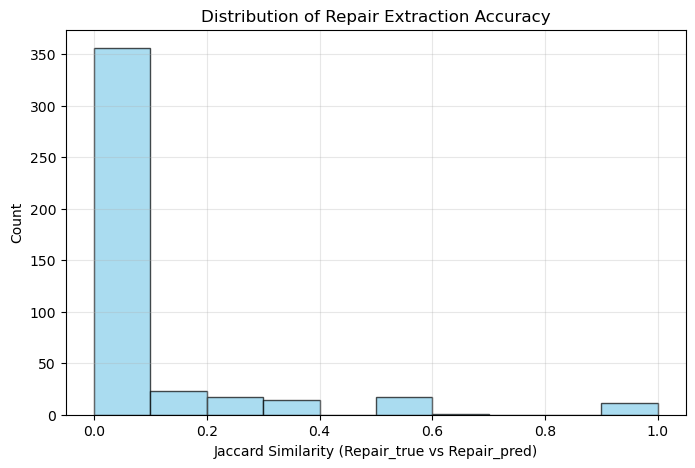

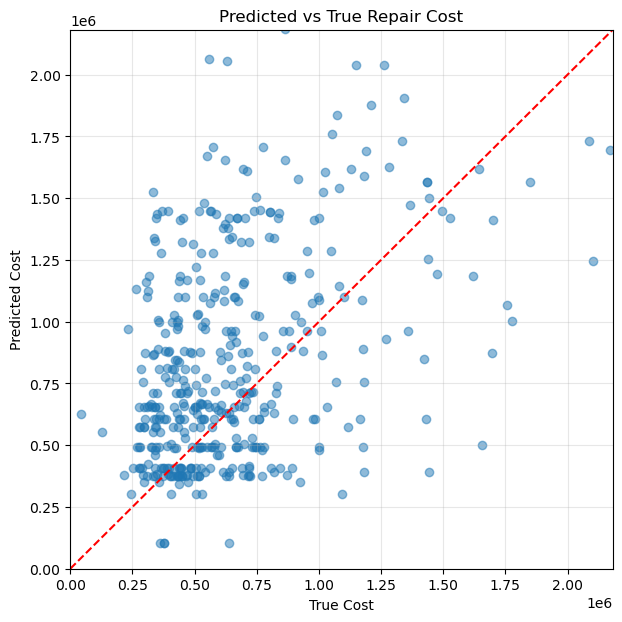

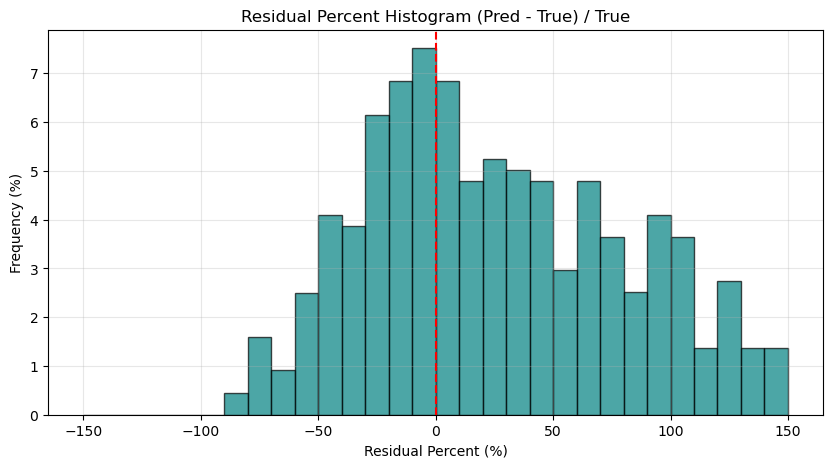

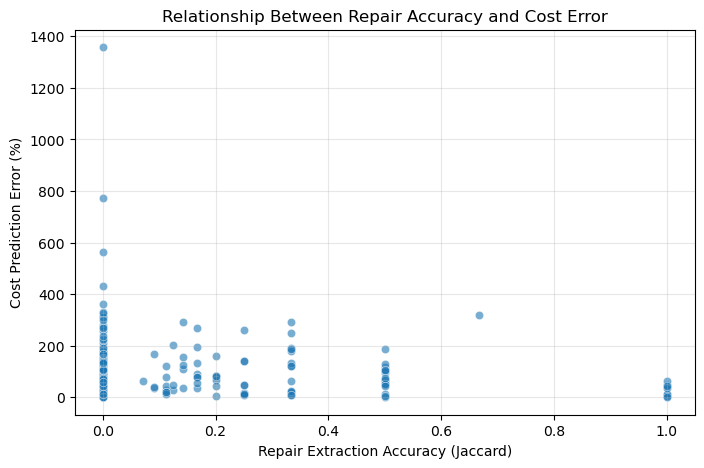


===== 요약 통계 =====
          jaccard  error_percent
count  439.000000     439.000000
mean     0.073526      71.190111
std      0.192728     100.563971
min      0.000000       0.038986
25%      0.000000      18.991503
50%      0.000000      43.230722
75%      0.000000      90.613824
max      1.000000    1357.796886


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# -------------------------------
# ⚙️ 1) 데이터 준비
# -------------------------------
df = result.copy()

df = df[df["pred_cost"].notna()]  # NaN 제거 (unknown 제외된 것)

# 수리비 오차 계산
df["abs_error"] = np.abs(df["pred_cost"] - df["total_cost"])
df["error_percent"] = df["abs_error"] / df["total_cost"] * 100
df["signed_percent"] = (df["pred_cost"] - df["total_cost"]) / df["total_cost"] * 100


# -------------------------------
# 🧩 2) Repair 추출 정확도 측정
# (정확도 = 교집합 / 합집합 Jaccard)
# -------------------------------
def parse_repair(r):
    """ repair 문자열 → set 구조로 변환 """
    if pd.isna(r) or r.strip() == "":
        return set()

    items = r.split("|")
    out = set()
    for it in items:
        it = it.strip()
        if it != "":
            out.add(it)
    return out

true_sets = df["repair_true"].apply(parse_repair)
pred_sets = df["repair_pred"].apply(parse_repair)

df["jaccard"] = [
    len(t & p) / len(t | p) if len(t | p) > 0 else 1
    for t, p in zip(true_sets, pred_sets)
]


# -------------------------------
# 📊 3) Jaccard 분포 히스토그램
# -------------------------------
plt.figure(figsize=(8, 5))
plt.hist(df["jaccard"], bins=10, range=(0,1), alpha=0.7, color="skyblue", edgecolor="black")
plt.xlabel("Jaccard Similarity (Repair_true vs Repair_pred)")
plt.ylabel("Count")
plt.title("Distribution of Repair Extraction Accuracy")
plt.grid(alpha=0.3)
plt.show()


# -------------------------------
# 📊 4) 수리비 예측 — True vs Pred 산점도
# -------------------------------
plt.figure(figsize=(7, 7))
plt.scatter(df["total_cost"], df["pred_cost"], alpha=0.5)
lim = df["total_cost"].quantile(0.98)
plt.plot([0, lim], [0, lim], "r--")  # equal line
plt.xlim(0, lim)
plt.ylim(0, lim)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs True Repair Cost")
plt.grid(alpha=0.3)
plt.show()


# -------------------------------
# 📊 5) Residual Percent Histogram
# -------------------------------
plt.figure(figsize=(10, 5))
bins = np.arange(-150, 160, 10)

plt.hist(df["signed_percent"], bins=bins, alpha=0.7,
         weights=np.ones(len(df)),
         color='teal', edgecolor='black')

plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual Percent (%)")
plt.ylabel("Frequency")
plt.title("Residual Percent Histogram (Pred - True) / True")
plt.grid(alpha=0.3)
plt.show()


# -------------------------------
# 📊 6) Repair 정확도 vs Cost 오차 관계
# -------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["jaccard"], y=df["error_percent"], alpha=0.6)
plt.xlabel("Repair Extraction Accuracy (Jaccard)")
plt.ylabel("Cost Prediction Error (%)")
plt.title("Relationship Between Repair Accuracy and Cost Error")
plt.grid(alpha=0.3)
plt.show()


# -------------------------------
# 📊 7) 요약 통계
# -------------------------------
print("\n===== 요약 통계 =====")
print(df[["jaccard", "error_percent"]].describe())
